# Importer la donnée dans Google Colab

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print("File uploaded".format(
      name=fn, length=len(uploaded[fn])))

Saving Churn_Modelling.csv to Churn_Modelling.csv
File uploaded


# Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import plot_tree, export_text
from sklearn.inspection import permutation_importance
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Base de données CSV en dataframe pandas

In [ ]:
# base de données csv en dataframa (df) pandas
# sauvegarde du fichier
for fn in uploaded.keys():
    # sur disque google colab
    with open(fn, 'wb') as f:
        f.write(uploaded[fn])

    # pandas dataframe
    df = pd.read_csv(fn)
    print("\n Aperçu")
    print(df.head())
    print("\n Information")
    df.info()


 Aperçu
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4   

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# Structure de la base de données

## Général

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


La base de données à disposition présente un total de 10 000 observations pour 14 variables.

## Pertinence des variables

In [ ]:
print(df["RowNumber"].unique())

[    1     2     3 ...  9998  9999 10000]


La variable "RowNumber" au sein de la base de données ne présente pas d'intérêt réel dans notre cas. En effet, elle ne fait qu'attribuer un rang pour chaque client. Par conséquent, elle sera supprimée de cette base.

In [ ]:
del df["RowNumber"]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


Les variables "CustomerId" et "Surname" renvoient aux informations personnelles de chaque client au sein de notre base de données. Par souci d'équité et d'éthique professionnelle, une anonymisation de la base de données est effectuée dans l'étape suivante. Par conséquent, ces deux variables seront supprimées de la base de données.

In [ ]:
del df["CustomerId"]
del df["Surname"]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB
None


Au total, trois variables ont été supprimées de la base de données : "Surname", "CustomerId" et "RowNumber". Le reste des variables sera gardé dans la base de données.

## Valeurs manquantes

In [ ]:
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [ ]:
print(df.isna().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Aucune variable ne présente de valeurs manquantes dans notre situation.

## Doublons

In [ ]:
df.duplicated().sum()

np.int64(0)

La base de données à disposition ne présente pas de doublons.

## Valeurs aberrantes (outliers)

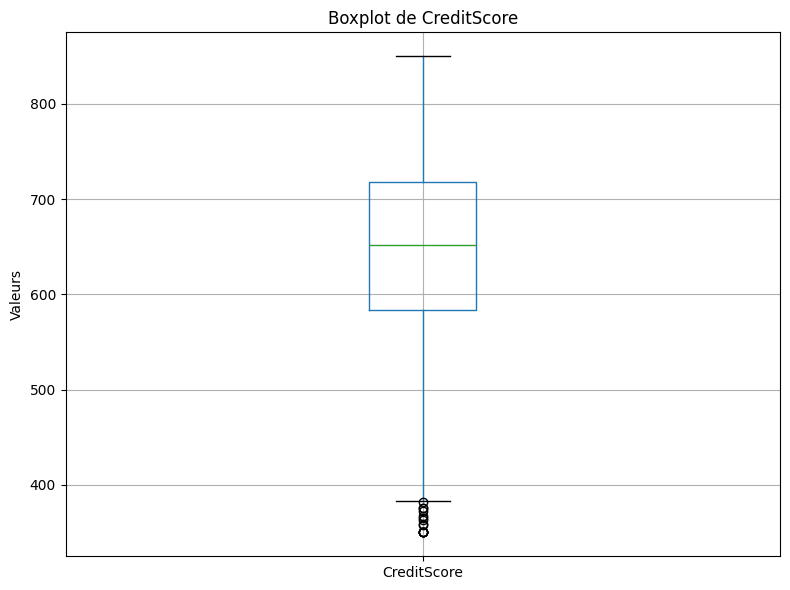

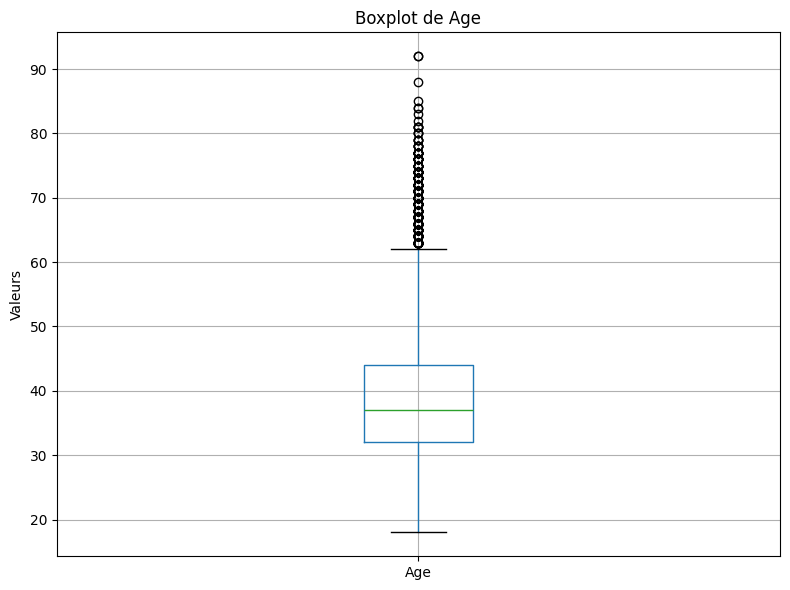

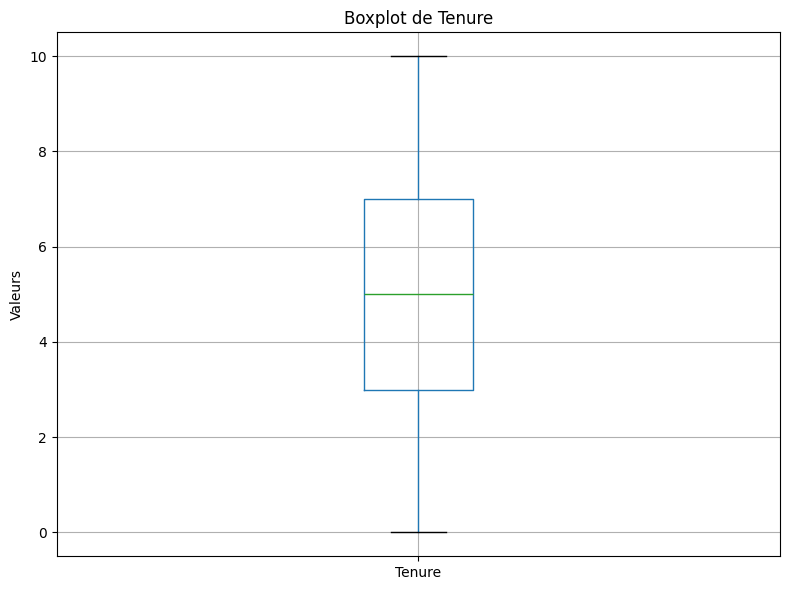

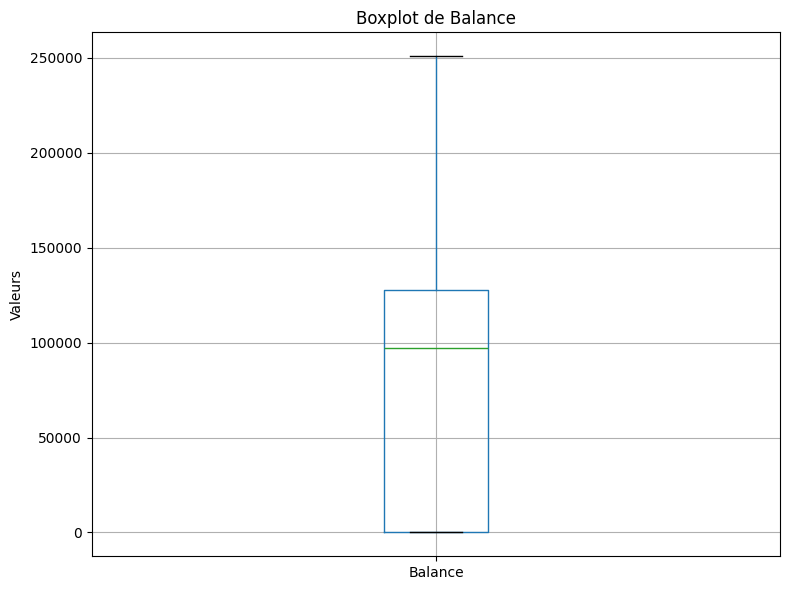

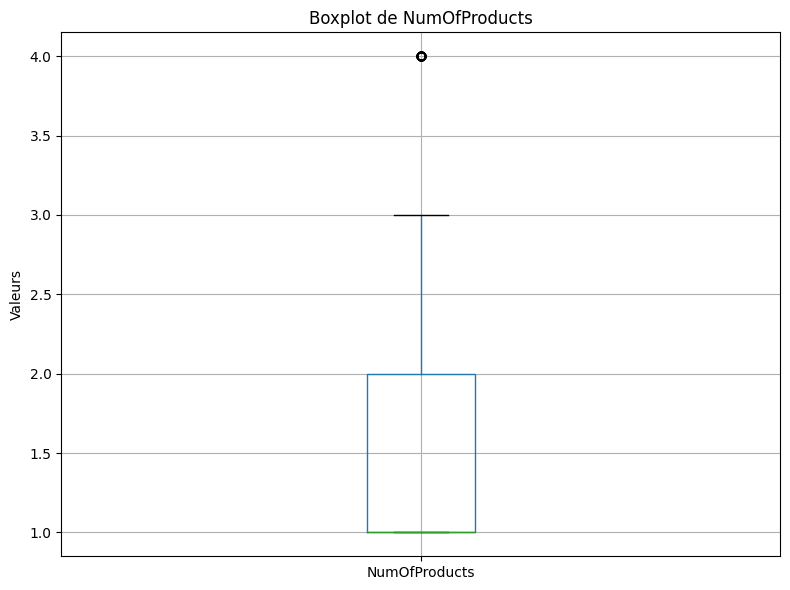

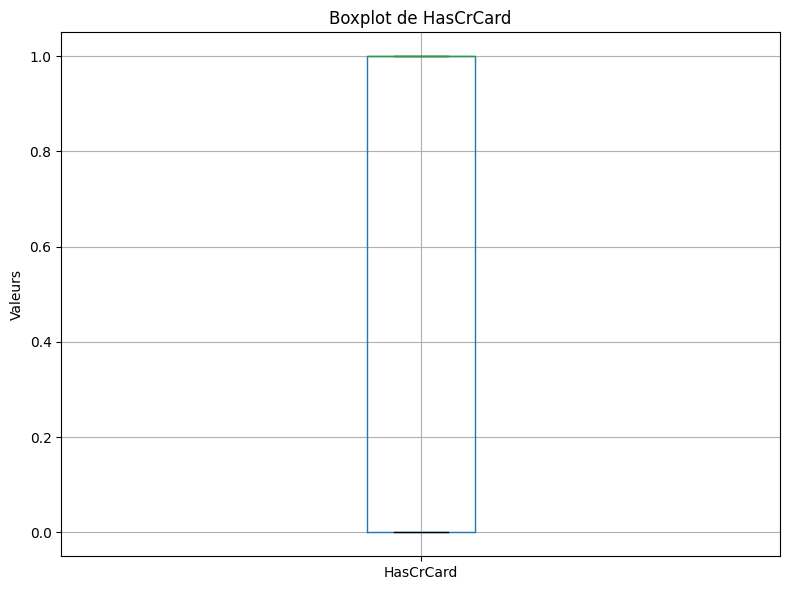

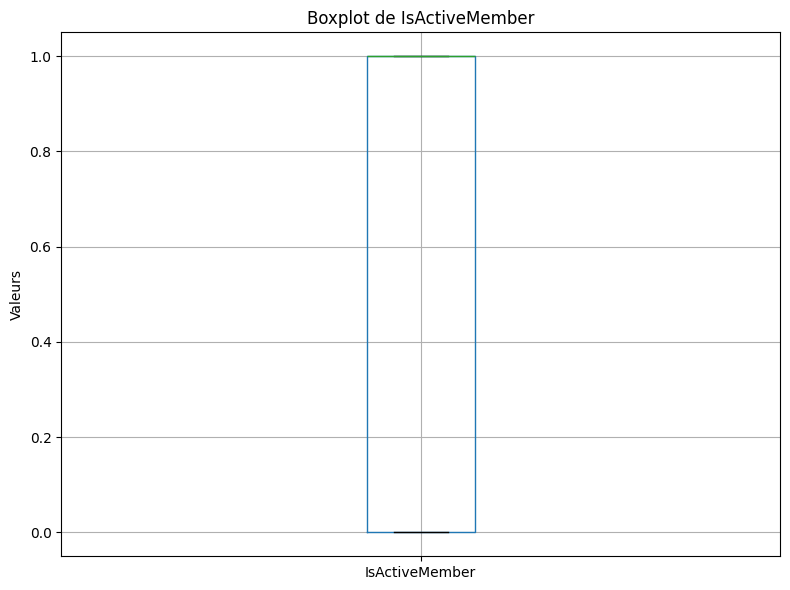

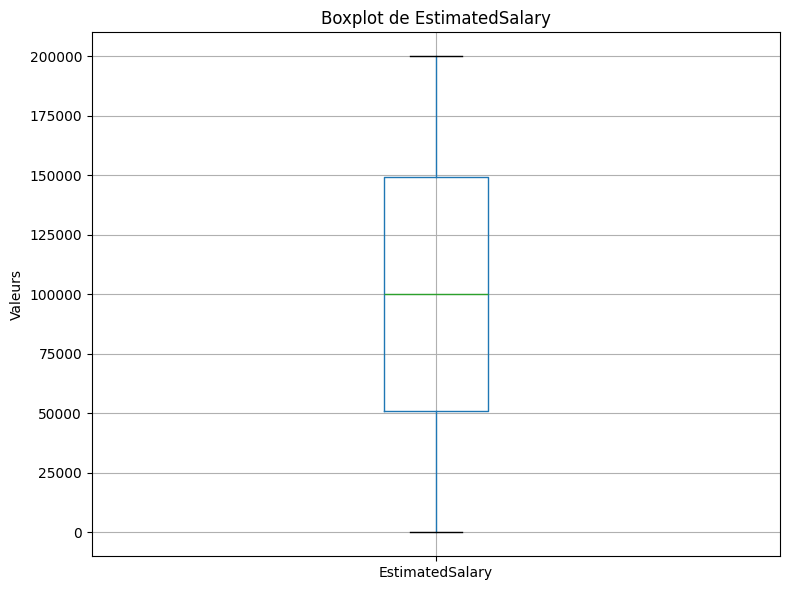

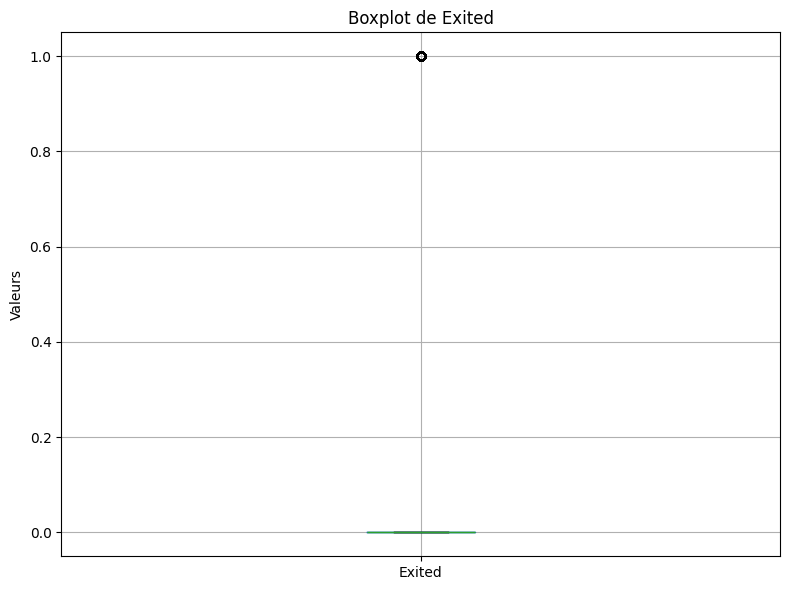

In [ ]:
# extraction des variables numériques uniquement
numerical = df.select_dtypes(include = [np.number]).columns.tolist()

# box plot pour chaque variable
for col in numerical:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel('Valeurs')
    plt.tight_layout()
    plt.show()

D'après les différents box plots générés ci-dessus, certaines variables, comme "Age" par exemple, présentent des valeurs aberrantes. Ces dernières sont représentées par un point au niveau de l'extrêmité haute (ou basse) du graphique. À présent, nous nous penchons sur une étude plus fine de ces valeurs aberrantes.

### Étude par variable

In [ ]:
# étude par variable : NumOfProducts
print(df["NumOfProducts"].describe())

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64


In [ ]:
print(df[df["NumOfProducts"] > 2].count())

CreditScore        326
Geography          326
Gender             326
Age                326
Tenure             326
Balance            326
NumOfProducts      326
HasCrCard          326
IsActiveMember     326
EstimatedSalary    326
Exited             326
dtype: int64


In [ ]:
# étude par variable : Age
print(df["Age"].describe())

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


In [ ]:
print(df[df["Age"] > 44].count())

CreditScore        2340
Geography          2340
Gender             2340
Age                2340
Tenure             2340
Balance            2340
NumOfProducts      2340
HasCrCard          2340
IsActiveMember     2340
EstimatedSalary    2340
Exited             2340
dtype: int64


In [ ]:
# étude par variable : CreditScore
print(df["CreditScore"].describe())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


In [ ]:
print(df[df["CreditScore"] > 718].count())

CreditScore        2463
Geography          2463
Gender             2463
Age                2463
Tenure             2463
Balance            2463
NumOfProducts      2463
HasCrCard          2463
IsActiveMember     2463
EstimatedSalary    2463
Exited             2463
dtype: int64


En somme, les valeurs aberrantes présentes dans notre base de données demeurent tout de même représentatives de la réalité. Par ailleurs, les effectifs associés à ces valeurs aberrantes étant trop élevées, nous garderons les valeurs au sein de la base de données.

# Analyse exploratoire

In [ ]:
# dataframe avec variables numériques seulement
numerique = df.select_dtypes(include = "number")
print(numerique)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1                  1        112542.58       0  
2  

In [ ]:
# statistiques descriptives de chaque variable numérique
for col in numerique.columns:
  print(numerique[col].describe())

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64
count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64
count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64
count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.

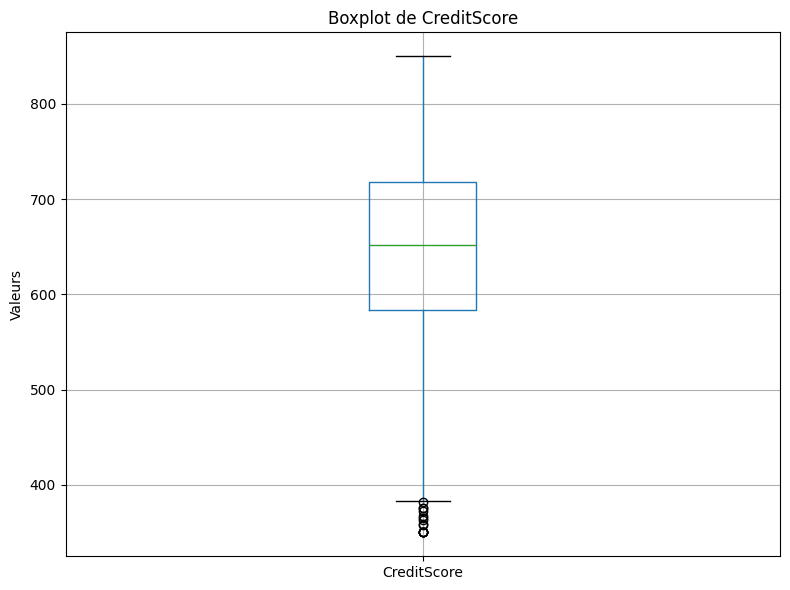

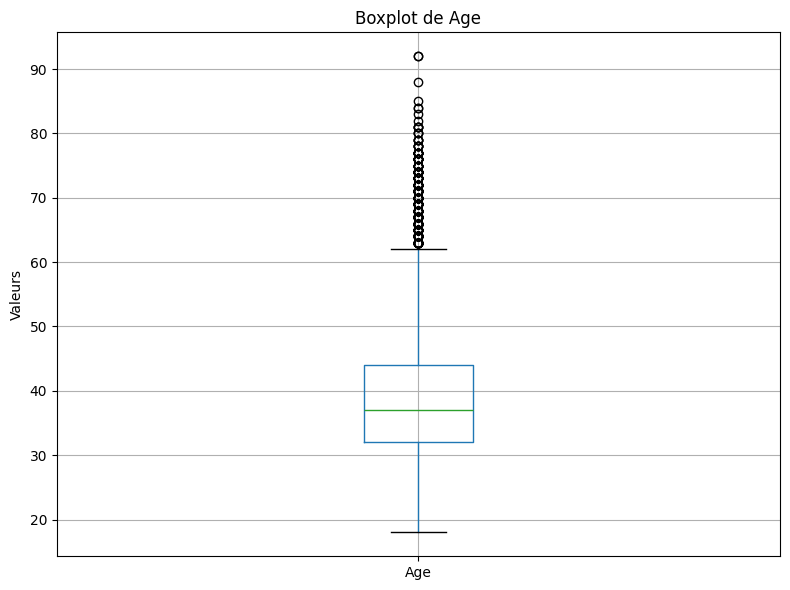

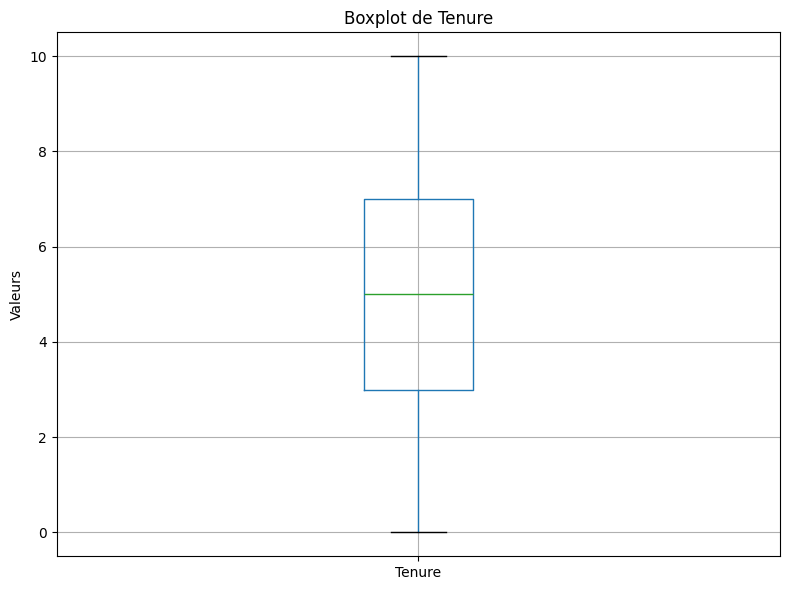

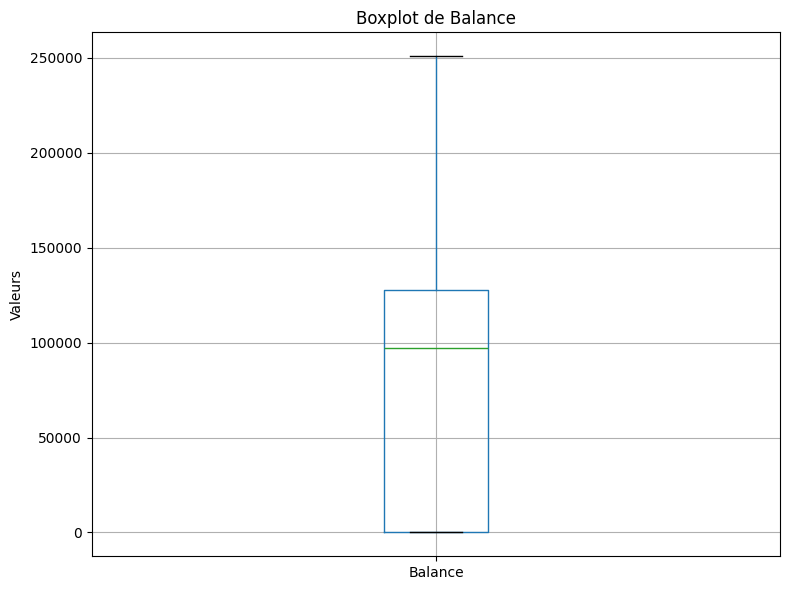

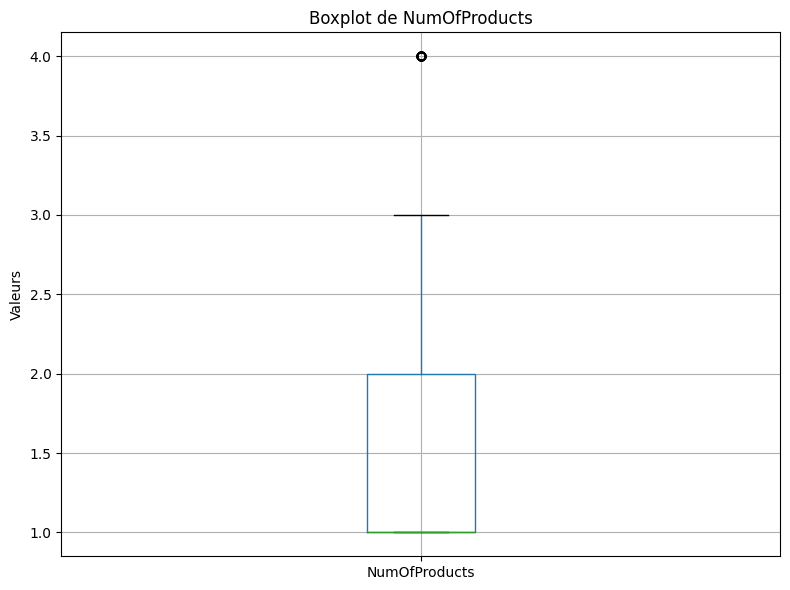

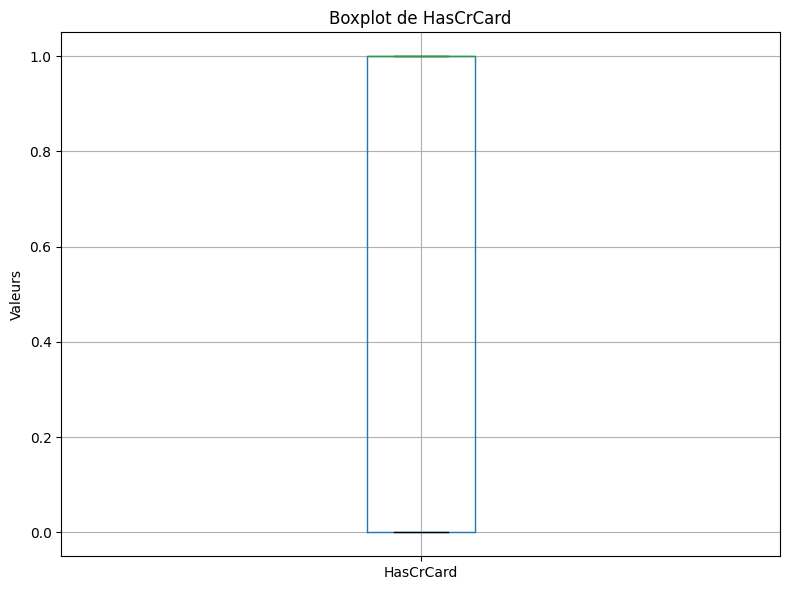

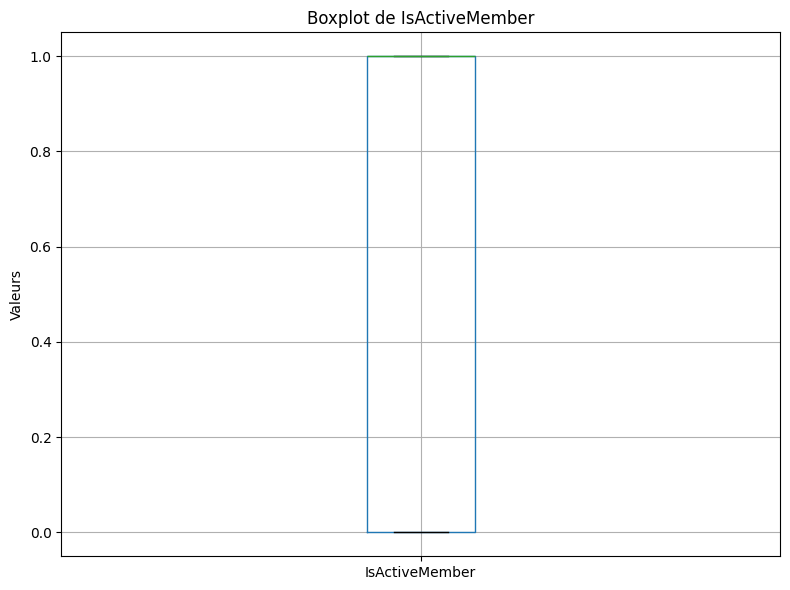

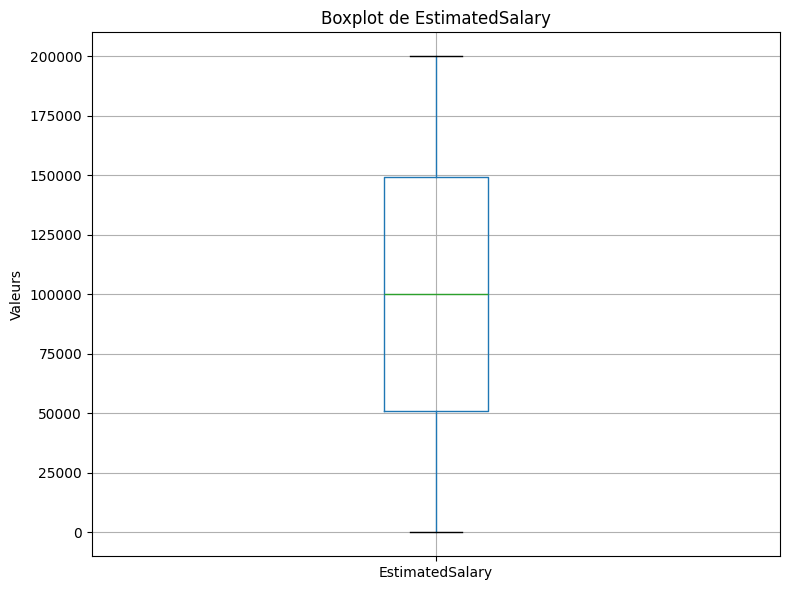

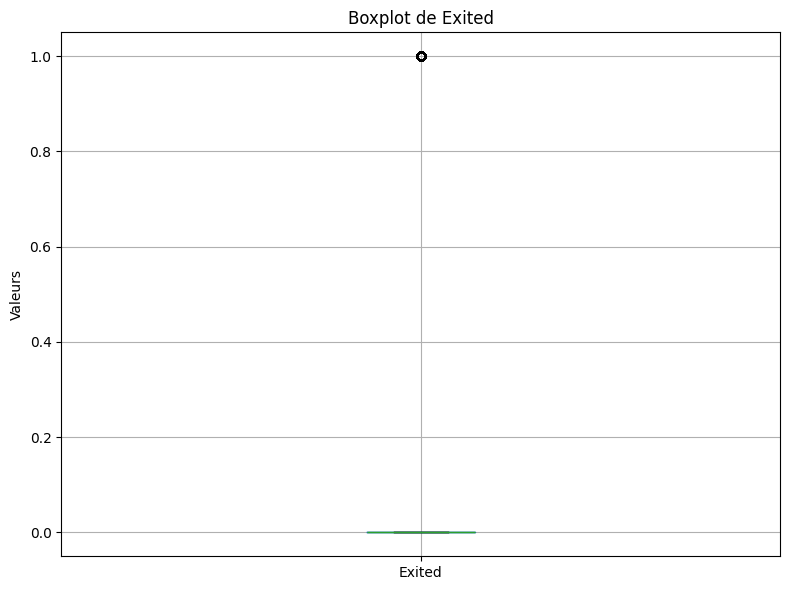

In [ ]:
# box plot (variables numériques)
numerical = df.select_dtypes(include = [np.number]).columns.tolist()

# box plot pour chaque variable
for col in numerical:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=col)
    plt.title(f'Boxplot de {col}')
    plt.ylabel('Valeurs')
    plt.tight_layout()
    plt.show()

Dans les clients de notre base de données, l'âge médian est de 35 ans, avec un maximum atteint pour 92 ans et minimum atteint à 18 ans. Concernant la solvabilité (```CreditScore```) des clients, leur score moyen est de 650, avec un maximum de 850 et un minimum de 300 environ. Le solde des clients (```Balance```) se situe entre 0 et 250 000, avec une médiane de 100 000 environ.

In [ ]:
# proportions (variables binaires)
binaires = ["Exited", "IsActiveMember", "HasCrCard"]

for element in binaires:
  print(f"Variable : {element}")
  print(f"{df[element].mean()}")

Variable : Exited
0.2037
Variable : IsActiveMember
0.5151
Variable : HasCrCard
0.7055


Dans notre base de données, une grande partie des clients est toujours présente dans l'entreprise, puisque 20.37% sont sortis de l'entreprise. Parmi les clients de notre base de données, 51.51% sont toujours des membres actifs au sein de l'entreprise et 70.55% possèdent une carte de crédit.

[]

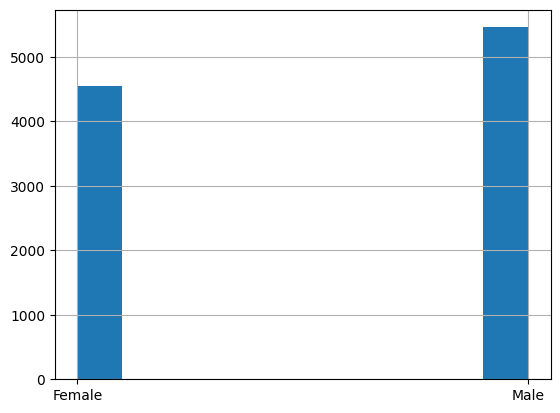

In [ ]:
df['Gender'].hist()
plt.plot()

La base de données présente un plus grand nombre d'hommes que de femmes. En effet, nous comptons plus de 5000 hommes contre 4500 femmes.

[]

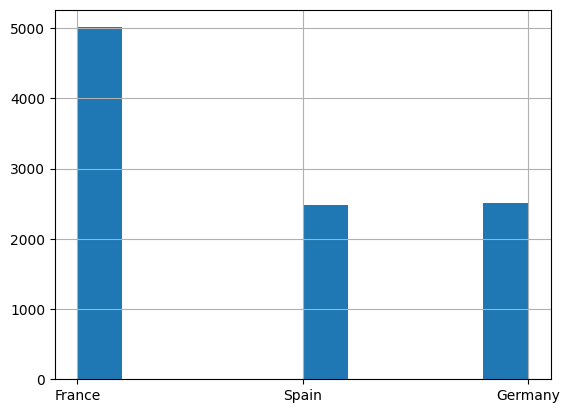

In [ ]:
df['Geography'].hist()
plt.plot()

Notre base de données compte une majorité de clients venant de France et, de façon équivalente des clients d'Allemagne et d'Espagne.

<Axes: >

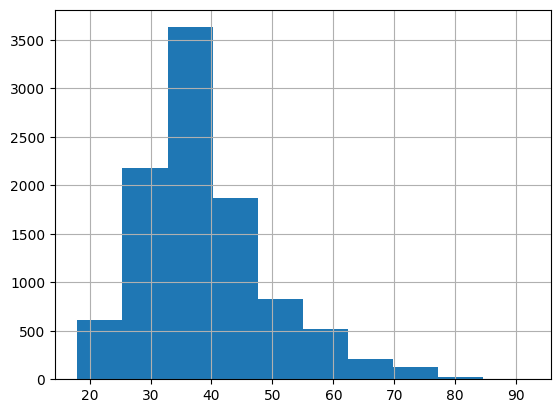

In [ ]:
df["Age"].hist()

Les clients à disposition dans notre jeu de données ont un âge principalement situé entre 25 et 45 ans, avec la clientèle la plus jeune atteignant 18 ans, tandis que la clientèle la plus âgée atteignant 92 ans.

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64


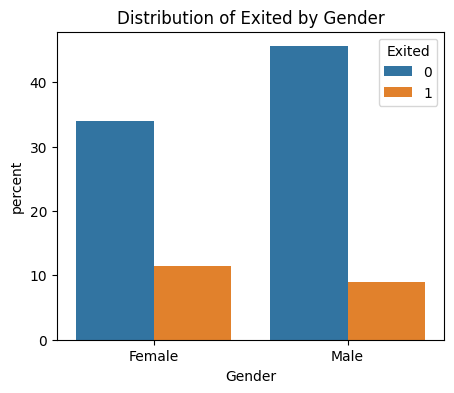

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


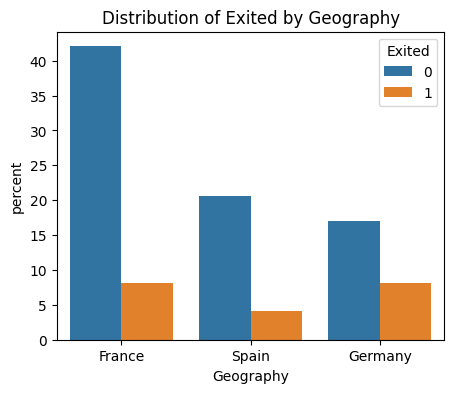

HasCrCard
0    0.208149
1    0.201843
Name: Exited, dtype: float64


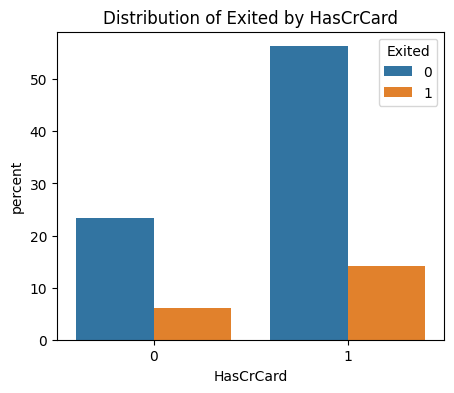

In [ ]:
list_descript = ["Gender","Geography","HasCrCard"]
target = "Exited"

for col in list_descript:
    plt.figure(figsize=(5,4))
    sns.countplot(data=df, x=col, hue=target, stat="percent",legend ="full")
    print(df.groupby(col)[target].mean())
    plt.title(f"Distribution of {target} by {col}")
    plt.legend(title=target)
    plt.show()

Pour la variable "Gender", une première observation réside dans le fait que les femmes sont plus enclin à sortir de l'entreprise par rapport aux hommes. De la même manière, une plus grande proportion d'hommes restent dans l'entreprise, par rapport aux femmes. Ensuite, nous remarquons que les clients ressortissants de l'Allemagne sont également les plus enclins à sortir de l'entreprise par rapport à la France et l'Espagne. Ce dernier demeure le le pays avec le taux de sortie le plus faible parmi les trois. Finalement, la rétention client est la plus forte pour la France.

En général, les pourcentages présentés témoignent de la majorité de clients venant de France et de sexe masculin.

In [ ]:
# quantiles de CreditScore
df["CreditScore_quantile"] = pd.qcut(df["CreditScore"].to_numpy(),q=30)
df["CreditScore_quantile"]

0       (617.0, 627.0]
1       (598.7, 608.0]
2       (472.3, 502.0]
3       (695.0, 704.0]
4       (834.0, 850.0]
             ...      
9995    (761.8, 778.0]
9996    (502.0, 521.0]
9997    (704.0, 712.0]
9998    (761.8, 778.0]
9999    (778.0, 798.4]
Name: CreditScore_quantile, Length: 10000, dtype: category
Categories (30, interval[float64, right]): [(349.999, 472.3] < (472.3, 502.0] < (502.0, 521.0] <
                                            (521.0, 538.0] ... (761.8, 778.0] < (778.0, 798.4] <
                                            (798.4, 834.0] < (834.0, 850.0]]

In [ ]:
# quantiles de EstimatedSalary
df["EstimatedSalary_quantile"] = pd.qcut(df["EstimatedSalary"].to_numpy(),q=30)
df["EstimatedSalary_quantile"]

0        (100193.915, 106088.95]
1        (106088.95, 113167.614]
2       (113167.614, 119710.038]
3        (93249.692, 100193.915]
4           (74043.83, 80238.34]
                  ...           
9995     (93249.692, 100193.915]
9996     (100193.915, 106088.95]
9997      (41050.736, 47795.802]
9998       (86655.97, 93249.692]
9999      (34025.025, 41050.736]
Name: EstimatedSalary_quantile, Length: 10000, dtype: category
Categories (30, interval[float64, right]): [(11.579, 6432.316] < (6432.316, 13220.19] <
                                            (13220.19, 20273.58] < (20273.58, 27179.652] < ... <
                                            (173509.066, 179674.704] < (179674.704, 186524.68] <
                                            (186524.68, 193438.45] < (193438.45, 199992.48]]

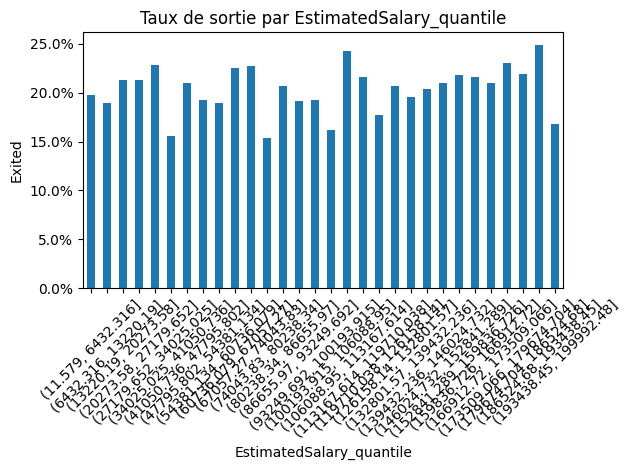

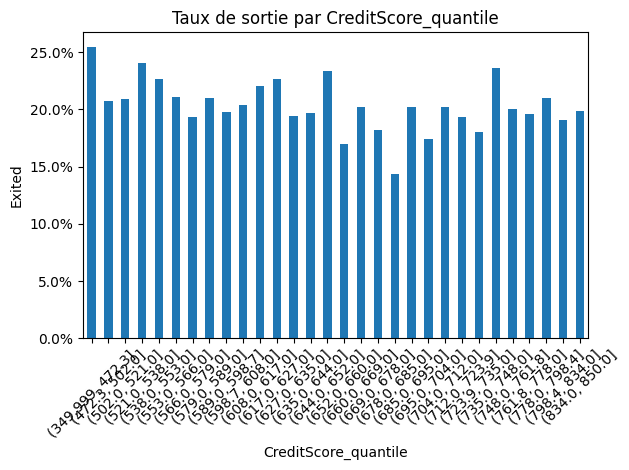

In [ ]:
quantiles = ["EstimatedSalary_quantile", "CreditScore_quantile"]

for i in quantiles:
  ax = df.groupby(i)["Exited"].mean().plot(kind = "bar")
  plt.xticks(rotation = 45)
  ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
  plt.xlabel(f"{i}")
  plt.ylabel("Exited")
  plt.title(f"Taux de sortie par {i}")
  plt.tight_layout()
  plt.show()

À première vue, sur le graphique de taux de sortie par score de crédit, il n'existe pas de lien général entre "CreditScore" et "Exited". Similairement, aucune tendance n'est relevée entre "Exited" et "EstimatedSalary".

In [ ]:
# histogramme empilé
def plot_stacked_hist(df, x_col, stack_col, percent=False, title=None):
    # vérifications
    if x_col not in df.columns or stack_col not in df.columns:
        raise ValueError("Les colonnes spécifiées n'existent pas")

    # tableau croisé des valeurs
    table = pd.crosstab(df[x_col], df[stack_col])

    # conversion en pourcentage le cas échéant
    if percent:
        table = table.div(table.sum(axis=1), axis=0) * 100
        ylabel = "Pourcentage (%)"
    else:
        ylabel = "Nombre"

    # graphique
    ax = table.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(title or f"{stack_col} par {x_col}")
    plt.xlabel(x_col)
    plt.ylabel(ylabel)
    plt.legend(title=stack_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

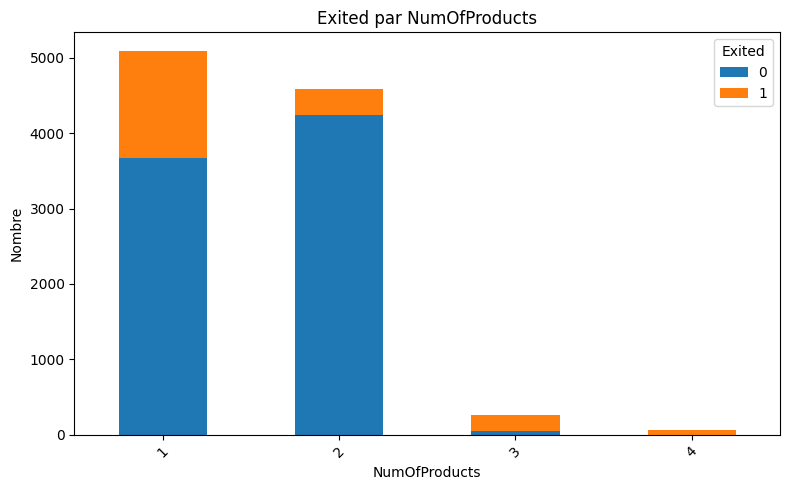

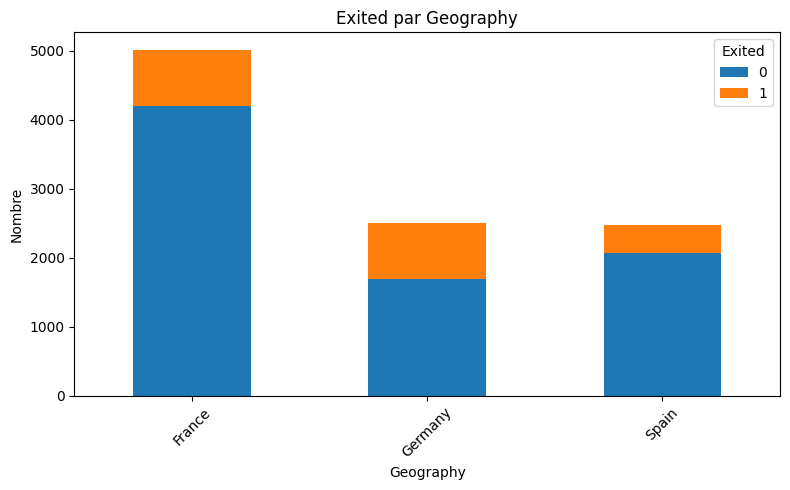

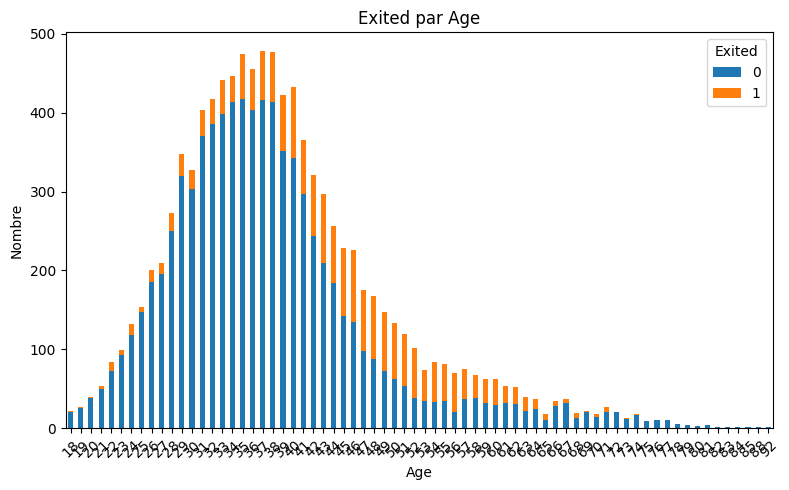

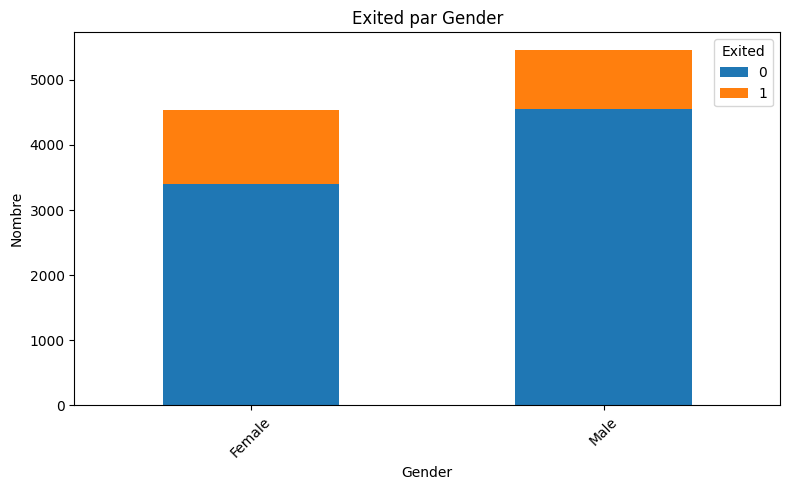

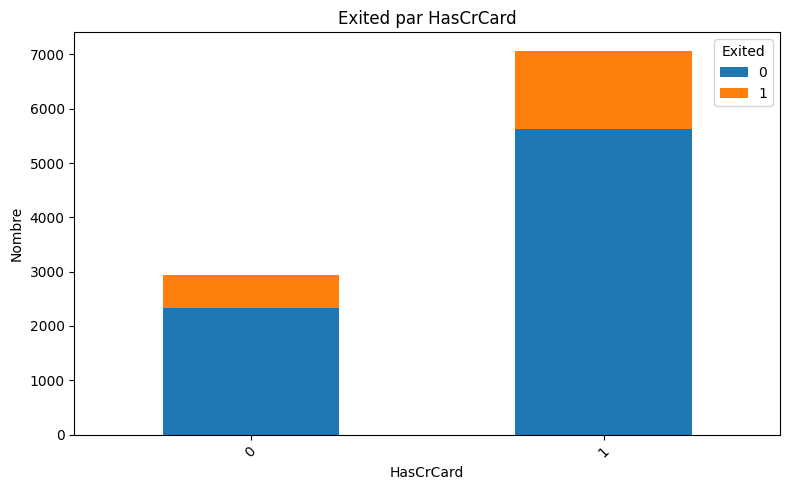

In [ ]:
plot_stacked_hist(df,'NumOfProducts','Exited',percent=False)
plot_stacked_hist(df,'Geography','Exited',percent=False)
plot_stacked_hist(df,'Age','Exited',percent=False)
plot_stacked_hist(df,'Gender','Exited',percent=False)
plot_stacked_hist(df,"HasCrCard",'Exited',percent=False)

Concernant "NumOfProducts", une majorité de clients possède un ou deux produits. En effet, les clients avec un ou deux produits dans l'entreprise sont majoritaires dans la base de données. Parmi eux, ceux avec un seul produit ont un taux de sortie plus élevé que les autres.

Par ailleurs, une grande proportion de clients dans une certaine classe d'âge engendre un taux de sortie plus élevé, ce qui est naturel. Cependant, nous observons un caractère constant du taux de sortie, malgré la baisse des clients dans les classes d'âge. Cela se souligne particulièrement à partir de 40 ans jusqu'à 63 ans.

En dernier lieu, une grande partie des clients de la base de données possède une carte de crédit dans l'entreprise. Naturellement, ce sont ces personnes qui présentent une grande proportion de sortie, par rapport à ceux dépourvues de carte de crédit.

In [ ]:
def plot_pie(df, col, title=None, autopct='%1.1f%%', startangle=90):
    if col not in df.columns:
        raise ValueError(f"La colonne '{col}' n'existe pas dans le DataFrame.")

    counts = df[col].value_counts()

    plt.figure(figsize=(6, 6))
    plt.pie(
        counts,
        labels=counts.index,
        autopct=autopct,
        startangle=startangle,
        wedgeprops={'edgecolor': 'white'}
    )
    plt.title(title or f"Répartition de {col}")
    plt.tight_layout()
    plt.show()

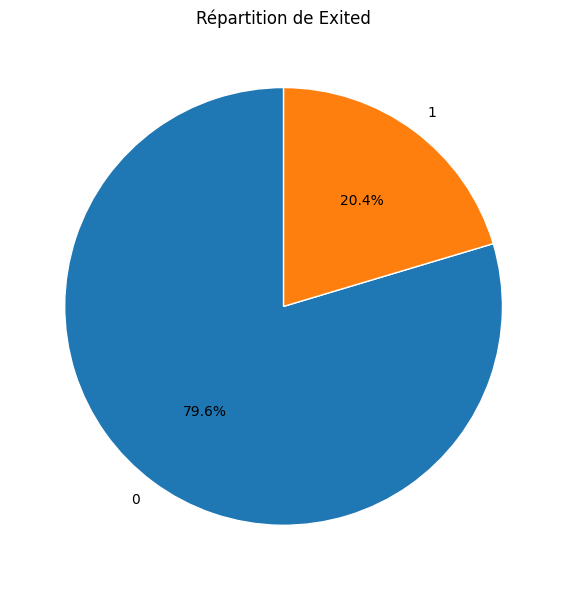

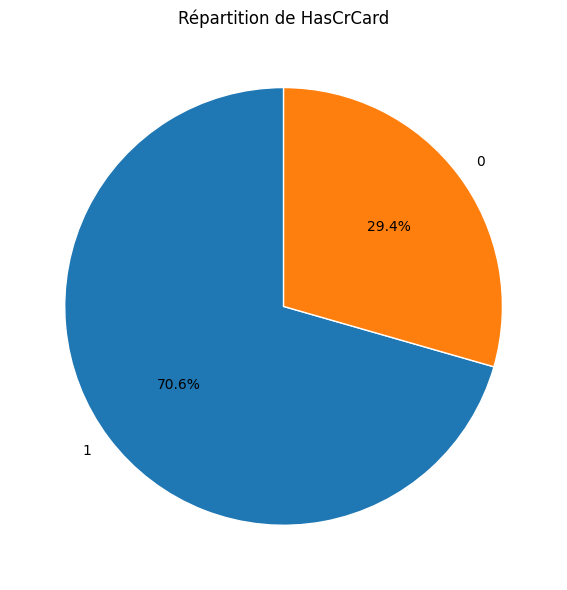

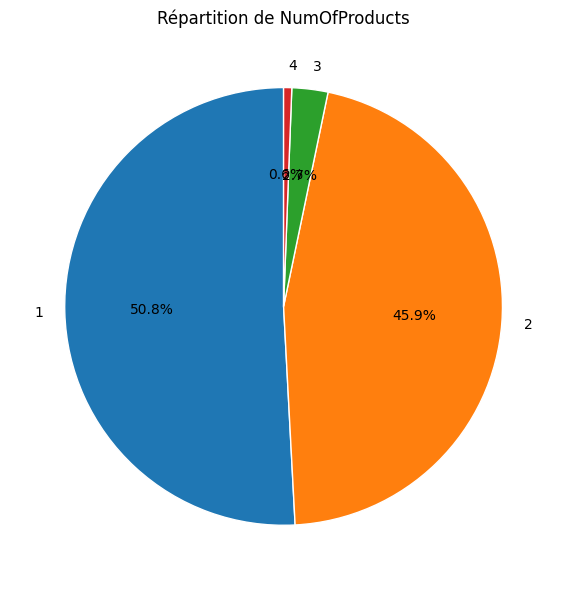

In [ ]:
plot_pie(df,"Exited")
plot_pie(df,"HasCrCard")
plot_pie(df,"NumOfProducts")

Ces diagrammes circulatires (pie charts) permettent de mieux visualisier les observations soulevées dans les histogrammes effectués précédemment.

<Axes: >

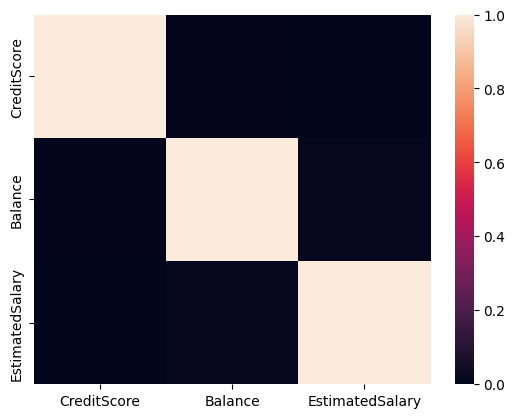

In [ ]:
# matrice de corrélation des variables continues
continuous_variables = ["CreditScore","Balance", "EstimatedSalary"]

sns.heatmap(df[continuous_variables].corr())

À partir de la matrice de corrélation, notamment du heatmap ci-dessus, nous pouvons dire que les variables continues dans notre base de données ne sont pas corrélées entre elles.

In [ ]:
# calcul Weight of Evidence (WoE) et information value (IV)
def calculate_woe_iv(df, feature, target, min_perc=0.05):
    """ Calcul WoE et IV """

    # vérifications
    if feature not in df.columns:
        raise ValueError(f"La variable {feature} n'existe pas dans le DataFrame")
    if target not in df.columns:
        raise ValueError(f"La variable cible {target} n'existe pas dans le DataFrame")

    # copie données
    temp_df = df[[feature, target]].copy()

    # création de bins pour les variables continues
    if temp_df[feature].dtype in ['float64', 'int64']:
        n_bins = min(10, len(temp_df[feature].unique())) # usage des quantiles
        temp_df['bin'] = pd.qcut(temp_df[feature], q=n_bins, duplicates='drop')
    else:
        temp_df['bin'] = temp_df[feature]

    grouped = temp_df.groupby('bin', observed=True).agg({
        target: ['count', 'sum']
    })
    grouped.columns = ['total', 'events']
    grouped = grouped.reset_index()

    # calcul
    grouped['non_events'] = grouped['total'] - grouped['events']

    total_events = grouped['events'].sum()
    total_non_events = grouped['non_events'].sum()

    # pourcentages
    grouped['pct_events'] = grouped['events'] / total_events
    grouped['pct_non_events'] = grouped['non_events'] / total_non_events

    # éviter division par zéro le cas échéant
    grouped['pct_events'] = grouped['pct_events'].replace(0, 0.0001)
    grouped['pct_non_events'] = grouped['pct_non_events'].replace(0, 0.0001)

    # calcul du WoE
    grouped['woe'] = np.log(grouped['pct_events'] / grouped['pct_non_events'])

    # calcul de l'IV pour chaque bin
    grouped['iv_component'] = (grouped['pct_events'] - grouped['pct_non_events']) * grouped['woe']

    # IV total
    iv_total = grouped['iv_component'].sum()

    # taux d'événement
    grouped['event_rate'] = grouped['events'] / grouped['total']

    # ordre des bins pour l'affichage de résultats
    if temp_df[feature].dtype in ['float64', 'int64']:
        grouped = grouped.sort_values('bin')

    # dataframe des résultats
    woe_iv_df = grouped[[
        'bin', 'total', 'events', 'non_events',
        'event_rate', 'woe', 'iv_component'
    ]].copy()

    return woe_iv_df, iv_total

def analyze_all_variables_woe_iv(df, target_variable, exclude_vars=None, min_perc=0.05):
    """ Analyse du WoE et de l'IV pour toutes les variables """

    if exclude_vars is None:
        exclude_vars = [target_variable]
    else:
        exclude_vars = exclude_vars + [target_variable]

    # variables à analyser
    variables = [col for col in df.columns if col not in exclude_vars]

    results = {}
    iv_summary = []

    print("=" * 80)
    print("📊 ANALYSE WOE ET IV")
    print("=" * 80)

    for var in variables:
        try:
            woe_df, iv = calculate_woe_iv(df, var, target_variable, min_perc)
            results[var] = woe_df

            # interprétation de l'IV
            if iv < 0.02:
                power = "Non prédictive"
            elif iv < 0.1:
                power = "Faible"
            elif iv < 0.3:
                power = "Moyenne"
            elif iv < 0.5:
                power = "Forte"
            else:
                power = "Suspecte"

            iv_summary.append({
                'Variable': var,
                'IV': iv,
                'Power': power,
                'Type': df[var].dtype
            })

            print(f"{var:25} | IV = {iv:7.4f} | {power:15} | {str(df[var].dtype):10}")

        except Exception as e:
            print(f"{var:25} | Erreur: {e}")
            iv_summary.append({
                'Variable': var,
                'IV': np.nan,
                'Power': 'Erreur',
                'Type': df[var].dtype
            })

    # dataframe récapitulatif
    iv_summary_df = pd.DataFrame(iv_summary).sort_values('IV', ascending=False)

    print(f"\n Récapitulatif IV - {len(variables)} variables analysées")
    print("=" * 80)

    return results, iv_summary_df

def plot_woe_analysis(results, variable, figsize=(12, 8)):
    """
    Graphique d'analyse WoE pour une variable
    """
    if variable not in results:
        print(f"Variable {variable} non trouvée dans les résultats")
        return

    woe_df = results[variable]

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)

    # graphique 1 : WoE par bin
    ax1.bar(range(len(woe_df)), woe_df['woe'], color='skyblue', edgecolor='navy')
    ax1.set_xticks(range(len(woe_df)))
    ax1.set_xticklabels([str(b) for b in woe_df['bin']], rotation=45)
    ax1.set_ylabel('Weight of Evidence (WoE)')
    ax1.set_title(f'WoE par bin - {variable}')
    ax1.grid(axis='y', alpha=0.3)

    # ajout des valeurs sur les barres
    for i, v in enumerate(woe_df['woe']):
        ax1.text(i, v + (0.1 if v >= 0 else -0.15), f'{v:.2f}',
                ha='center', va='bottom' if v >= 0 else 'top', fontweight='bold')

    # graphique 2 : Taux d'événements par bin
    ax2.bar(range(len(woe_df)), woe_df['event_rate'] * 100,
            color='lightcoral', edgecolor='darkred', alpha=0.7)
    ax2.set_xticks(range(len(woe_df)))
    ax2.set_xticklabels([str(b) for b in woe_df['bin']], rotation=45)
    ax2.set_ylabel('Taux d\'événements (%)')
    ax2.set_xlabel('Bins')
    ax2.grid(axis='y', alpha=0.3)

    # ajout des pourcentages
    for i, v in enumerate(woe_df['event_rate'] * 100):
        ax2.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # affichage tableau détaillée
    print(f"\n Détail WoE et IV - {variable}")
    print("=" * 60)
    display_df = woe_df.copy()
    display_df["event_rate"] = (display_df['event_rate'] * 100).round(1).astype(str) + '%'
    display_df["woe"] = display_df['woe'].round(3)
    display_df['iv_component'] = display_df['iv_component'].round(4)
    print(display_df.to_string(index=False))

def plot_iv_summary(iv_summary_df, figsize=(10, 6)):
    """ Graphique récapitulatif des IV """

    plt.figure(figsize=figsize)

    # filtrage des variables avec un IV valide
    valid_iv = iv_summary_df[iv_summary_df['IV'].notna()].sort_values('IV')

    # couleurs selon la puissance discriminative
    colors = {
        'Non prédictive': 'lightgray',
        'Faible': 'yellow',
        'Moyenne': 'orange',
        'Forte': 'red',
        'Suspecte': 'darkred'
    }

    bar_colors = [colors.get(power, 'gray') for power in valid_iv['Power']]

    bars = plt.barh(valid_iv['Variable'], valid_iv['IV'], color=bar_colors, edgecolor='black')

    plt.xlabel('Information Value (IV)')
    plt.title('Power Prédictive des Variables (Information Value)')
    plt.grid(axis='x', alpha=0.3)

    # ajout des valeurs d'IV
    for i, (iv, power) in enumerate(zip(valid_iv['IV'], valid_iv['Power'])):
        plt.text(iv + 0.01, i, f'{iv:.3f}', va='center', fontweight='bold')

    # légende pour les seuils d'IV
    plt.axvline(x=0.02, color='red', linestyle='--', alpha=0.5, label='IV=0.02 (Faible)')
    plt.axvline(x=0.1, color='orange', linestyle='--', alpha=0.5, label='IV=0.1 (Moyen)')
    plt.axvline(x=0.3, color='green', linestyle='--', alpha=0.5, label='IV=0.3 (Fort)')

    plt.legend()
    plt.tight_layout()
    plt.show()

📊 ANALYSE WOE ET IV
CreditScore               | IV =  0.0095 | Non prédictive  | int64     
Geography                 | IV =  0.1684 | Moyenne         | object    
Gender                    | IV =  0.0698 | Faible          | object    
Age                       | IV =  0.7831 | Suspecte        | int64     
Tenure                    | IV =  0.0087 | Non prédictive  | int64     
Balance                   | IV =  0.0976 | Faible          | float64   
NumOfProducts             | IV =  0.4361 | Forte           | int64     
HasCrCard                 | IV =  0.0000 | Non prédictive  | int64     
IsActiveMember            | IV =  0.0000 | Non prédictive  | int64     
EstimatedSalary           | IV =  0.0023 | Non prédictive  | float64   
CreditScore_quantile      | IV =  0.0184 | Non prédictive  | category  
EstimatedSalary_quantile  | IV =  0.0215 | Faible          | category  

 Récapitulatif IV - 12 variables analysées

 Classement des variables par leur capacité discriminante
             

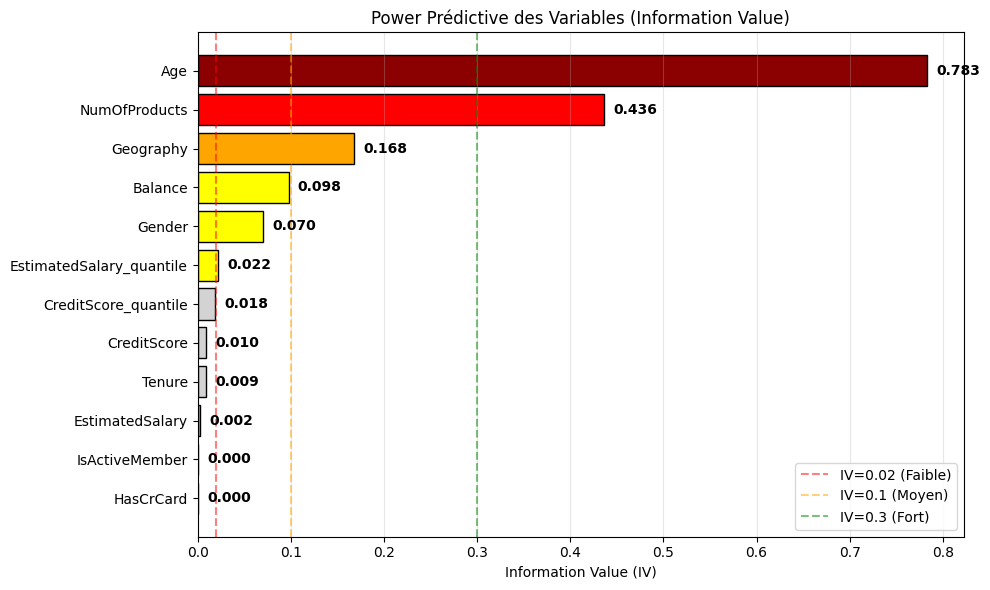

In [ ]:
# variable cible
target_variable = "Exited"

# analyse WoE et IV pour toutes les variables
results, iv_summary = analyze_all_variables_woe_iv(df, target_variable)

# classement des variables par IV
print("\n Classement des variables par leur capacité discriminante")
print("=" * 80)
print(iv_summary)

# graphique récapitulatif des IV
plot_iv_summary(iv_summary)

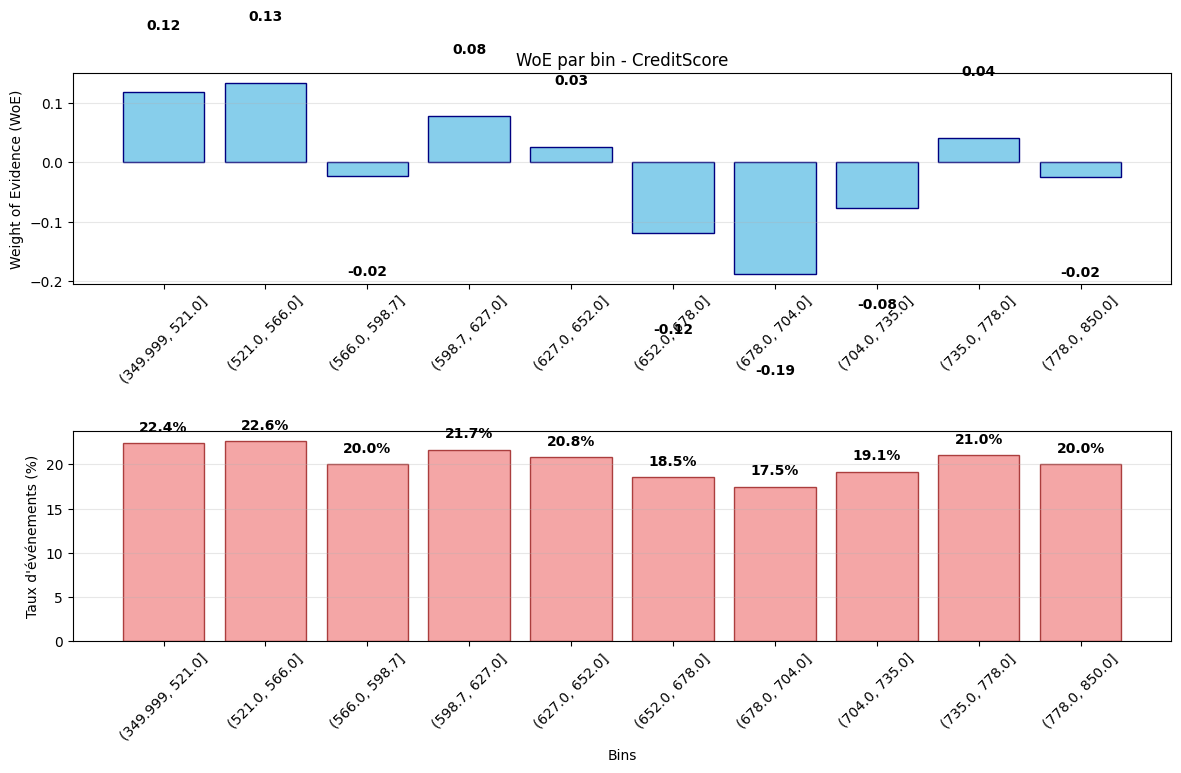


 Détail WoE et IV - CreditScore
             bin  total  events  non_events event_rate    woe  iv_component
(349.999, 521.0]   1002     224         778      22.4%  0.118        0.0015
  (521.0, 566.0]   1008     228         780      22.6%  0.133        0.0019
  (566.0, 598.7]    990     198         792      20.0% -0.023        0.0001
  (598.7, 627.0]   1030     223         807      21.7%  0.077        0.0006
  (627.0, 652.0]   1005     209         796      20.8%  0.026        0.0001
  (652.0, 678.0]   1005     186         819      18.5% -0.119        0.0014
  (678.0, 704.0]    978     171         807      17.5% -0.188        0.0033
  (704.0, 735.0]   1003     192         811      19.1% -0.077        0.0006
  (735.0, 778.0]    998     210         788      21.0%  0.041        0.0002
  (778.0, 850.0]    981     196         785      20.0% -0.024        0.0001


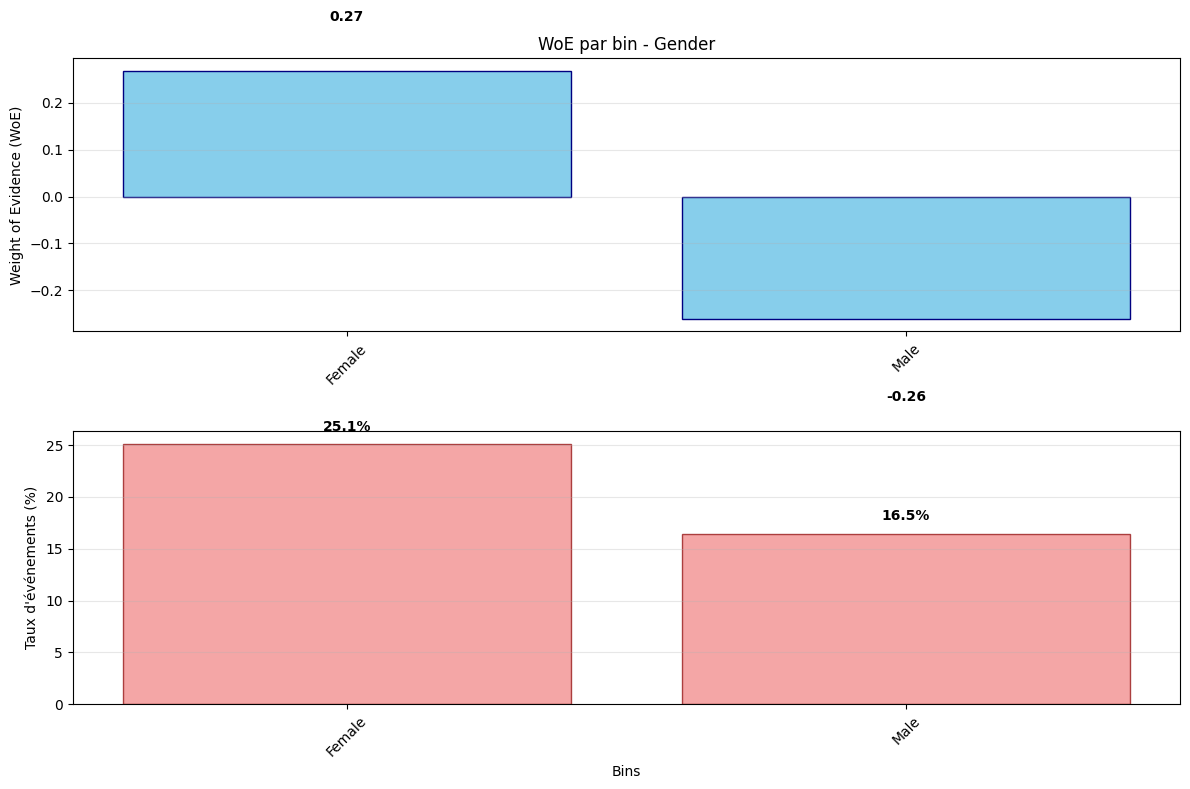


 Détail WoE et IV - Gender
   bin  total  events  non_events event_rate    woe  iv_component
Female   4543    1139        3404      25.1%  0.269        0.0354
  Male   5457     898        4559      16.5% -0.261        0.0344


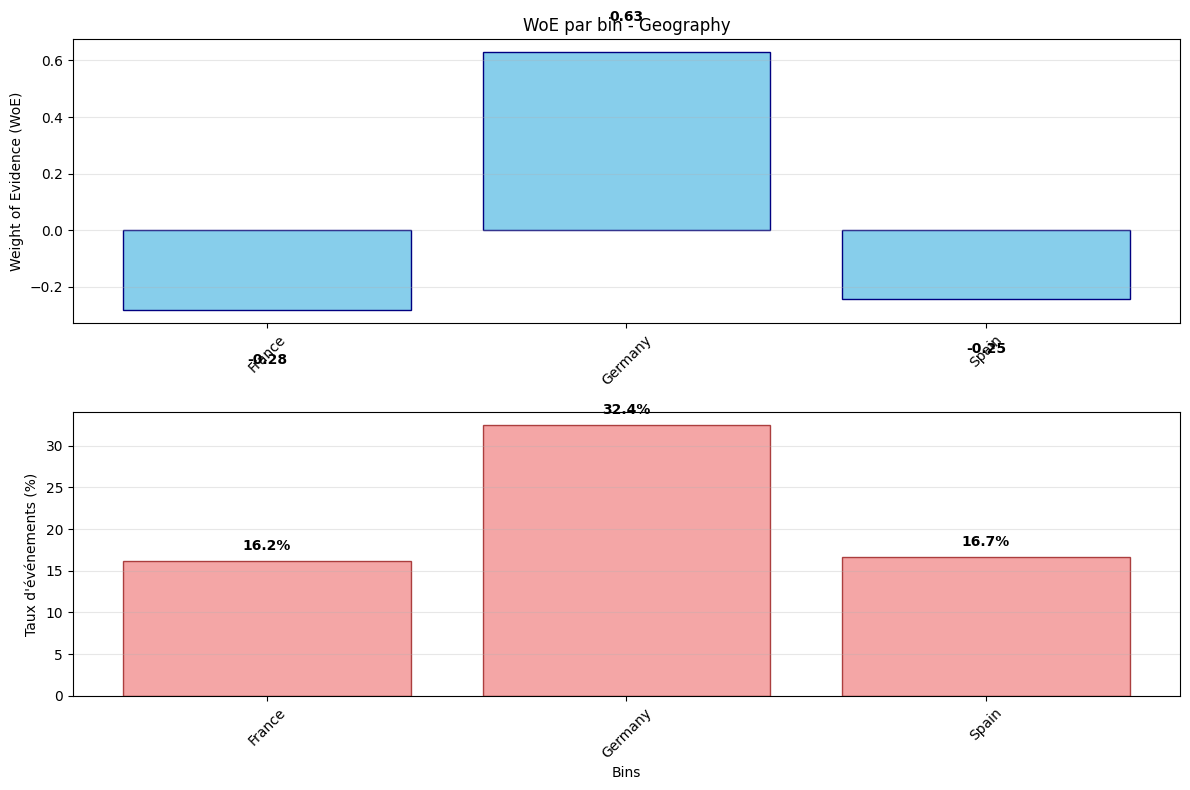


 Détail WoE et IV - Geography
    bin  total  events  non_events event_rate    woe  iv_component
 France   5014     810        4204      16.2% -0.283        0.0369
Germany   2509     814        1695      32.4%  0.630        0.1176
  Spain   2477     413        2064      16.7% -0.246        0.0139


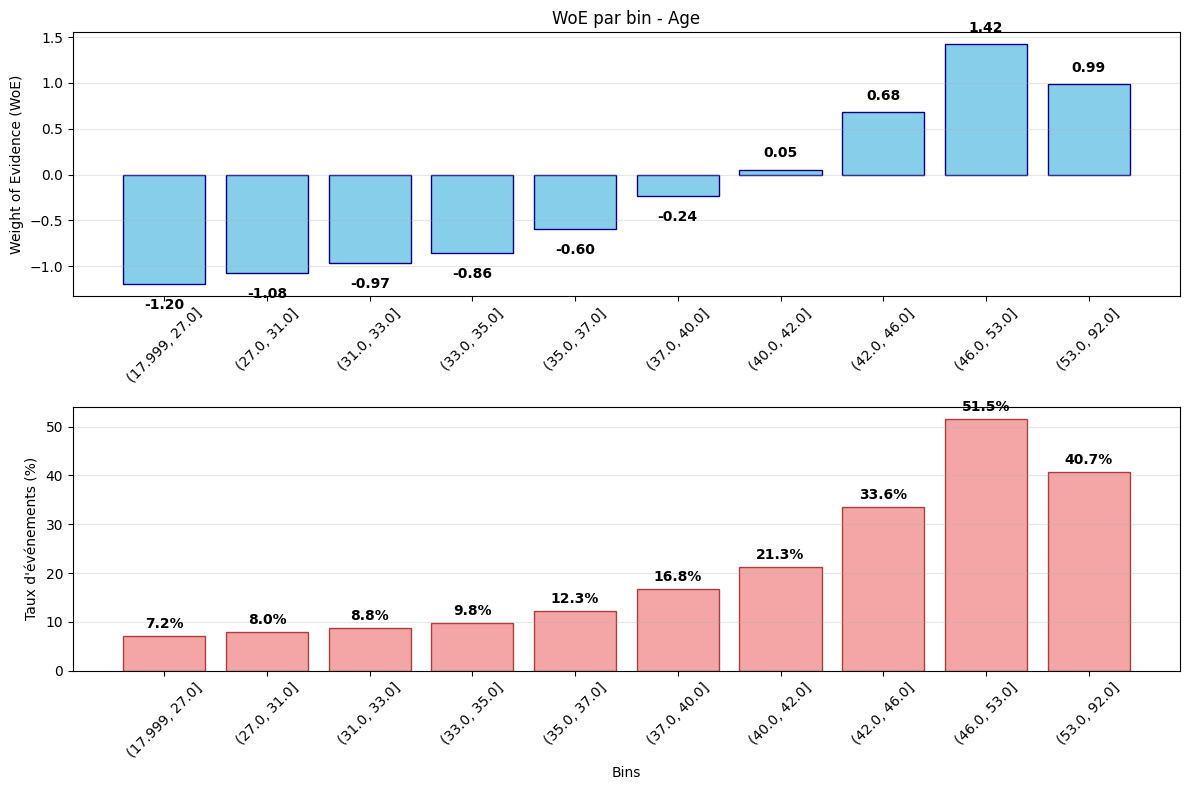


 Détail WoE et IV - Age
           bin  total  events  non_events event_rate    woe  iv_component
(17.999, 27.0]   1020      73         947       7.2% -1.200        0.0997
  (27.0, 31.0]   1352     108        1244       8.0% -1.081        0.1115
  (31.0, 33.0]    860      76         784       8.8% -0.970        0.0593
  (33.0, 35.0]    921      90         831       9.8% -0.859        0.0517
  (35.0, 37.0]    934     115         819      12.3% -0.600        0.0278
  (37.0, 40.0]   1332     224        1108      16.8% -0.235        0.0069
  (40.0, 42.0]    687     146         541      21.3%  0.054        0.0002
  (42.0, 46.0]   1009     339         670      33.6%  0.682        0.0561
  (46.0, 53.0]    919     473         446      51.5%  1.422        0.2506
  (53.0, 92.0]    966     393         573      40.7%  0.986        0.1193


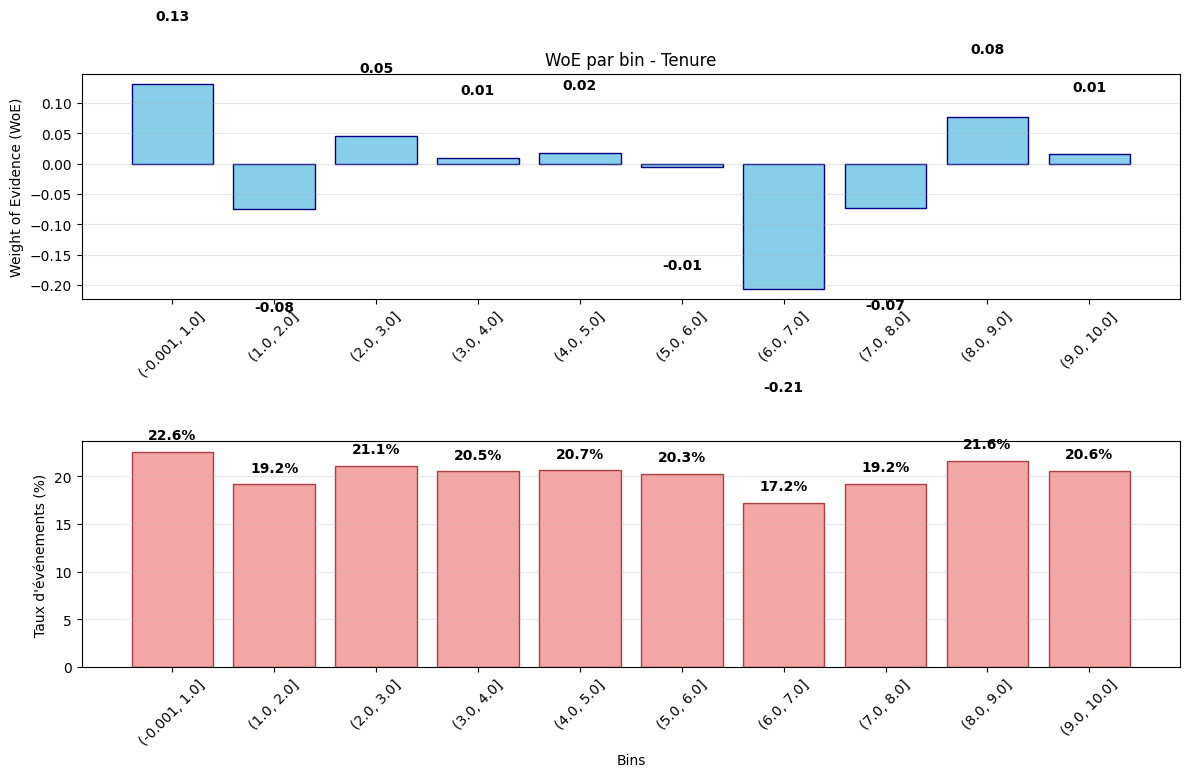


 Détail WoE et IV - Tenure
          bin  total  events  non_events event_rate    woe  iv_component
(-0.001, 1.0]   1448     327        1121      22.6%  0.131        0.0026
   (1.0, 2.0]   1048     201         847      19.2% -0.075        0.0006
   (2.0, 3.0]   1009     213         796      21.1%  0.045        0.0002
   (3.0, 4.0]    989     203         786      20.5%  0.010        0.0000
   (4.0, 5.0]   1012     209         803      20.7%  0.017        0.0000
   (5.0, 6.0]    967     196         771      20.3% -0.006        0.0000
   (6.0, 7.0]   1028     177         851      17.2% -0.207        0.0041
   (7.0, 8.0]   1025     197         828      19.2% -0.072        0.0005
   (8.0, 9.0]    984     213         771      21.6%  0.077        0.0006
  (9.0, 10.0]    490     101         389      20.6%  0.015        0.0000


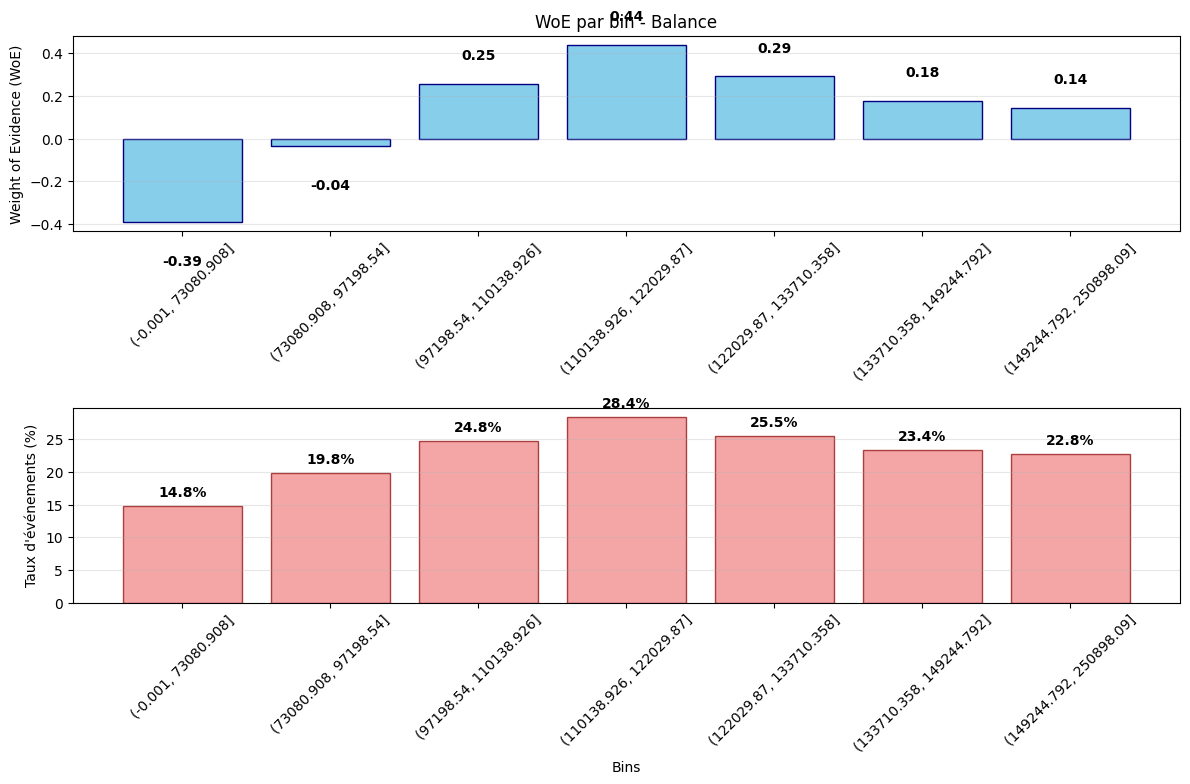


 Détail WoE et IV - Balance
                     bin  total  events  non_events event_rate    woe  iv_component
     (-0.001, 73080.908]   4000     590        3410      14.8% -0.391        0.0542
   (73080.908, 97198.54]   1000     198         802      19.8% -0.036        0.0001
  (97198.54, 110138.926]   1000     248         752      24.8%  0.254        0.0069
 (110138.926, 122029.87]   1000     284         716      28.4%  0.439        0.0217
 (122029.87, 133710.358]   1000     255         745      25.5%  0.291        0.0092
(133710.358, 149244.792]   1000     234         766      23.4%  0.177        0.0033
 (149244.792, 250898.09]   1000     228         772      22.8%  0.144        0.0022


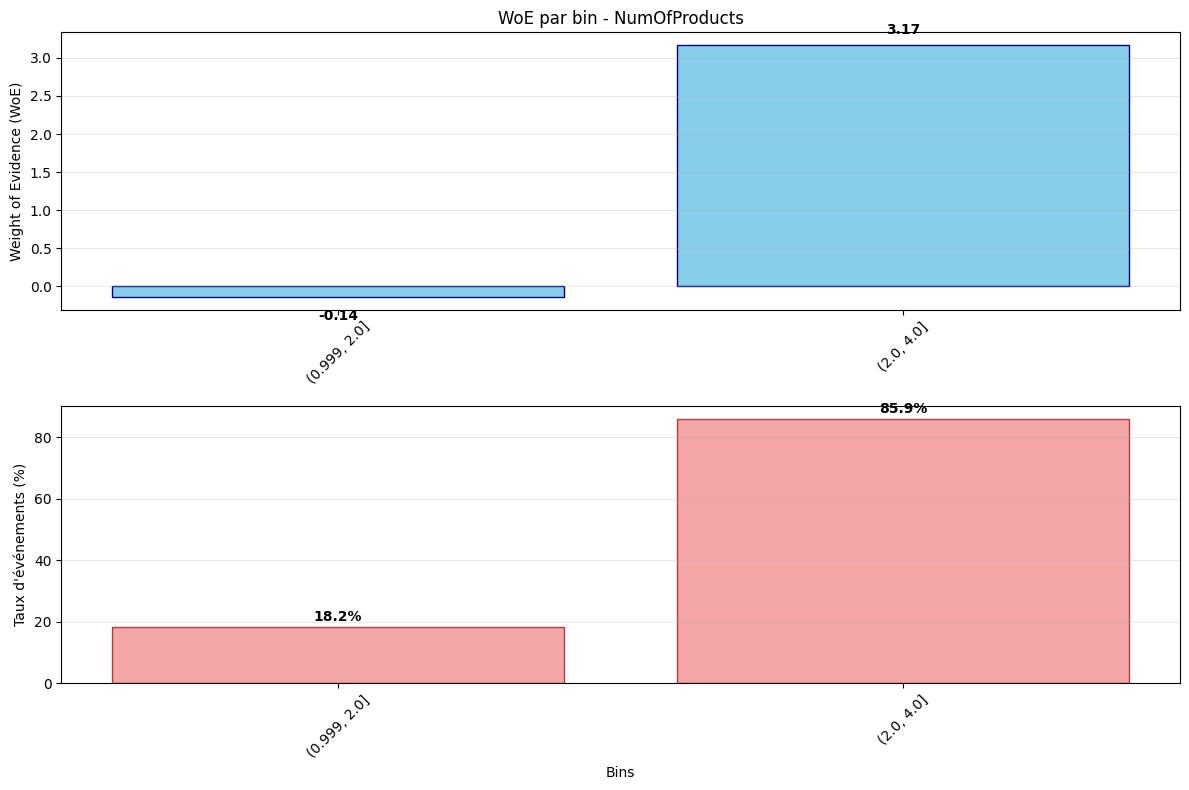


 Détail WoE et IV - NumOfProducts
         bin  total  events  non_events event_rate    woe  iv_component
(0.999, 2.0]   9674    1757        7917      18.2% -0.142        0.0187
  (2.0, 4.0]    326     280          46      85.9%  3.169        0.4174


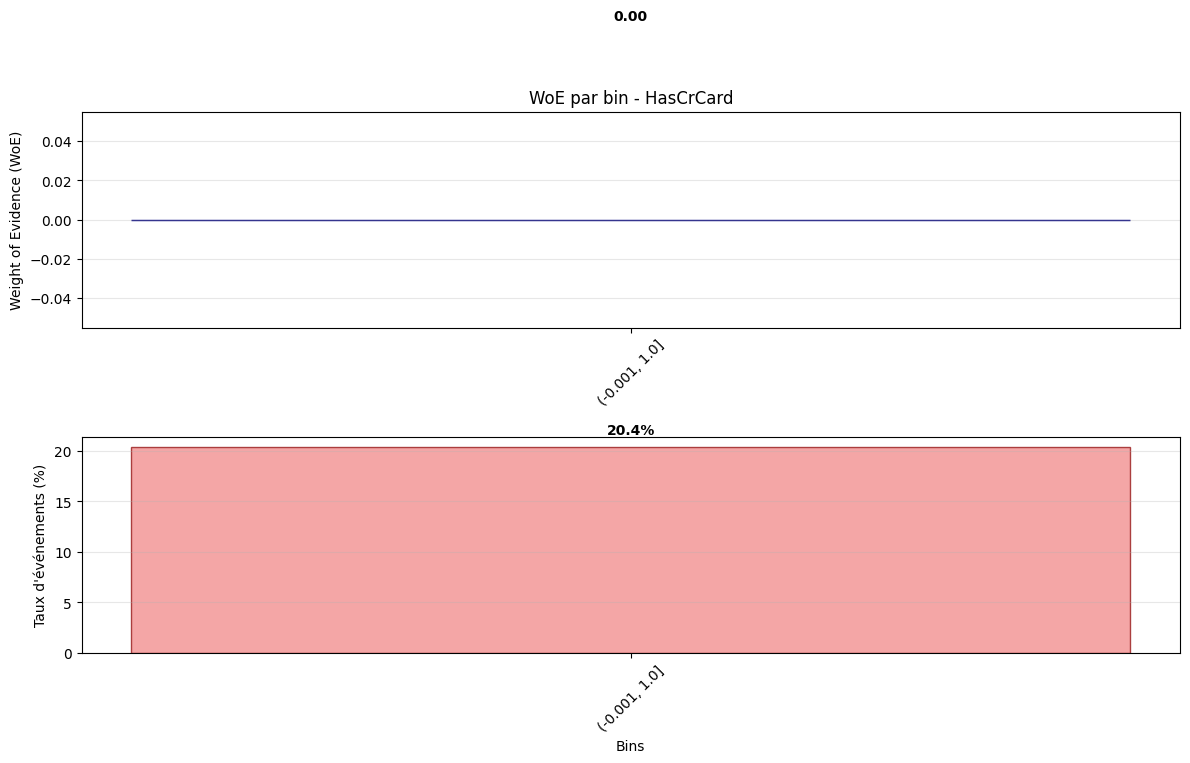


 Détail WoE et IV - HasCrCard
          bin  total  events  non_events event_rate  woe  iv_component
(-0.001, 1.0]  10000    2037        7963      20.4%  0.0           0.0


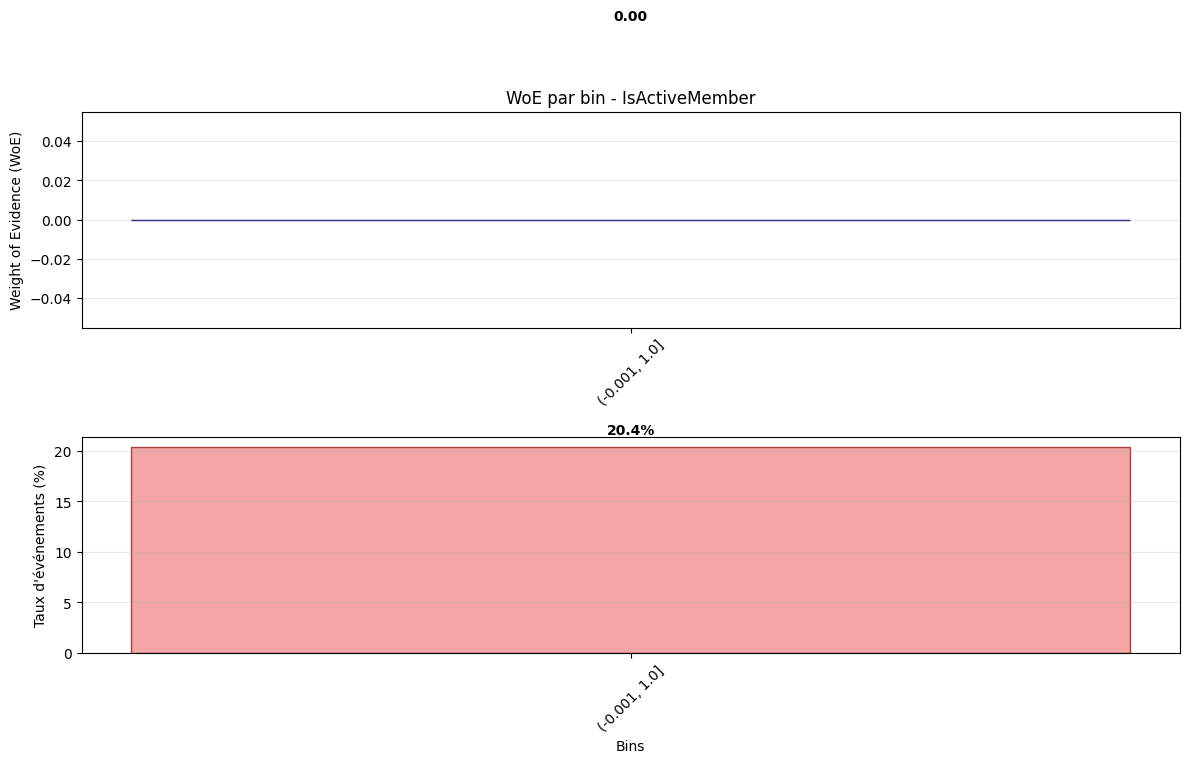


 Détail WoE et IV - IsActiveMember
          bin  total  events  non_events event_rate  woe  iv_component
(-0.001, 1.0]  10000    2037        7963      20.4%  0.0           0.0


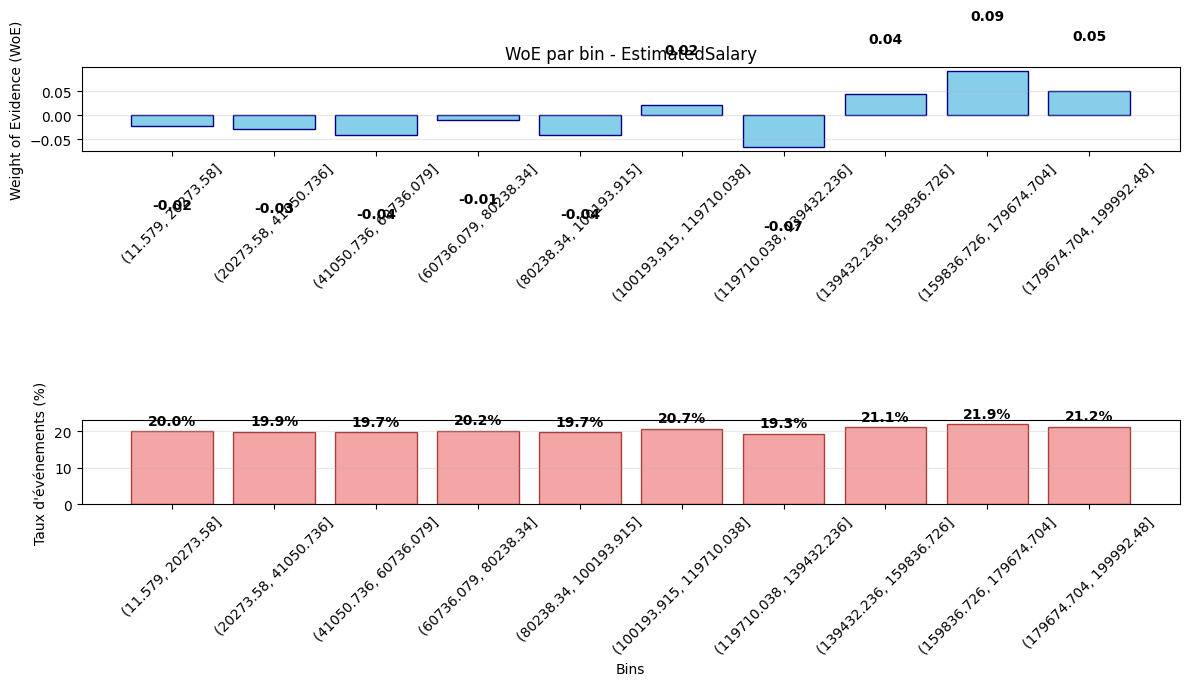


 Détail WoE et IV - EstimatedSalary
                     bin  total  events  non_events event_rate    woe  iv_component
      (11.579, 20273.58]   1000     200         800      20.0% -0.023        0.0001
   (20273.58, 41050.736]   1000     199         801      19.9% -0.029        0.0001
  (41050.736, 60736.079]   1000     197         803      19.7% -0.042        0.0002
   (60736.079, 80238.34]   1000     202         798      20.2% -0.011        0.0000
  (80238.34, 100193.915]   1000     197         803      19.7% -0.042        0.0002
(100193.915, 119710.038]   1000     207         793      20.7%  0.020        0.0000
(119710.038, 139432.236]   1000     193         807      19.3% -0.067        0.0004
(139432.236, 159836.726]   1000     211         789      21.1%  0.044        0.0002
(159836.726, 179674.704]   1000     219         781      21.9%  0.092        0.0009
 (179674.704, 199992.48]   1000     212         788      21.2%  0.050        0.0003


In [ ]:
# détails WoE
plot_woe_analysis(results, "CreditScore")
plot_woe_analysis(results, "Gender")
plot_woe_analysis(results, "Geography")
plot_woe_analysis(results, "Age")
plot_woe_analysis(results, "Tenure")
plot_woe_analysis(results, "Balance")
plot_woe_analysis(results, "NumOfProducts")
plot_woe_analysis(results, "HasCrCard")
plot_woe_analysis(results, "IsActiveMember")
plot_woe_analysis(results, "EstimatedSalary")

Le calcul du Weight of Evidence (WoE) et de l'Information Value (IV) constituent une étape pertinente précédant la modélisation. En effet, le WoE permet de mesurer la force de relation entre une variable avec la variable cible, "Exited". Dans notre cas, nous pouvons dire que cette force de relation, des différentes variables de notre jeu de données, dépend grandement de l'intervalle (bin).

Dans une autre mesure, l'IV permet de mesurer la capacité discriminante d'une variable sur notre variable cible, soit "Exited". Ici, certaines variables, comme "HasCrCard" et "IsActiveMember", ne présentent aucune capacité prédictive, dans la mesure où l'IV est nul. Néanmoins, d'autres variables, telles que "Age" et "NumOfProducts", ont, au contraire, une capacité prédictive puissante, presque suspecte.

Cette étude du WoE et de l'IV servira pour la prochaine étape de modélisation.

# Modélisation

## Régression logistique

### Data preprocessing

Désormais, nous allons effectuer des étapes de preprocessing. Certaines étapes seront associées aux variables polytomiques et d'autres pour les variables continues de notre base de données.

Tout d'abod, un One Hot Encoding (OHE) sera appliqué pour les variables polytomiques. Ensuite, un découpage par quantile sera effectué pour les variables continues de la base.

Les variables polytomiques à notre disposition sont les suivantes :
- "NumOfProducts"
- "Geography"

Les variables continues à notre disposition sont les suivantes :
- "CreditScore"
- "Balance"
- "EstimatedSalary"

In [ ]:
df["Balance"].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [ ]:
df["EstimatedSalary"].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

La variable "Balance" présente des valeurs minimales égales à zéro, ce qui pose un frein dans sa transformation logarithmique. Par conséquent, pour contourner cela, nous ajoutons 0.001 à cette transformation.

In [ ]:
df["Exited"].mean()

np.float64(0.2037)

Pour rappel, la variable cible ```Exited``` présente un déséquilibre de classe, dans la mesure où le taux de clients ayant déjà quitté l'entreprise n'atteint que 20.37%, dans notre base de données. Donc, dans la séparation de la base de données en train et test, nous appliquons une stratification ```stratify``` de la variable cible. De cette façon, nous remédions au déséquilibre de classe.

In [ ]:
# sélection des variables pertinentes
X = df.drop(columns=["Exited", "CreditScore_quantile","EstimatedSalary_quantile"], axis=1)
y = df["Exited"]

# transformation log de "Balance" et "EstimatedSalary"
X[["Balance", "EstimatedSalary"]] = np.log(X[["Balance", "EstimatedSalary"]] + 0.001)

# séparation de la base de données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
         ["Geography", "NumOfProducts", "Gender"]),
        ('cont', MinMaxScaler(),
         ["Balance", "EstimatedSalary"])
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

Ici, nous décidons d'apposer la fonctionnalité de ```sklearn```nommée ```MinMaxScaler``` dans le but de normaliser les variables explicatives afin d'éviter que les poids associés à chaque modalité ne soient démesurées, dû à un écart d'échelle de la donnée.



In [ ]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

X_train_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

In [ ]:
X_train_df.head()

cat__Geography_Germany  cat__Geography_Spain  cat__NumOfProducts_2  \
2151                     0.0                   0.0                   0.0   
8392                     1.0                   0.0                   0.0   
5006                     1.0                   0.0                   1.0   
4117                     0.0                   0.0                   1.0   
7182                     1.0                   0.0                   1.0   

      cat__NumOfProducts_3  cat__NumOfProducts_4  cat__Gender_Male  \
2151                   0.0                   0.0               1.0   
8392                   0.0                   0.0               1.0   
5006                   0.0                   0.0               0.0   
4117                   0.0                   0.0               1.0   
7182                   0.0                   0.0               1.0   

      cont__Balance  cont__EstimatedSalary  remainder__CreditScore  \
2151       0.000000               0.976796                   753.0   
8392       0.956055               0.883189                   739.0   
5006       0.961695               0.945399                   755.0   
4117       0.000000               0.909978                   561.0   
7182       0.960159               0.936347                   692.0   

      remainder__Age  remainder__Tenure  remainder__HasCrCard  \
2151            57.0                7.0                   1.0   
8392            32.0                3.0                   1.0   
5006            37.0                0.0                   1.0   
4117            37.0                5.0                   1.0   
7182            49.0                6.0                   0.0   

      remainder__IsActiveMember  
2151                        0.0  
8392                        0.0  
5006                        1.0  
4117                        0.0  
7182                        1.0

### Estimation

In [ ]:
# ajout de la constante
X_train_sm = sm.add_constant(X_train_df)
X_test_sm = sm.add_constant(X_test_df)

In [ ]:
def Implementation_model(model, X_train, y_train, hyperparameters=None):
    if hyperparameters is None:
        hyperparameters = {}

    if hasattr(model, "predict_proba"):
        sklearn_model = model(**hyperparameters)
        result = sklearn_model.fit(X_train, y_train)
    else:
        X_train_sm = sm.add_constant(X_train)
        logit_model = model(y_train, X_train_sm)
        result = logit_model.fit(disp=False)

    return result

In [ ]:
# estimation de la régression logistique
logit_result = Implementation_model(sm.Logit, X_train_sm, y_train)

# affichage résultats détaillés
print("=" * 70)
print("RÉSULTATS DÉTAILLÉS STATSMODELS")
print("=" * 70)

# résumé complet
print(logit_result.summary())

# statistiques associées
print("\n" + "=" * 50)
print("STATISTIQUES ADDITIONNELLES")
print("=" * 50)

print(f"Pseudo R² (McFadden): {logit_result.prsquared:.4f}")
print(f"Log-Likelihood: {logit_result.llf:.4f}")
print(f"LL Null: {logit_result.llnull:.4f}")
print(f"Nombre d'observations: {logit_result.nobs}")

RÉSULTATS DÉTAILLÉS STATSMODELS
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7986
Method:                           MLE   Df Model:                           13
Date:                Fri, 07 Nov 2025   Pseudo R-squ.:                  0.2634
Time:                        06:46:01   Log-Likelihood:                -2979.2
converged:                      False   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.6510      0.404     -6.569      0.000      -3.442      -1.860
cat__Geography_Germany        1.0365      0.084     12

À partir de cette première estimation, nous nous apercevons que les variables suivantes ne sont pas significatives au seuil de 10% :
- "cat__Geography_Spain"
- "cat__NumOfProducts_4"
- "cont__EstimatedSalary"
- "remainder__Tenure"
- "remainder__HasCrCard"

Une seconde estimation, dépourvue des variables non significatives, est alors effectuée.

In [ ]:
X_train_df = X_train_df.drop(columns=["remainder__HasCrCard","cat__Geography_Spain","cat__NumOfProducts_4","cont__EstimatedSalary","remainder__Tenure"])
X_train_df

cat__Geography_Germany  cat__NumOfProducts_2  cat__NumOfProducts_3  \
2151                     0.0                   0.0                   0.0   
8392                     1.0                   0.0                   0.0   
5006                     1.0                   1.0                   0.0   
4117                     0.0                   1.0                   0.0   
7182                     1.0                   1.0                   0.0   
...                      ...                   ...                   ...   
4555                     0.0                   0.0                   0.0   
4644                     0.0                   1.0                   0.0   
8942                     0.0                   1.0                   0.0   
2935                     0.0                   1.0                   0.0   
6206                     0.0                   0.0                   0.0   

      cat__Gender_Male  cont__Balance  remainder__CreditScore  remainder__Age  \
2151               1.0       0.000000                   753.0            57.0   
8392               1.0       0.956055                   739.0            32.0   
5006               0.0       0.961695                   755.0            37.0   
4117               1.0       0.000000                   561.0            37.0   
7182               1.0       0.960159                   692.0            49.0   
...                ...            ...                     ...             ...   
4555               0.0       0.000000                   688.0            35.0   
4644               1.0       0.000000                   712.0            74.0   
8942               0.0       0.937780                   667.0            37.0   
2935               1.0       0.955473                   687.0            35.0   
6206               1.0       0.000000                   802.0            51.0   

      remainder__IsActiveMember  
2151                        0.0  
8392                        0.0  
5006                        1.0  
4117                        0.0  
7182                        1.0  
...                         ...  
4555                        0.0  
4644                        0.0  
8942                        1.0  
2935                        0.0  
6206                        1.0  

[8000 rows x 8 columns]

In [ ]:
X_test_df = X_test_df.drop(columns=["remainder__HasCrCard","cat__Geography_Spain","cat__NumOfProducts_4","cont__EstimatedSalary","remainder__Tenure"])
X_test_df

cat__Geography_Germany  cat__NumOfProducts_2  cat__NumOfProducts_3  \
5702                     0.0                   1.0                   0.0   
3667                     1.0                   1.0                   0.0   
1617                     0.0                   1.0                   0.0   
5673                     0.0                   1.0                   0.0   
4272                     0.0                   0.0                   0.0   
...                      ...                   ...                   ...   
5768                     0.0                   0.0                   0.0   
833                      1.0                   1.0                   0.0   
9719                     1.0                   0.0                   0.0   
2776                     0.0                   1.0                   0.0   
3776                     0.0                   0.0                   0.0   

      cat__Gender_Male  cont__Balance  remainder__CreditScore  remainder__Age  \
5702               1.0       0.000000                   585.0            36.0   
3667               1.0       0.968972                   525.0            33.0   
1617               0.0       0.000000                   557.0            40.0   
5673               1.0       0.972182                   639.0            34.0   
4272               0.0       0.941968                   640.0            34.0   
...                ...            ...                     ...             ...   
5768               1.0       0.977525                   674.0            36.0   
833                1.0       0.960575                   634.0            37.0   
9719               0.0       0.967882                   516.0            47.0   
2776               1.0       0.000000                   689.0            39.0   
3776               1.0       0.976773                   750.0            33.0   

      remainder__IsActiveMember  
5702                        0.0  
3667                        0.0  
1617                        1.0  
5673                        0.0  
4272                        1.0  
...                         ...  
5768                        1.0  
833                         1.0  
9719                        0.0  
2776                        0.0  
3776                        0.0  

[2000 rows x 8 columns]

In [ ]:
# ajout de la constante
X_train_sm = sm.add_constant(X_train_df)
X_test_sm = sm.add_constant(X_test_df)

In [ ]:
# estimation de la régression logistique
logit_result = Implementation_model(sm.Logit, X_train_sm, y_train)

# affichage résultats détaillés
print("=" * 70)
print("RÉSULTATS DÉTAILLÉS")
print("=" * 70)

# résumé complet
print(logit_result.summary())

# statistiques associées
print("\n" + "=" * 50)
print("STATISTIQUES ADDITIONNELLES")
print("=" * 50)

print(f"Pseudo R carré (McFadden): {logit_result.prsquared:.4f}")
print(f"Log-Likelihood: {logit_result.llf:.4f}")
print(f"LL Null: {logit_result.llnull:.4f}")
print(f"Nombre d'observations: {logit_result.nobs}")

RÉSULTATS DÉTAILLÉS
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7991
Method:                           MLE   Df Model:                            8
Date:                Fri, 07 Nov 2025   Pseudo R-squ.:                  0.2499
Time:                        06:54:50   Log-Likelihood:                -3033.8
converged:                       True   LL-Null:                       -4044.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.6155      0.260    -10.047      0.000      -3.126      -2.105
cat__Geography_Germany        1.0036      0.077     12.968      0.

À présent, toutes les variables sont significatives au seuil de 5%. Nous remarquons que la majorité des variables, dont la constante, présentent un coefficient associé négatif. Cela signifie en outre que ces variables ont un impact négatif sur la rétention client au sein de notre entreprise d'étude. Plus concrètement, ces variables réduisent les chances de partir de l'entreprise. C'est le cas de ```NumOfProducts_2```, ```Gender_Male```, ```Balance```, ```CreditScore``` et ```IsActiveMember```. Il est pertinent de souligner la faible magnitude de probabilité de réduction de sortie de l'entreprise du score de crédit (```CreditScore```). Finalement, ```Age``` et ```Geography_Germany``` sont les deux seules variables augmentant les chances de sortie de l'entreprise.

### Validation - métriques de performance

In [ ]:
# prédictions suite à la régression logistique
# test
y_pred_proba = logit_result.predict(X_test_sm)
# train
y_pred_proba_train = logit_result.predict(X_train_sm)

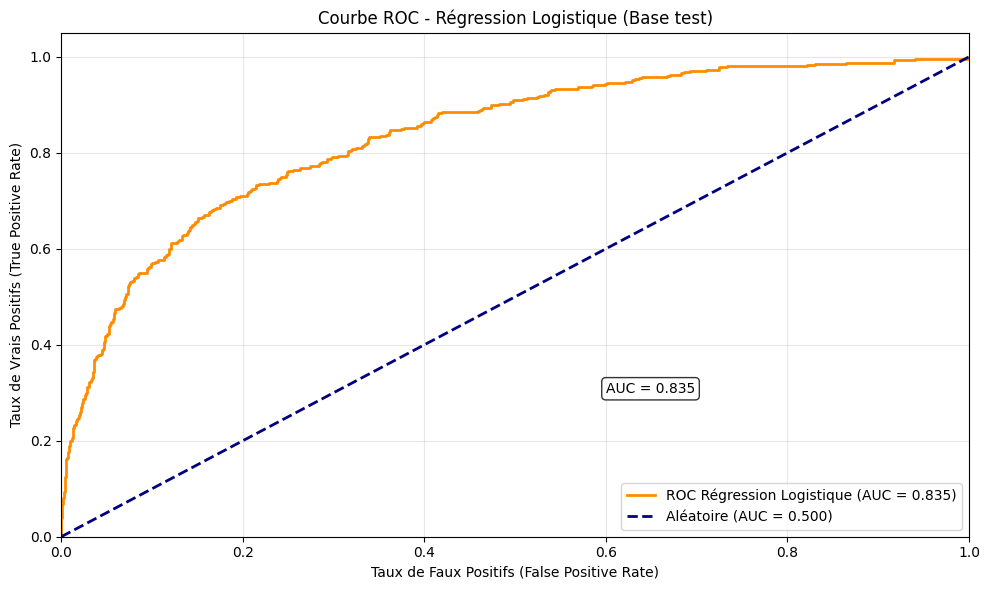

Courbe ROC générée pour Régression Logistique
Score AUC: 0.8351


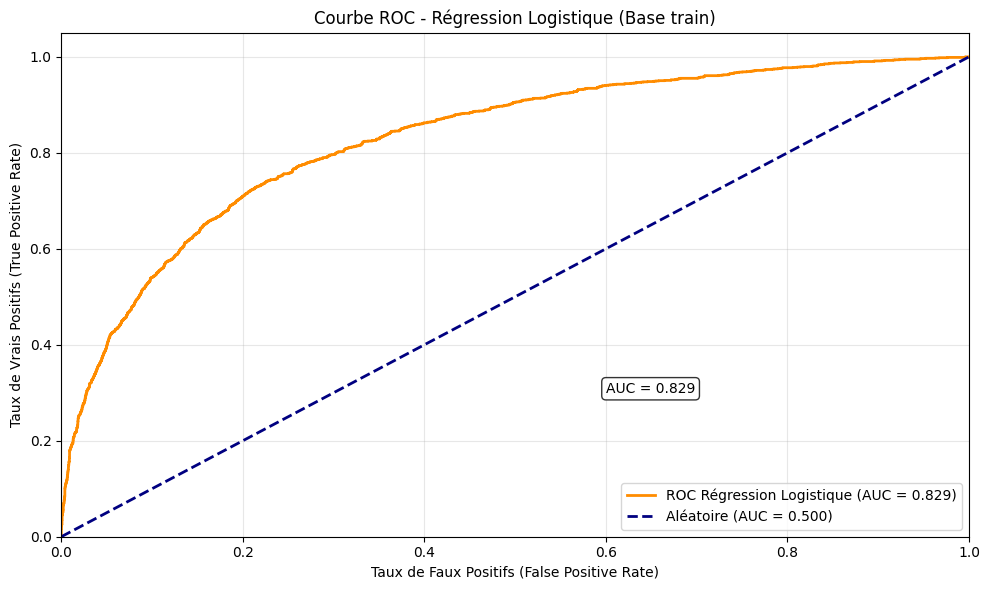

Courbe ROC générée pour Régression Logistique
Score AUC: 0.8288


In [ ]:
def plot_roc_auc(y_true, y_pred_proba, title = "Base test", model_name="Modèle", figsize=(10, 6)):
    # vérification inputs
    if y_true is None or y_pred_proba is None:
        raise ValueError("y_true et y_pred_proba ne peuvent pas être None")

    if len(y_true) != len(y_pred_proba):
        raise ValueError("y_true et y_pred_proba doivent avoir la même longueur")

    # calcul métriques liés à la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # calcul coefficient AUC
    auc_score = roc_auc_score(y_true, y_pred_proba)

    # courbe ROC
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC {model_name} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
             label='Aléatoire (AUC = 0.500)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de Faux Positifs (False Positive Rate)')
    plt.ylabel('Taux de Vrais Positifs (True Positive Rate)')
    plt.title(f'Courbe ROC - {model_name} ({title})')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.text(0.6, 0.3, f'AUC = {roc_auc:.3f}',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

    plt.tight_layout()
    plt.show()

    # affichage explicit des résultats
    print(f"Courbe ROC générée pour {model_name}")
    print(f"Score AUC: {auc_score:.4f}")

    return {
        'fpr': fpr,
        'tpr': tpr,
        'thresholds': thresholds,
        'auc': roc_auc,
        'auc_sklearn': auc_score
    }

roc_results = plot_roc_auc(y_test, y_pred_proba, "Base test", "Régression Logistique")
roc_results = plot_roc_auc(y_train, y_pred_proba_train, "Base train", "Régression Logistique")

D'après la courbe ROC générée ci-dessus, la performance de la régression logistique semble satisfaisante. Cela est affirmé par la valeur relativement haute du coefficient AUC, égal à 0.835.

### Validation - goodness-of-fit

Dans cette seconde estimation, les variables explicatives sont toutes significatives au seuil de 5%, excepté pour la variable "cat__NumOfProducts_3".

De plus, le coefficient pseudo R carré est de 0.2499, ce qui est une valeur relativement acceptable dans le cadre d'une régression logistique.

AUC sur le test set complet: 0.8351
BOOTSTRAP AUC ANALYSIS
Taille totale du test set: 2000
Taille des échantillons bootstrap: 160 (8.0%)
Nombre d'itérations bootstrap: 500

STATISTIQUES DES SCORES AUC:
Moyenne: 0.8356
Écart-type: 0.0396
Médiane: 0.8345
Intervalle de confiance 95%: [0.7525, 0.9076]
Minimum: 0.7127
Maximum: 0.9423


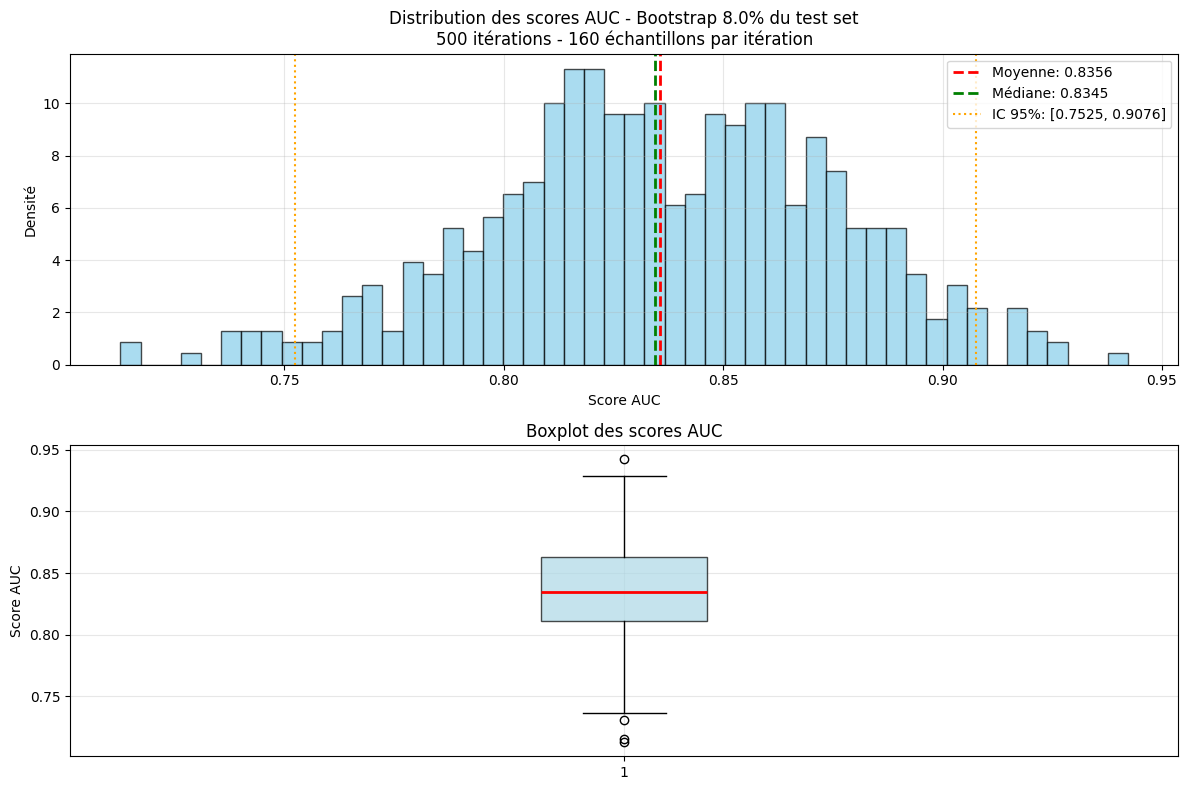


ANALYSE DÉTAILLÉE - REGRESSION LOGISTIQUE
Moyenne: 0.8356
Médiane: 0.8345
Écart-type: 0.0396
Variance: 0.0016
Coefficient de variation: 4.73%
Skewness: -0.1764
Kurtosis: -0.1160
IC 95% inf: 0.7525
IC 95% sup: 0.9076
IC 90% inf: 0.7694
IC 90% sup: 0.8991

Test de normalité (p-value): 0.2465
→ La distribution semble normale


In [ ]:
def bootstrap_auc_histogram(model, X_test, y_test, bootstrap_fraction=0.05,
                           n_bootstrap=1000, random_state=42, figsize=(12, 8)):
    """
    Réalise un bootstrap sur un pourcentage de la base test et affiche l'histogramme des AUC
    """

    print("=" * 60)
    print("BOOTSTRAP AUC ANALYSIS")
    print("=" * 60)

    # calcul taille échantillon bootstrap
    sample_size = int(len(X_test) * bootstrap_fraction)

    print(f"Taille totale du test set: {len(X_test)}")
    print(f"Taille des échantillons bootstrap: {sample_size} ({bootstrap_fraction*100}%)")
    print(f"Nombre d'itérations bootstrap: {n_bootstrap}")

    # stockage des scores AUC
    auc_scores = []

    # boucle bootstrap
    for i in range(n_bootstrap):
        # échnantillonnage avec remise
        X_bootstrap, y_bootstrap = resample(
            X_test, y_test,
            n_samples=sample_size,
            replace=True,
            random_state=random_state + i,
            stratify=y_test
        )

        if not hasattr(model, 'predict_proba'):
        # prédictions
          y_pred_proba = model.predict(X_bootstrap)

        else:
          y_pred_proba = model.predict_proba(X_bootstrap)[:,1]

        auc = roc_auc_score(y_bootstrap,y_pred_proba)

        auc_scores.append(auc)

    # conversion en array
    auc_scores = np.array(auc_scores)

    # calcul des statistiques
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    median_auc = np.median(auc_scores)
    ci_lower = np.percentile(auc_scores, 2.5)
    ci_upper = np.percentile(auc_scores, 97.5)

    # affichage des statistiques
    print(f"\nSTATISTIQUES DES SCORES AUC:")
    print(f"Moyenne: {mean_auc:.4f}")
    print(f"Écart-type: {std_auc:.4f}")
    print(f"Médiane: {median_auc:.4f}")
    print(f"Intervalle de confiance 95%: [{ci_lower:.4f}, {ci_upper:.4f}]")
    print(f"Minimum: {np.min(auc_scores):.4f}")
    print(f"Maximum: {np.max(auc_scores):.4f}")

    # création de l'histogramme
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)

    # histogramme principal
    n, bins, patches = ax1.hist(auc_scores, bins=50, alpha=0.7, color='skyblue',
                               edgecolor='black', density=True)

    # lignes verticales pour les statistiques
    ax1.axvline(mean_auc, color='red', linestyle='--', linewidth=2,
                label=f'Moyenne: {mean_auc:.4f}')
    ax1.axvline(median_auc, color='green', linestyle='--', linewidth=2,
                label=f'Médiane: {median_auc:.4f}')
    ax1.axvline(ci_lower, color='orange', linestyle=':', linewidth=1.5,
                label=f'IC 95%: [{ci_lower:.4f}, {ci_upper:.4f}]')
    ax1.axvline(ci_upper, color='orange', linestyle=':', linewidth=1.5)

    ax1.set_xlabel('Score AUC')
    ax1.set_ylabel('Densité')
    ax1.set_title(f'Distribution des scores AUC - Bootstrap {bootstrap_fraction*100}% du test set\n'
                 f'{n_bootstrap} itérations - {sample_size} échantillons par itération')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # box plot
    ax2.boxplot(auc_scores, vert=True, patch_artist=True,
               boxprops=dict(facecolor='lightblue', alpha=0.7),
               medianprops=dict(color='red', linewidth=2))
    ax2.set_ylabel('Score AUC')
    ax2.set_title('Boxplot des scores AUC')
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return auc_scores, fig

# fonction pour analyse détaillée
def detailed_bootstrap_analysis(auc_scores, model_name="Modèle"):
    """
    Analyse détaillée des résultats bootstrap
    """
    print("\n" + "=" * 50)
    print(f"ANALYSE DÉTAILLÉE - {model_name.upper()}")
    print("=" * 50)

    # Statistiques descriptives
    from scipy import stats

    stats_dict = {
        'Moyenne': np.mean(auc_scores),
        'Médiane': np.median(auc_scores),
        'Écart-type': np.std(auc_scores),
        'Variance': np.var(auc_scores),
        'Coefficient de variation': (np.std(auc_scores) / np.mean(auc_scores)) * 100,
        'Skewness': stats.skew(auc_scores),
        'Kurtosis': stats.kurtosis(auc_scores),
        'IC 95% inf': np.percentile(auc_scores, 2.5),
        'IC 95% sup': np.percentile(auc_scores, 97.5),
        'IC 90% inf': np.percentile(auc_scores, 5),
        'IC 90% sup': np.percentile(auc_scores, 95)
    }

    for key, value in stats_dict.items():
        if 'IC' in key:
            print(f"{key}: {value:.4f}")
        elif key == 'Coefficient de variation':
            print(f"{key}: {value:.2f}%")
        else:
            print(f"{key}: {value:.4f}")

    # test de normalité
    _, p_value = stats.normaltest(auc_scores)
    print(f"\nTest de normalité (p-value): {p_value:.4f}")
    if p_value > 0.05:
        print("→ La distribution semble normale")
    else:
        print("→ La distribution ne semble pas normale")

    return stats_dict

# calcul de l'AUC sur test
y_pred_proba_full = logit_result.predict(X_test_sm)
auc_full = roc_auc_score(y_test, y_pred_proba_full)
print(f"AUC sur le test set complet: {auc_full:.4f}")

# application du bootstrap
auc_scores, fig = bootstrap_auc_histogram(
    model=logit_result,
    X_test=X_test_sm,
    y_test=y_test,
    bootstrap_fraction=0.08,
    n_bootstrap=500,
    random_state=42
)

# Analyse détaillée
stats_dict = detailed_bootstrap_analysis(auc_scores, "Regression Logistique")

    # Sauvegarde optionnelle
    # fig.savefig('bootstrap_auc_distribution.png', dpi=300, bbox_inches='tight')
    # np.save('auc_scores_bootstrap.npy', auc_scores)

D'après le bootstrap ci-dessus, la précision de la régression logistique semble stable tout au long des tirages effectués, dans la mesure où la précision varie entre 0.75 et 0.95, avec un écart-type de 0.0396 (3.96%). Ce dernier est une valeur relativement acceptable.

In [ ]:
# test de multicollinéarité - facteur d'inflation de variance (VIF)
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_data = vif_data.sort_values("VIF", ascending=False)
    return vif_data

# VIF sur train
vif_results = calculate_vif(X_train_df)

print("Résultats")
print(vif_results)

# variables problématiques
high_vif = vif_results[vif_results['VIF'] > 10]
print(f"Variables avec VIF > 10: {len(high_vif)}")

Résultats
                    Variable        VIF
5     remainder__CreditScore  15.187631
6             remainder__Age  11.757952
4              cont__Balance   3.960060
1       cat__NumOfProducts_2   2.209270
3           cat__Gender_Male   2.173161
7  remainder__IsActiveMember   2.080402
0     cat__Geography_Germany   1.693076
2       cat__NumOfProducts_3   1.063454
Variables avec VIF > 10: 2


Dans notre seconde régression logistique, nettoyée des variables non significatives, deux variables souffrent de multicollinéarité : "remainder__CreditScore" et "remainder_Age". En effet, le facteur d'inflation de variance (VIF) associé est supérieur à 10 dans ce cas.

In [ ]:
# test d'ajustement de Hosmer-Lemeshow
def hosmer_lemeshow_simple(y_true, y_pred_proba, groups=10):
    df = pd.DataFrame({"y": y_true, "prob": y_pred_proba})
    df['groupe'] = pd.qcut(df['prob'], groups, labels=False)

    stats = df.groupby('groupe').agg(
        obs_total=("y", "count"),
        obs_pos=('y', 'sum'),
        prob_sum=('prob', 'sum')
    )

    hl_stat = ((stats['obs_pos'] - stats['prob_sum'])**2 /
               (stats['prob_sum'] * (1 - stats['prob_sum']/stats['obs_total']))).sum()

    p_value = chi2.sf(hl_stat, groups-2)
    return hl_stat, p_value

# Test sur train
hl_stat, hl_pvalue = hosmer_lemeshow_simple(y_train, y_pred_proba_train)
print(f"Hosmer-Lemeshow: HL = {hl_stat:.3f}, p = {hl_pvalue:.4f}")
print(f"Conclusion: {"Bon ajustement au seuil de 5%" if hl_pvalue > 0.05 else "Mauvais ajustement"}")

Hosmer-Lemeshow: HL = 6.860, p = 0.5518
Conclusion: Bon ajustement au seuil de 5%


## Arbre de décision

### Data preprocessing

Dans cette étape de data preprocessing, nous allons effectuer un One Hot Encoding (OHE) des variables catégorielles polytomiques.

Les variables polytomiques à notre disposition sont les suivantes :
- "NumOfProducts"
- "Geography"

Ici, une seule étape sera effectuée en termes de preprocessing.

In [ ]:
# sélection des variables pertinentes
X = df.drop(columns=["Exited", "CreditScore_quantile","EstimatedSalary_quantile"], axis=1)
y = df["Exited"]

# transformation log de "Balance" et "EstimatedSalary"
X[["Balance", "EstimatedSalary"]] = np.log(X[["Balance", "EstimatedSalary"]] + 0.001)

# séparation de la base de données en train et test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
         ["Geography", "NumOfProducts", "Gender"])
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_val_processed = pipeline.fit_transform(X_train_val)

X_test_processed = pipeline.transform(X_test)

# division 2/3 train, 1/3 validation
print("Division 2/3 train, 1/3 validation")
print("=" * 50)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train_val_processed,
    y_train_val,
    test_size=1/3,  # Exactement 1/3
    random_state=42,
    stratify=y_train_val  # Conservation des proportions des classes
)

print("Dimensions après division:")
print(f"X_train_sub (2/3): {X_train_sub.shape}")
print(f"X_val (1/3): {X_val.shape}")
print(f"y_train_sub: {y_train_sub.shape}")
print(f"y_val: {y_val.shape}")

# vérification
print(f"\nVérification des proportions :")
total_original = len(X_train_val_processed)
print(f"Original: {total_original} échantillons")

train_pct = len(X_train_sub) / total_original
val_pct = len(X_val) / total_original

print(f"Train : {len(X_train_sub)} échantillons ({train_pct:.1%})")
print(f"Validation : {len(X_val)} échantillons ({val_pct:.1%})")

# Vérification de la stratification si applicable
if hasattr(y_train_val, "value_counts"):
    print(f"\nDistribution des classes:")
    print("Original:")
    print(y_train_val.value_counts(normalize=True))
    print("\nTrain (2/3):")
    print(y_train_sub.value_counts(normalize=True))
    print("\nValidation (1/3):")
    print(y_val.value_counts(normalize=True))

Division 2/3 train, 1/3 validation
Dimensions après division:
X_train_sub (2/3): (5333, 13)
X_val (1/3): (2667, 13)
y_train_sub: (5333,)
y_val: (2667,)

Vérification des proportions :
Original: 8000 échantillons
Train : 5333 échantillons (66.7%)
Validation : 2667 échantillons (33.3%)

Distribution des classes:
Original:
Exited
0    0.79625
1    0.20375
Name: proportion, dtype: float64

Train (2/3):
Exited
0    0.796175
1    0.203825
Name: proportion, dtype: float64

Validation (1/3):
Exited
0    0.7964
1    0.2036
Name: proportion, dtype: float64


### Recherche des hyperparamètres

In [ ]:
# création d'un dictionnaire pour stocker les hyperparamètres calculé pour chaque modèle
dict_hyperparamètres = {}

In [ ]:
# fonction random grid search (RGS)
def quick_random_search(model, param_grid, X_val, y_val, n_iter=50, cv=3):
    """
    Random Grid Search
    """

    random_search = RandomizedSearchCV(
        model, param_grid, n_iter=n_iter, cv=cv,
        scoring='roc_auc', random_state=42, n_jobs=-1
    )

    random_search.fit(X_val, y_val)

    print(f"Meilleur score: {random_search.best_score_:.4f}")
    print("Meilleurs paramètres:", random_search.best_params_)

    return random_search.best_estimator_, random_search.best_params_

Dans notre situation, nous décidons d'effectuer un random grid search (RGS). Cette technique nous permettra de trouver les hyperparamètres optimaux pour l'arbre de décision selon des intervalles de valeurs spécifiées. Le RGS est particulièrement pertinent dans la mesure où il permet une meilleure couverture, sans rester dans un maillage fixe. De plus, cela permet d'obtenir de meilleurs paramètres avec moins d'essais.

In [ ]:
# grille de recherche pour le RGS
dt_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['sqrt', 'log2', 0.5, 0.7, 0.9],
    'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]
}

# init arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)

# RGS
best_dt, best_dt_params = quick_random_search(
    model=dt_model,
    param_grid=dt_param_grid,
    X_val=X_val,
    y_val=y_val,
    n_iter=50,
    cv=3
)

dict_hyperparamètres[best_dt.__class__.__name__] = best_dt_params

Meilleur score: 0.8044
Meilleurs paramètres: {'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0, 'max_features': 0.9, 'max_depth': 7, 'criterion': 'entropy', 'class_weight': {0: 1, 1: 2}}


In [ ]:
print(dict_hyperparamètres)

{'DecisionTreeClassifier': {'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0, 'max_features': 0.9, 'max_depth': 7, 'criterion': 'entropy', 'class_weight': {0: 1, 1: 2}}, 'RandomForestClassifier': {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 0.8, 'max_features': 'log2', 'max_depth': 7, 'class_weight': None, 'bootstrap': True}}


In [ ]:
for key in dict_hyperparamètres.keys():
  print("  Hyperparamètres de la "+f"{key}:")
  print(pd.DataFrame(dict_hyperparamètres[key],index = [0]))
  print("\n")

  Hyperparamètres de la DecisionTreeClassifier:
  splitter  min_samples_split  min_samples_leaf  min_impurity_decrease  \
0   random                 10                 5                    0.0   

   max_features  max_depth criterion  class_weight  
0           0.9          7   entropy             1  


  Hyperparamètres de la RandomForestClassifier:
   n_estimators  min_samples_split  min_samples_leaf  max_samples  \
0           200                  5                 2          0.8   

  max_features  max_depth class_weight  bootstrap  
0         log2          7         None       True  




Afin d'éviter le surapprentissage, nous décidons de limiter la profondeur maximale de l'arbre (```max_depth```), ainsi que pour d'autres paramètres tels que ```max_features```

In [ ]:
# entraînement
best_dt.fit(X_train_sub, y_train_sub)

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=7, max_features=0.9, min_samples_leaf=5,
                       min_samples_split=10, random_state=42,
                       splitter='random')

In [ ]:
y_train_pred = best_dt.predict_proba(X_train_sub)[:,1]
y_val_pred = best_dt.predict_proba(X_val)[:,1]
y_test_pred = best_dt.predict_proba(X_test_processed)[:,1]

In [ ]:
y_train_pred

array([0.31578947, 0.33492823, 0.21587302, ..., 0.03846154, 0.13265306,
       0.7268623 ])

### Scores finaux

In [ ]:
# calcul du score sur train, test et validation
def score_train_val_test(y_train, y_train_pred, y_val, y_val_pred, y_test, y_test_pred):
    """ Calcul du score pour train, test et validation

    Paramètres :
    y_train : vrai label du train
    y_train_pred : probabilités prédites pour le train
    y_val : vrai label de validation
    y_val_pred : probabilités prédites pour validation
    y_test : vrai label pour test
    y_test_pred : probabilités prédites pour test

    """

    # vérification prédictions
    for pred, name in zip([y_train_pred, y_val_pred, y_test_pred],
                         ['Train', 'Validation', 'Test']):
        if np.any(pred < 0) or np.any(pred > 1):
            print(f"Attention: Les prédictions pour {name} ne semblent pas être des probabilités")

    # calcul des métriques
    metrics = {}

    # AUC
    try:
        metrics['AUC'] = {
            'Train': roc_auc_score(y_train, y_train_pred),
            'Val': roc_auc_score(y_val, y_val_pred),
            'Test': roc_auc_score(y_test, y_test_pred)
        }
    except Exception as e:
        print(f"Erreur dans le calcul de l'AUC: {e}")
        metrics['AUC'] = {'Train': np.nan, 'Val': np.nan, 'Test': np.nan}

    # log-loss
    try:
        metrics['LogLoss'] = {
            'Train': log_loss(y_train, y_train_pred),
            'Val': log_loss(y_val, y_val_pred),
            'Test': log_loss(y_test, y_test_pred)
        }
    except Exception as e:
        print(f"Erreur dans le calcul de la LogLoss: {e}")
        metrics['LogLoss'] = {'Train': np.nan, 'Val': np.nan, 'Test': np.nan}

    # entropie croisée binaire (identique à log_loss pour la classification binaire)
    try:
        def binary_cross_entropy(y_true, y_pred):
            epsilon = 1e-15
            y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
            return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

        metrics["Entropy"] = {
            'Train': binary_cross_entropy(y_train, y_train_pred),
            'Val': binary_cross_entropy(y_val, y_val_pred),
            'Test': binary_cross_entropy(y_test, y_test_pred)
        }
    except Exception as e:
        print(f"Erreur dans le calcul de l'Entropy: {e}")
        metrics["Entropy"] = {'Train': np.nan, 'Val': np.nan, 'Test': np.nan}

    # création du dataframe
    table_of_results = pd.DataFrame(metrics).T
    table_of_results = table_of_results[['Train', 'Val', 'Test']]

    # affichage des résultats
    print("=" * 50)
    print("SCORES SUR LES DIFFÉRENTS ENSEMBLES")
    print("=" * 50)
    print(table_of_results.round(4))
    print("\n" + "=" * 50)

    return table_of_results

table_of_results = score_train_val_test(y_train_sub, y_train_pred, y_val, y_val_pred, y_test, y_test_pred)

SCORES SUR LES DIFFÉRENTS ENSEMBLES
          Train     Val    Test
AUC      0.9020  0.8525  0.8612
LogLoss  0.3202  0.3589  0.3501
Entropy  0.3202  0.3589  0.3501



Le coefficient AUC de l'arbre de décision est stable sur les bases de données d'entraînement, de validation et de test. De plus, ce coefficient AUC demeure haut tout au long des jeux de données, puisqu'il est d'environ 0.86 pour le test.

En ce qui concerne la log-loss de l'arbre de décision, elle est relativement satisfaisante, dans la mesure où le coefficient est de 0.32 sur le train et croît ensuite de 0.03 sur la base de validation et de test.

### Visualisation

In [ ]:
X_train_sub

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.        , 11.81206612],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.        , 10.94350276],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.        , 11.69620907],
       ...,
       [ 0.        ,  1.        ,  1.        , ...,  1.        ,
         0.        , 10.92414138],
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
         0.        , 10.5804134 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        , 12.01599304]])

In [ ]:
best_dt

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, criterion='entropy',
                       max_depth=7, max_features=0.9, min_samples_leaf=5,
                       min_samples_split=10, random_state=42,
                       splitter='random')

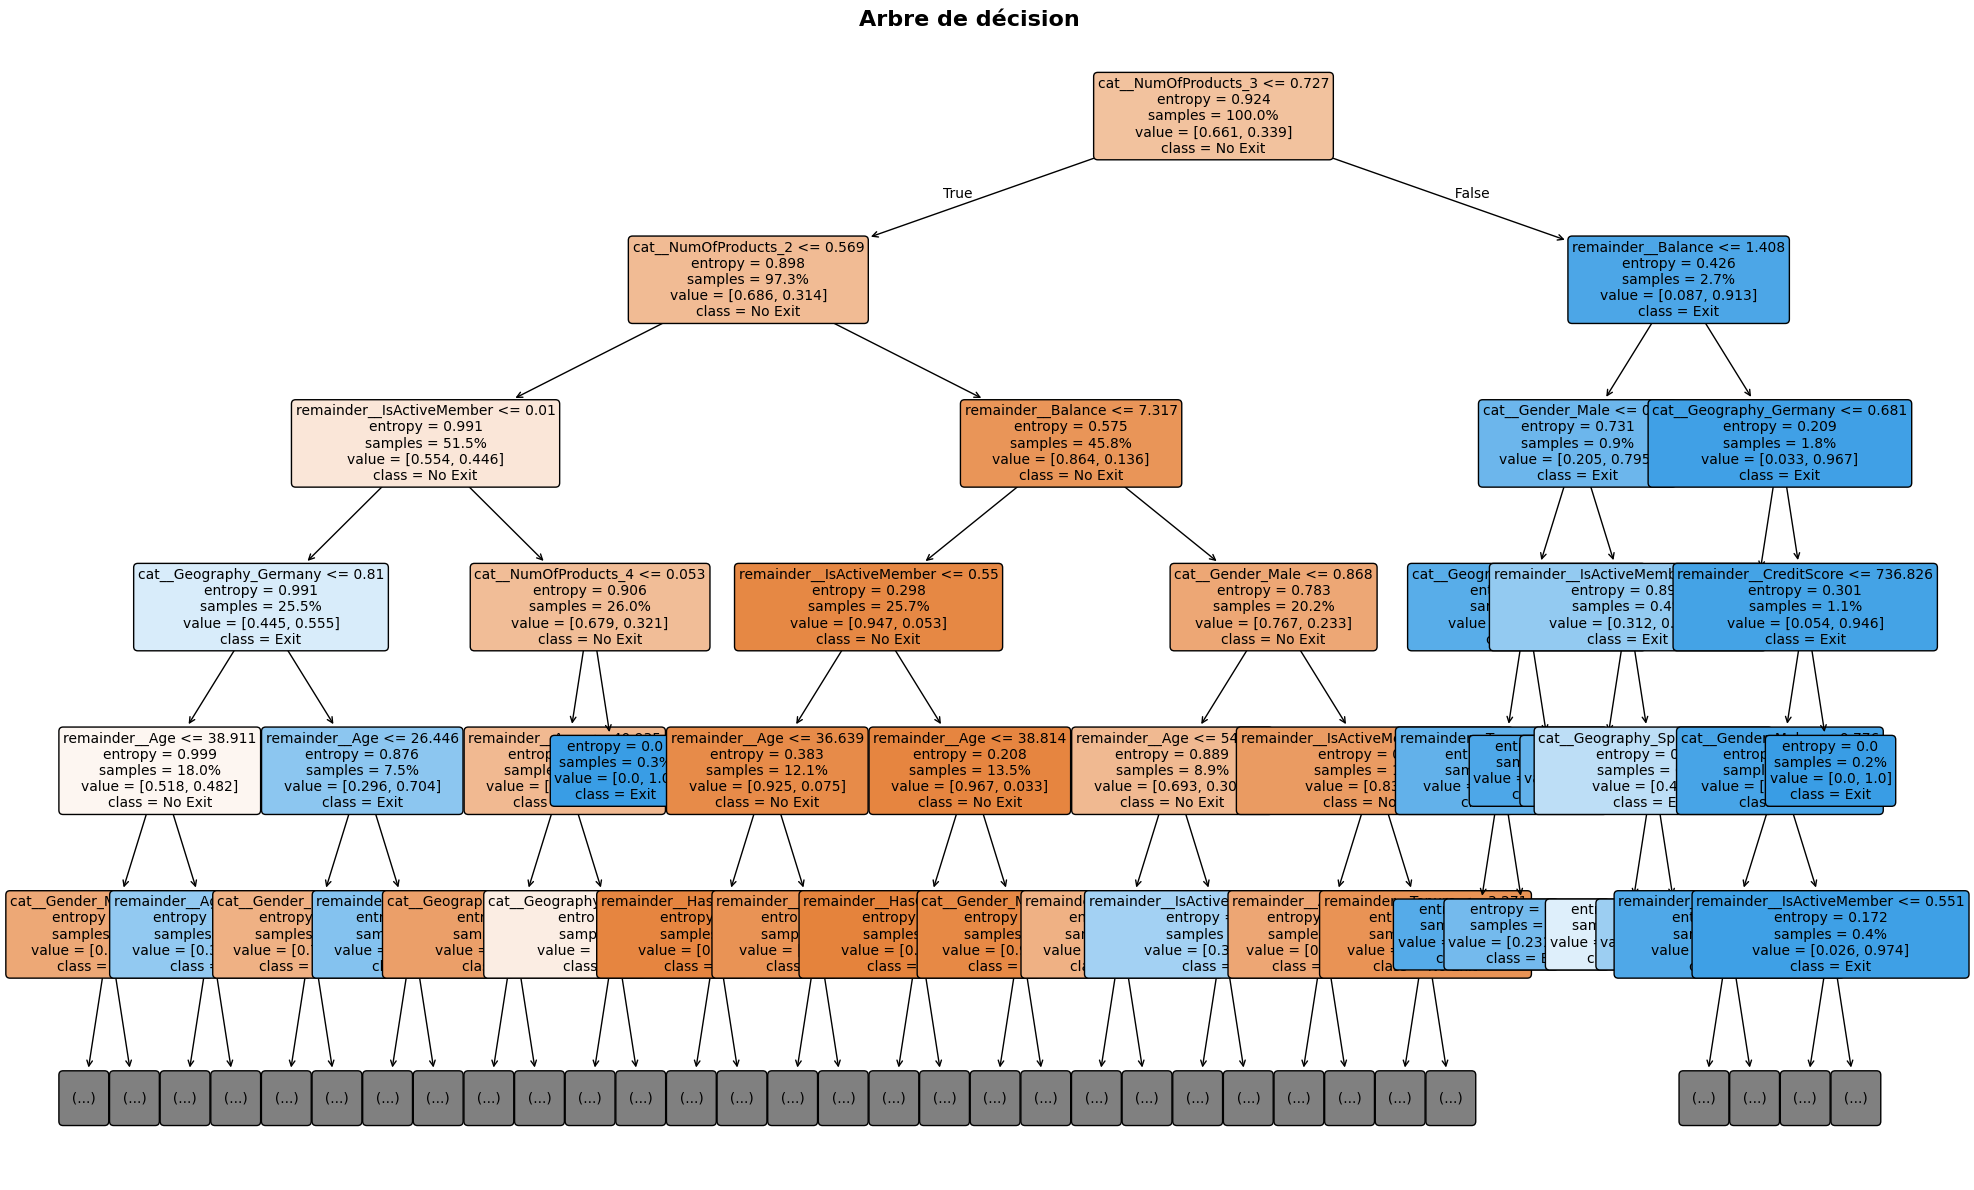

In [ ]:
# récupération noms de features
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# visualisation de l'arbre
plt.figure(figsize=(20, 12))
plot_tree(
    best_dt,
    feature_names=feature_names,
    class_names=['No Exit', 'Exit'],
    filled=True,
    rounded=True,
    proportion=True,
    fontsize=10,
    max_depth=5
)

plt.title("Arbre de décision", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Permutation feature importance

Permutation Importance:
                      Feature  Importance
2        cat__NumOfProducts_2    0.100599
7              remainder__Age    0.097300
11  remainder__IsActiveMember    0.036171
3        cat__NumOfProducts_3    0.029801
9          remainder__Balance    0.028381
0      cat__Geography_Germany    0.018718
5            cat__Gender_Male    0.014939
4        cat__NumOfProducts_4    0.002512
1        cat__Geography_Spain    0.000124
6      remainder__CreditScore   -0.000093


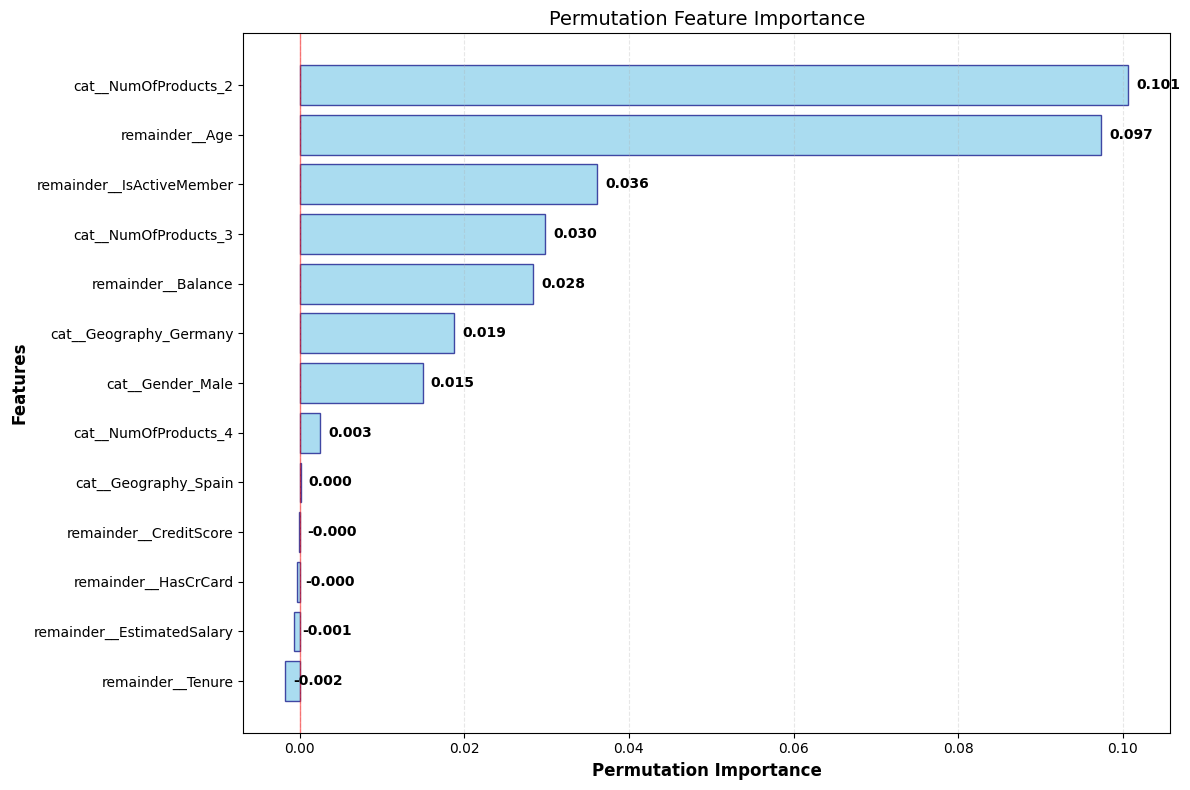

In [ ]:
# permutation feature importance
perm_importance = permutation_importance(
    best_dt, X_test_processed, y_test, n_repeats=10, random_state=42, scoring='roc_auc'
)

perm_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

print("Permutation Importance:")
print(perm_df.head(10))

# visualisation
plt.figure(figsize=(12, 8))

# 15 features les plus importantes
top_features = perm_df.head(15)

# graphique
bars = plt.barh(top_features['Feature'], top_features['Importance'],
                color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Permutation Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title("Permutation Feature Importance",
          fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')

# ajout des valeurs
for i, (feature, importance) in enumerate(zip(top_features['Feature'], top_features['Importance'])):
    plt.text(importance + 0.001, i, f'{importance:.3f}',
             va='center', fontweight='bold', fontsize=10)

plt.axvline(x=0, color='red', linestyle='-', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

La permutation feature importance générée permet de voir les variables les plus impactantes sur le modèle d'arbre de décision. Parmi les variables à notre disposition, les deux variables les plus impactantes sont ```Age``` et ```NumOfProducts_2```, que nous retrouvons également parmi les variables avec les plus forts IV (section "Analyse exploratoire"). Les autres variables impactantes, bien que moindres par rapport aux deux premières, sont ```Balance```, ``` IsActiveMember``` et ```NumOfProducts_3```. Il est intéressant de souligner que, précédemment, "IsActiveMember" présentait une capacité prédictive nulle, comme le montrait l'IV, alors que cette variable est impactante sur l'arbre de décision. Nous remarquons également la présence de variables ajoutant du bruit dans le modèle, comme ```Tenure``` et ```EstimatedSalary```.



### Validation - métriques de performance

In [ ]:
# prédictions
y_pred_proba_dt = best_dt.predict_proba(X_test_processed)[:, 1]

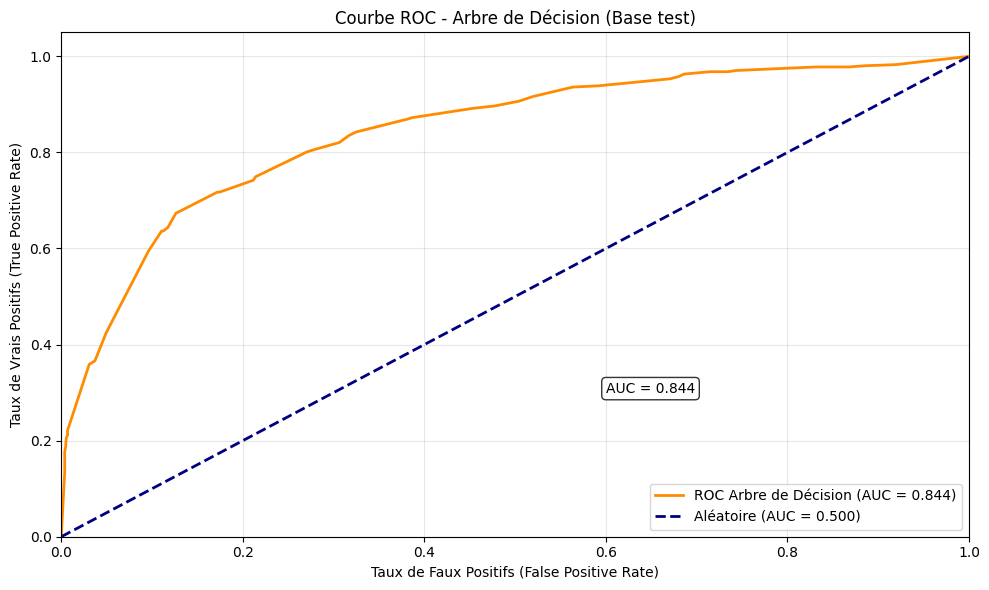

Courbe ROC générée pour Arbre de Décision
Score AUC: 0.8439


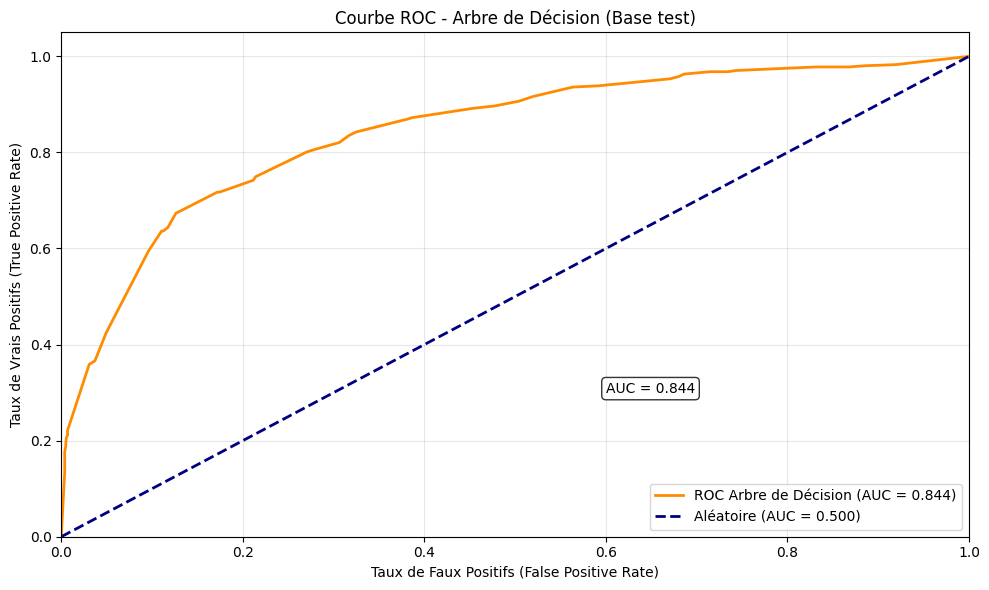

Courbe ROC générée pour Arbre de Décision
Score AUC: 0.8439


In [ ]:
# courbe ROC et coefficient AUC
roc_results_dt = plot_roc_auc(
    y_true=y_test,
    y_pred_proba=y_pred_proba_dt,
    title="Base test",
    model_name="Arbre de Décision"
)

roc_results_dt = plot_roc_auc(
    y_true=y_test,
    y_pred_proba=y_pred_proba_dt,
    title="Base test",
    model_name="Arbre de Décision"
)

Ici, la performance de l'arbre de décision est relativement haute, du fait de son coefficient AUC égal à 0.81. Cependant, le modèle est moins performant que la régression logistique établie précédemment.

## Random Forest (forêt aléatoire)

### Data preprocessing

Concernant l'étape de data preprocessing, nous reprenons celui de l'arbre de décision effectué précédemment.

Les variables polytomiques à notre disposition sont les suivantes :
- "NumOfProducts"
- "Geography"

Ici, une seule étape sera effectuée en termes de preprocessing.

In [ ]:
# sélection des variables pertinentes
X = df.drop(columns=["Exited", "CreditScore_quantile","EstimatedSalary_quantile"], axis=1)
y = df["Exited"]

# transformation log de "Balance" et "EstimatedSalary"
X[["Balance", "EstimatedSalary"]] = np.log(X[["Balance", "EstimatedSalary"]] + 0.001)

# séparation de la base de données en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
         ["Geography", "NumOfProducts", "Gender"])
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

### Recherche des hyperparamètres

In [ ]:
# init
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
# grille de paramètres
rf_param_grid = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'max_samples': [0.7, 0.8, 0.9]
}

best_rf, best_rf_params = quick_random_search(
    model=rf_model,
    param_grid=rf_param_grid,
    X_val=X_val,
    y_val=y_val,
    n_iter=50,
    cv=3
)

dict_hyperparamètres[best_rf.__class__.__name__] = best_rf_params

Meilleur score: 0.8474
Meilleurs paramètres: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_samples': 0.8, 'max_features': 'log2', 'max_depth': 7, 'class_weight': None, 'bootstrap': True}


Dans la recherche des hyperparamètres du random forest, nous décidons encore une fois de réduire le risque de surapprentissage du modèle en limitant la profondeur des arbres à générer (```max_depth```) ou encore le nombre maximal de features (```max_features```).

In [ ]:
dict_hyperparamètres

{'DecisionTreeClassifier': {'splitter': 'random',
  'min_samples_split': 10,
  'min_samples_leaf': 5,
  'min_impurity_decrease': 0.0,
  'max_features': 0.9,
  'max_depth': 7,
  'criterion': 'entropy',
  'class_weight': {0: 1, 1: 2}},
 'RandomForestClassifier': {'n_estimators': 200,
  'min_samples_split': 5,
  'min_samples_leaf': 2,
  'max_samples': 0.8,
  'max_features': 'log2',
  'max_depth': 7,
  'class_weight': None,
  'bootstrap': True}}

In [ ]:
for key in dict_hyperparamètres.keys():
  print("  Hyperparamètres de la "+f"{key}:")
  print(pd.DataFrame(dict_hyperparamètres[key],index = [0]))
  print("\n")

  Hyperparamètres de la DecisionTreeClassifier:
  splitter  min_samples_split  min_samples_leaf  min_impurity_decrease  \
0   random                 10                 5                    0.0   

   max_features  max_depth criterion  class_weight  
0           0.9          7   entropy             1  


  Hyperparamètres de la RandomForestClassifier:
   n_estimators  min_samples_split  min_samples_leaf  max_samples  \
0           200                  5                 2          0.8   

  max_features  max_depth class_weight  bootstrap  
0         log2          7         None       True  




### Scores finaux

In [ ]:
best_rf.fit(X_train_sub, y_train_sub)

y_train_pred = best_rf.predict_proba(X_train_sub)[:,1]
y_val_pred = best_rf.predict_proba(X_val)[:,1]
y_test_pred = best_rf.predict_proba(X_test_processed)[:,1]

table_of_results = score_train_val_test(y_train_sub, y_train_pred, y_val, y_val_pred, y_test, y_test_pred)

SCORES SUR LES DIFFÉRENTS ENSEMBLES
          Train     Val    Test
AUC      0.9020  0.8525  0.8612
LogLoss  0.3202  0.3589  0.3501
Entropy  0.3202  0.3589  0.3501



Sur la base de données d'entraînement, de validation et de test, nous remarquons que le coefficient AUC est stable sur ces trois jeux de données. Cela signifie que le modèle de random forest ne souffre pas d'underfitting (sous-apprentissage) ni d'overfitting (sur-apprentissage).

De même, le log-loss croît d'environ 0.03 entre le train et le test, dont validation. C'est un résultat globalement satisfaisant.

### Permutation feature importance

Permutation Importance:
                      Feature  Importance
7              remainder__Age    0.118860
2        cat__NumOfProducts_2    0.072266
11  remainder__IsActiveMember    0.030231
3        cat__NumOfProducts_3    0.022328
9          remainder__Balance    0.021466
0      cat__Geography_Germany    0.014757
5            cat__Gender_Male    0.007771
4        cat__NumOfProducts_4    0.003096
6      remainder__CreditScore    0.001123
10       remainder__HasCrCard    0.000702


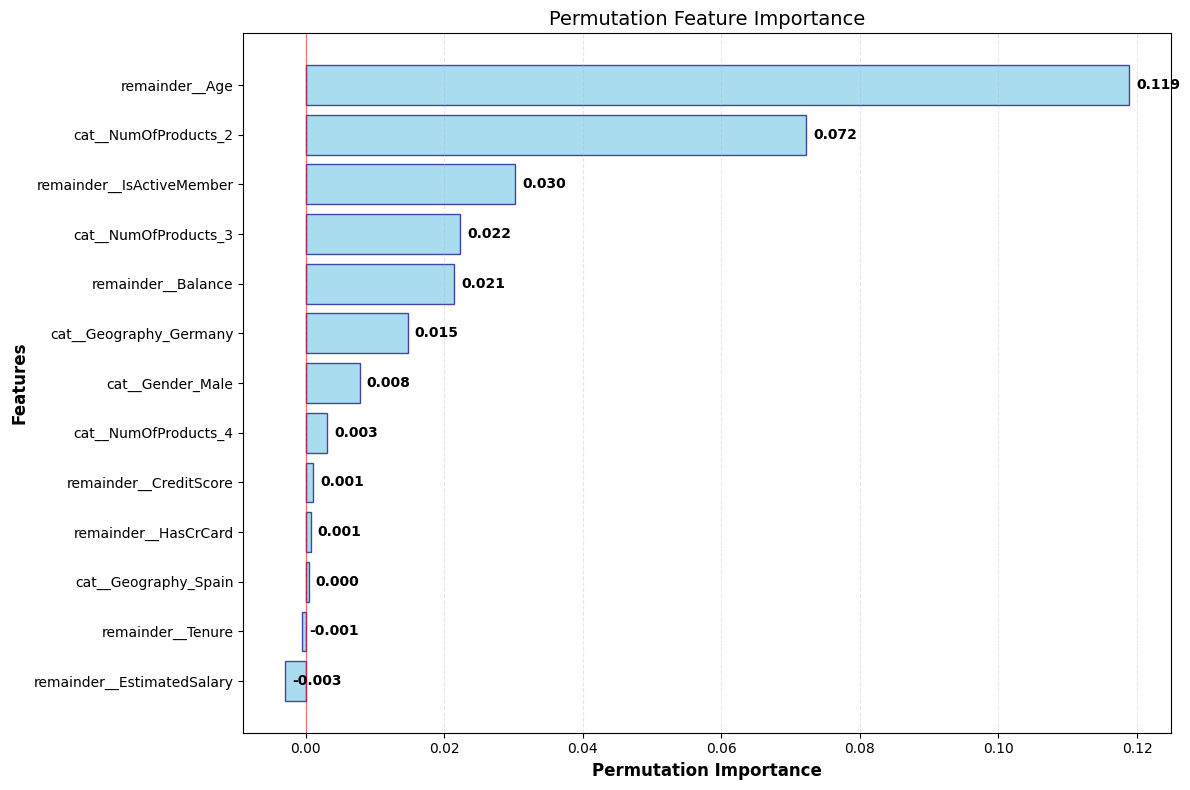

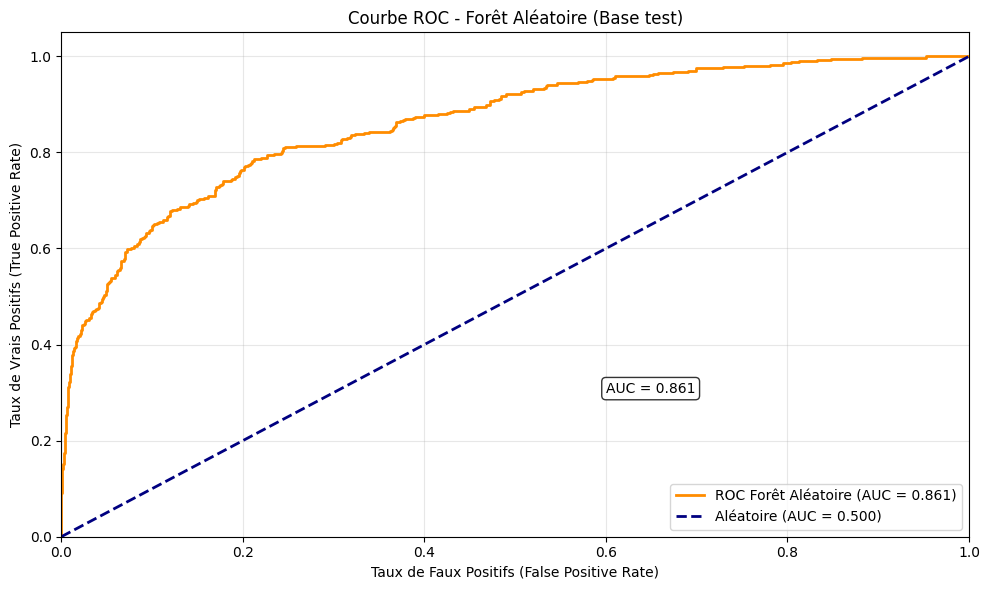

Courbe ROC générée pour Forêt Aléatoire
Score AUC: 0.8612


In [ ]:
# permutation feature importance
perm_importance = permutation_importance(
    best_rf, X_test_processed, y_test, n_repeats=10, random_state=42, scoring='roc_auc'
)

perm_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': perm_importance.importances_mean
}).sort_values('Importance', ascending=False)

print("Permutation Importance:")
print(perm_df.head(10))

# visualisation
plt.figure(figsize=(12, 8))

# 15 features les plus importantes
top_features = perm_df.head(15)

# graphique
bars = plt.barh(top_features['Feature'], top_features['Importance'],
                color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Permutation Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title("Permutation Feature Importance",
          fontsize=14)
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3, linestyle='--')

# ajout des valeurs
for i, (feature, importance) in enumerate(zip(top_features['Feature'], top_features['Importance'])):
    plt.text(importance + 0.001, i, f'{importance:.3f}',
             va='center', fontweight='bold', fontsize=10)

plt.axvline(x=0, color='red', linestyle='-', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

y_pred_proba_dt = best_rf.predict_proba(X_test_processed)[:, 1]

# courbe ROC et coefficient AUC
roc_results_dt = plot_roc_auc(
    y_true=y_test,
    y_pred_proba=y_pred_proba_dt,
    title="Base test",
    model_name="Forêt Aléatoire"
)

Concernant les variables les plus impactantes de la random forest, nous comptons ```NumOfProducts_2```, ```Age``` et ```IsActiveMember```. Ce sont les trois variables les plus impactantes pour le random forest. Un élément particulier à souligner est la présence de variables avec une permutation feature importance négative, soit ```Tenure``` et ```EstimatedSalary```. Ces deux variables présentent donc du bruit dans le random forest. Globalement, nous retrouvons les mêmes variables les plus impactantes entre le random forest et l'arbre de décision.



# Stress testing

In [ ]:
class ModelStressTester:

    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

        # conversion en array le cas échéant
        self._convert_to_arrays()

        # gestion modèle
        if hasattr(model, '__class__'):
            self.model_name = model.__class__.__name__
        else:
            self.model_name = str(model)

        self.results = {}

    def _convert_to_arrays(self):
        """Conversion des données en array si dataframe"""
        if hasattr(self.X_test, 'values'):
            self.X_test = self.X_test.values
        if hasattr(self.y_test, 'values'):
            self.y_test = self.y_test.values

    def _ensure_array(self, data):
        """Vérification des array"""
        if hasattr(data, 'values'):
            return data.values
        return data

    def _get_predictions(self, X_data=None):
        if X_data is None:
            X_data = self.X_test
        else:
            X_data = self._ensure_array(X_data)

        try:
            if hasattr(self.model, "predict_proba"):
                try:
                    predictions = self.model.predict_proba(X_data)

                    if predictions.shape[1] == 2:
                        return predictions[:, 1]
                    else:
                        return predictions
                except:
                    return self.model.predict(X_data)

            elif hasattr(self.model, 'params'):
                try:
                    if X_data.shape[1] == len(self.model.params) - 1:
                        X_with_const = sm.add_constant(X_data, has_constant='add')
                    elif X_data.shape[1] == len(self.model.params):
                        X_with_const = X_data
                    else:
                        X_with_const = sm.add_constant(X_data, has_constant='add')

                    predictions = self.model.predict(X_with_const)
                    return predictions
                except Exception as e:
                    print(f"Erreur statsmodels: {e}")
                    return np.random.random(len(X_data))

            elif hasattr(self.model, "predict"):
                return self.model.predict(X_data)

            else:
                return np.random.random(len(X_data))

        except Exception as e:
            print(f"Erreur dans _get_predictions: {e}")
            return np.random.random(len(X_data))

    def _get_auc_score(self, predictions):
        """Calcul AUC"""
        try:
            if len(predictions) == 0:
                return 0.5

            if hasattr(predictions, 'shape') and len(predictions.shape) > 1 and predictions.shape[1] > 2:
                auc_scores = []
                for i in range(predictions.shape[1]):
                    try:
                        auc = roc_auc_score((self.y_test == i).astype(int), predictions[:, i])
                        auc_scores.append(auc)
                    except:
                        continue
                return np.mean(auc_scores) if auc_scores else 0.5

            elif np.all((predictions >= 0) & (predictions <= 1)):
                return roc_auc_score(self.y_test, predictions)

            else:
                binary_predictions = (predictions > 0.5).astype(int) if predictions.dtype.kind == 'f' else predictions
                return accuracy_score(self.y_test, binary_predictions)

        except Exception as e:
            print(f"Erreur dans _get_auc_score: {e}")
            return 0.5

    def noise_stress_test(self, noise_levels=[0.01, 0.05, 0.1, 0.2, 0.5], n_iter=10):
        """Test de robustesse au bruit"""
        print("=" * 60)
        print("STRESS TEST: BRUIT DANS LES FEATURES")
        print("=" * 60)

        baseline_predictions = self._get_predictions()
        baseline_auc = self._get_auc_score(baseline_predictions)
        print(f"AUC baseline (sans bruit): {baseline_auc:.4f}")

        noise_results = {}

        for noise_level in noise_levels:
            auc_scores = []

            for i in range(n_iter):
                try:
                    # Conversion en array pour les opérations numpy
                    X_test_array = self._ensure_array(self.X_test)

                    # Ajout de bruit gaussien
                    noise_std = np.std(X_test_array, axis=0)
                    noise_std = np.where(noise_std == 0, 1.0, noise_std)
                    noise = np.random.normal(0, noise_level * noise_std, X_test_array.shape)
                    X_noisy = X_test_array + noise

                    predictions_noisy = self._get_predictions(X_noisy)
                    auc = self._get_auc_score(predictions_noisy)
                    auc_scores.append(auc)
                except Exception as e:
                    print(f"Erreur itération {i} bruit {noise_level}: {e}")
                    auc_scores.append(0.5)

            if auc_scores:
                noise_results[noise_level] = {
                    'mean_auc': np.mean(auc_scores),
                    'std_auc': np.std(auc_scores),
                    'degradation': baseline_auc - np.mean(auc_scores),
                    'degradation_pct': ((baseline_auc - np.mean(auc_scores)) / baseline_auc) * 100 if baseline_auc > 0 else 0
                }

                print(f"Bruit {noise_level*100:.1f}% - AUC: {np.mean(auc_scores):.4f} "
                      f"(Dégradation: {noise_results[noise_level]['degradation_pct']:.1f}%)")

        self.results['noise_test'] = noise_results
        return noise_results

    def missing_data_stress_test(self, missing_ratios=[0.1, 0.2, 0.3, 0.5, 0.7], strategy='mean'):
        """Test de robustesse aux données manquantes"""
        print("\n" + "=" * 60)
        print("STRESS TEST: DONNÉES MANQUANTES")
        print("=" * 60)

        baseline_predictions = self._get_predictions()
        baseline_auc = self._get_auc_score(baseline_predictions)
        print(f"AUC baseline (données complètes): {baseline_auc:.4f}")

        missing_results = {}

        for ratio in missing_ratios:
            try:
                # conversion en array
                X_test_array = self._ensure_array(self.X_test).copy()

                # création données manquantes
                n_missing = int(X_test_array.size * ratio)

                # sélection aléatoire d'indices pour les valeurs manquantes
                missing_indices = np.random.choice(X_test_array.size, n_missing, replace=False)
                rows, cols = np.unravel_index(missing_indices, X_test_array.shape)

                # application valeurs manquantes
                X_test_array[rows, cols] = np.nan

                # imputation selon la stratégie
                if strategy == 'mean':
                    from sklearn.impute import SimpleImputer
                    imputer = SimpleImputer(strategy='mean')
                    X_imputed = imputer.fit_transform(X_test_array)
                elif strategy == 'median':
                    from sklearn.impute import SimpleImputer
                    imputer = SimpleImputer(strategy='median')
                    X_imputed = imputer.fit_transform(X_test_array)
                else:
                    X_imputed = np.nan_to_num(X_test_array, nan=0)

                # prédictions sur données imputées
                predictions_imputed = self._get_predictions(X_imputed)
                auc = self._get_auc_score(predictions_imputed)

                missing_results[ratio] = {
                    'auc': auc,
                    'degradation': baseline_auc - auc,
                    'degradation_pct': ((baseline_auc - auc) / baseline_auc) * 100
                }

                print(f"Données manquantes {ratio*100:.0f}% - AUC: {auc:.4f} "
                      f"(Dégradation: {missing_results[ratio]['degradation_pct']:.1f}%)")
            except Exception as e:
                print(f"Erreur ratio {ratio}: {e}")
                missing_results[ratio] = {'auc': 0.5, 'degradation': 0, 'degradation_pct': 0}

        self.results['missing_data_test'] = missing_results
        return missing_results

    def data_drift_stress_test(self, drift_magnitudes=[0.1, 0.2, 0.5, 1.0, 2.0], n_iter=10):
        """Test de robustesse au data drift"""
        print("\n" + "=" * 60)
        print("STRESS TEST: DATA DRIFT")
        print("=" * 60)

        baseline_predictions = self._get_predictions()
        baseline_auc = self._get_auc_score(baseline_predictions)
        print(f"AUC baseline (sans drift): {baseline_auc:.4f}")

        drift_results = {}

        for magnitude in drift_magnitudes:
            auc_scores = []

            for i in range(n_iter):
                try:
                    # conversion en array
                    X_test_array = self._ensure_array(self.X_test)

                    # simulation de data drift
                    mean_shift = np.random.normal(0, magnitude, X_test_array.shape[1])
                    X_drifted = X_test_array + mean_shift

                    predictions_drifted = self._get_predictions(X_drifted)
                    auc = self._get_auc_score(predictions_drifted)
                    auc_scores.append(auc)
                except Exception as e:
                    print(f"Erreur itération {i} drift {magnitude}: {e}")
                    auc_scores.append(0.5)

            drift_results[magnitude] = {
                'mean_auc': np.mean(auc_scores),
                'std_auc': np.std(auc_scores),
                'degradation': baseline_auc - np.mean(auc_scores),
                'degradation_pct': ((baseline_auc - np.mean(auc_scores)) / baseline_auc) * 100
            }

            print(f"Drift magnitude {magnitude} - AUC: {np.mean(auc_scores):.4f} "
                  f"(Dégradation: {drift_results[magnitude]['degradation_pct']:.1f}%)")

        self.results['drift_test'] = drift_results
        return drift_results

    def adversarial_stress_test(self, attack_strengths=[0.01, 0.05, 0.1, 0.2], method='fgsm'):
        """Test de robustesse aux attaques adversaires"""
        print("\n" + "=" * 60)
        print("STRESS TEST: ATTAQUES ADVERSES")
        print("=" * 60)

        baseline_predictions = self._get_predictions()
        baseline_auc = self._get_auc_score(baseline_predictions)
        print(f"AUC baseline (sans attaque): {baseline_auc:.4f}")

        adversarial_results = {}

        for strength in attack_strengths:
            try:
                # Conversion en array
                X_test_array = self._ensure_array(self.X_test).copy()

                # Attaque simple
                if method == 'fgsm':
                    perturbation = strength * np.sign(np.random.randn(*X_test_array.shape))
                    X_attacked = X_test_array + perturbation

                predictions_attacked = self._get_predictions(X_attacked)
                auc = self._get_auc_score(predictions_attacked)

                adversarial_results[strength] = {
                    'auc': auc,
                    'degradation': baseline_auc - auc,
                    'degradation_pct': ((baseline_auc - auc) / baseline_auc) * 100
                }

                print(f"Attaque strength {strength} - AUC: {auc:.4f} "
                      f"(Dégradation: {adversarial_results[strength]['degradation_pct']:.1f}%)")
            except Exception as e:
                print(f"Erreur attaque {strength}: {e}")
                adversarial_results[strength] = {'auc': 0.5, 'degradation': 0, 'degradation_pct': 0}

        self.results['adversarial_test'] = adversarial_results
        return adversarial_results

    def outlier_stress_test(self, outlier_ratios=[0.01, 0.05, 0.1, 0.2], outlier_multiplier=10):
        """Test de robustesse aux outliers"""
        print("\n" + "=" * 60)
        print("STRESS TEST: OUTLIERS")
        print("=" * 60)

        baseline_predictions = self._get_predictions()
        baseline_auc = self._get_auc_score(baseline_predictions)
        print(f"AUC baseline (sans outliers): {baseline_auc:.4f}")

        outlier_results = {}

        for ratio in outlier_ratios:
            try:
                # conversion en array
                X_test_array = self._ensure_array(self.X_test).copy()
                n_outliers = int(len(X_test_array) * ratio)

                # sélection aléatoire d'échantillons
                outlier_indices = np.random.choice(len(X_test_array), n_outliers, replace=False)

                # création d'outliers
                X_test_array[outlier_indices] *= outlier_multiplier

                predictions_outliers = self._get_predictions(X_test_array)
                auc = self._get_auc_score(predictions_outliers)

                outlier_results[ratio] = {
                    'auc': auc,
                    'degradation': baseline_auc - auc,
                    'degradation_pct': ((baseline_auc - auc) / baseline_auc) * 100
                }

                print(f"Outliers {ratio*100:.1f}% - AUC: {auc:.4f} "
                      f"(Dégradation: {outlier_results[ratio]['degradation_pct']:.1f}%)")
            except Exception as e:
                print(f"Erreur outliers {ratio}: {e}")
                outlier_results[ratio] = {'auc': 0.5, 'degradation': 0, 'degradation_pct': 0}

        self.results['outlier_test'] = outlier_results
        return outlier_results

    def run_comprehensive_stress_test(self, tests_to_run=None):
        """
        Exécution des stress tests
        """
        print("=" * 80)
        print(f"STRESS TEST COMPLET - {self.model_name}")
        print("=" * 80)

        # tests par défaut
        if tests_to_run is None:
            tests_to_run = ['noise', 'missing', 'drift', 'adversarial', 'outlier']

        test_functions = {
            'noise': self.noise_stress_test,
            'missing': self.missing_data_stress_test,
            'drift': self.data_drift_stress_test,
            'adversarial': self.adversarial_stress_test,
            'outlier': self.outlier_stress_test
        }

        for test_name in tests_to_run:
            if test_name in test_functions:
                try:
                    test_functions[test_name]()
                except Exception as e:
                    print(f"Échec du test {test_name}: {e}")

        # rapport général
        self.generate_stress_report()

    def generate_stress_report(self):
        """
        Rapport visuel complet des stress tests
        """
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle(f'Rapport de Stress Testing - {self.model_name}', fontsize=16, fontweight='bold')

        # bruit
        if 'noise_test' in self.results:
            noise_data = self.results['noise_test']
            x = list(noise_data.keys())
            y = [noise_data[level]['mean_auc'] for level in x]
            axes[0, 0].plot(x, y, 'o-', linewidth=2, markersize=8)
            axes[0, 0].set_xlabel('Niveau de bruit')
            axes[0, 0].set_ylabel('AUC')
            axes[0, 0].set_title('Robustesse au bruit')
            axes[0, 0].grid(True, alpha=0.3)

        # valeurs manquantes
        if 'missing_data_test' in self.results:
            missing_data = self.results['missing_data_test']
            x = list(missing_data.keys())
            y = [missing_data[ratio]['auc'] for ratio in x]
            axes[0, 1].plot(x, y, 'o-', linewidth=2, markersize=8, color='orange')
            axes[0, 1].set_xlabel('Ratio données manquantes')
            axes[0, 1].set_ylabel('AUC')
            axes[0, 1].set_title('Robustesse aux données manquantes')
            axes[0, 1].grid(True, alpha=0.3)

        # data drift
        if 'drift_test' in self.results:
            drift_data = self.results['drift_test']
            x = list(drift_data.keys())
            y = [drift_data[magnitude]['mean_auc'] for magnitude in x]
            axes[0, 2].plot(x, y, 'o-', linewidth=2, markersize=8, color='green')
            axes[0, 2].set_xlabel('Magnitude du drift')
            axes[0, 2].set_ylabel('AUC')
            axes[0, 2].set_title('Robustesse au data drift')
            axes[0, 2].grid(True, alpha=0.3)

        # attaques adverses
        if 'adversarial_test' in self.results:
            adv_data = self.results['adversarial_test']
            x = list(adv_data.keys())
            y = [adv_data[strength]['auc'] for strength in x]
            axes[1, 0].plot(x, y, 'o-', linewidth=2, markersize=8, color='red')
            axes[1, 0].set_xlabel('Force attaque')
            axes[1, 0].set_ylabel('AUC')
            axes[1, 0].set_title('Robustesse aux attaques adverses')
            axes[1, 0].grid(True, alpha=0.3)

        # outliers
        if 'outlier_test' in self.results:
            outlier_data = self.results['outlier_test']
            x = list(outlier_data.keys())
            y = [outlier_data[ratio]['auc'] for ratio in x]
            axes[1, 1].plot(x, y, 'o-', linewidth=2, markersize=8, color='purple')
            axes[1, 1].set_xlabel('Ratio outliers')
            axes[1, 1].set_ylabel('AUC')
            axes[1, 1].set_title('Robustesse aux outliers')
            axes[1, 1].grid(True, alpha=0.3)

        # résumé
        axes[1, 2].axis('off')
        summary_text = "RÉSUMÉ DES STRESS TESTS\n\n"

        baseline_predictions = self._get_predictions()
        baseline_auc = self._get_auc_score(baseline_predictions)
        summary_text += f"AUC Baseline: {baseline_auc:.4f}\n\n"

        for test_name, test_data in self.results.items():
            worst_case = min(test_data.values(), key=lambda x: x.get('auc', x.get('mean_auc', 1)))
            worst_auc = worst_case.get('auc', worst_case.get('mean_auc', 0))
            degradation_pct = ((baseline_auc - worst_auc) / baseline_auc) * 100
            test_name_display = test_name.replace('_test', '').replace('_', ' ').title()
            summary_text += f"{test_name_display}:\n  Pire AUC: {worst_auc:.4f}\n  Dégradation: {degradation_pct:.1f}%\n\n"

        axes[1, 2].text(0.1, 0.9, summary_text, transform=axes[1, 2].transAxes,
                       verticalalignment='top', fontfamily='monospace', fontsize=10)

        plt.tight_layout()
        plt.show()

        return fig

def quick_stress_test(model, X_test, y_test, tests_to_run=None):
    """
    Simplification du stress testing
    """
    tester = ModelStressTester(model, X_test, y_test)
    tester.run_comprehensive_stress_test(tests_to_run)
    return tester

In [ ]:
dict_hyperparamètres["DecisionTreeClassifier"]

{'splitter': 'random',
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0.0,
 'max_features': 0.9,
 'max_depth': 7,
 'criterion': 'entropy',
 'class_weight': {0: 1, 1: 2}}

STRESS TEST COMPLET - DecisionTreeClassifier
STRESS TEST: BRUIT DANS LES FEATURES
AUC baseline (sans bruit): 0.8439
Bruit 1.0% - AUC: 0.8435 (Dégradation: 0.1%)
Bruit 5.0% - AUC: 0.8378 (Dégradation: 0.7%)
Bruit 10.0% - AUC: 0.8324 (Dégradation: 1.4%)
Bruit 20.0% - AUC: 0.8229 (Dégradation: 2.5%)
Bruit 50.0% - AUC: 0.7838 (Dégradation: 7.1%)

STRESS TEST: DONNÉES MANQUANTES
AUC baseline (données complètes): 0.8439
Données manquantes 10% - AUC: 0.8040 (Dégradation: 4.7%)
Données manquantes 20% - AUC: 0.7959 (Dégradation: 5.7%)
Données manquantes 30% - AUC: 0.7562 (Dégradation: 10.4%)
Données manquantes 50% - AUC: 0.7097 (Dégradation: 15.9%)
Données manquantes 70% - AUC: 0.6406 (Dégradation: 24.1%)

STRESS TEST: DATA DRIFT
AUC baseline (sans drift): 0.8439
Drift magnitude 0.1 - AUC: 0.7909 (Dégradation: 6.3%)
Drift magnitude 0.2 - AUC: 0.7556 (Dégradation: 10.5%)
Drift magnitude 0.5 - AUC: 0.7145 (Dégradation: 15.3%)
Drift magnitude 1.0 - AUC: 0.7053 (Dégradation: 16.4%)
Drift magnitude 

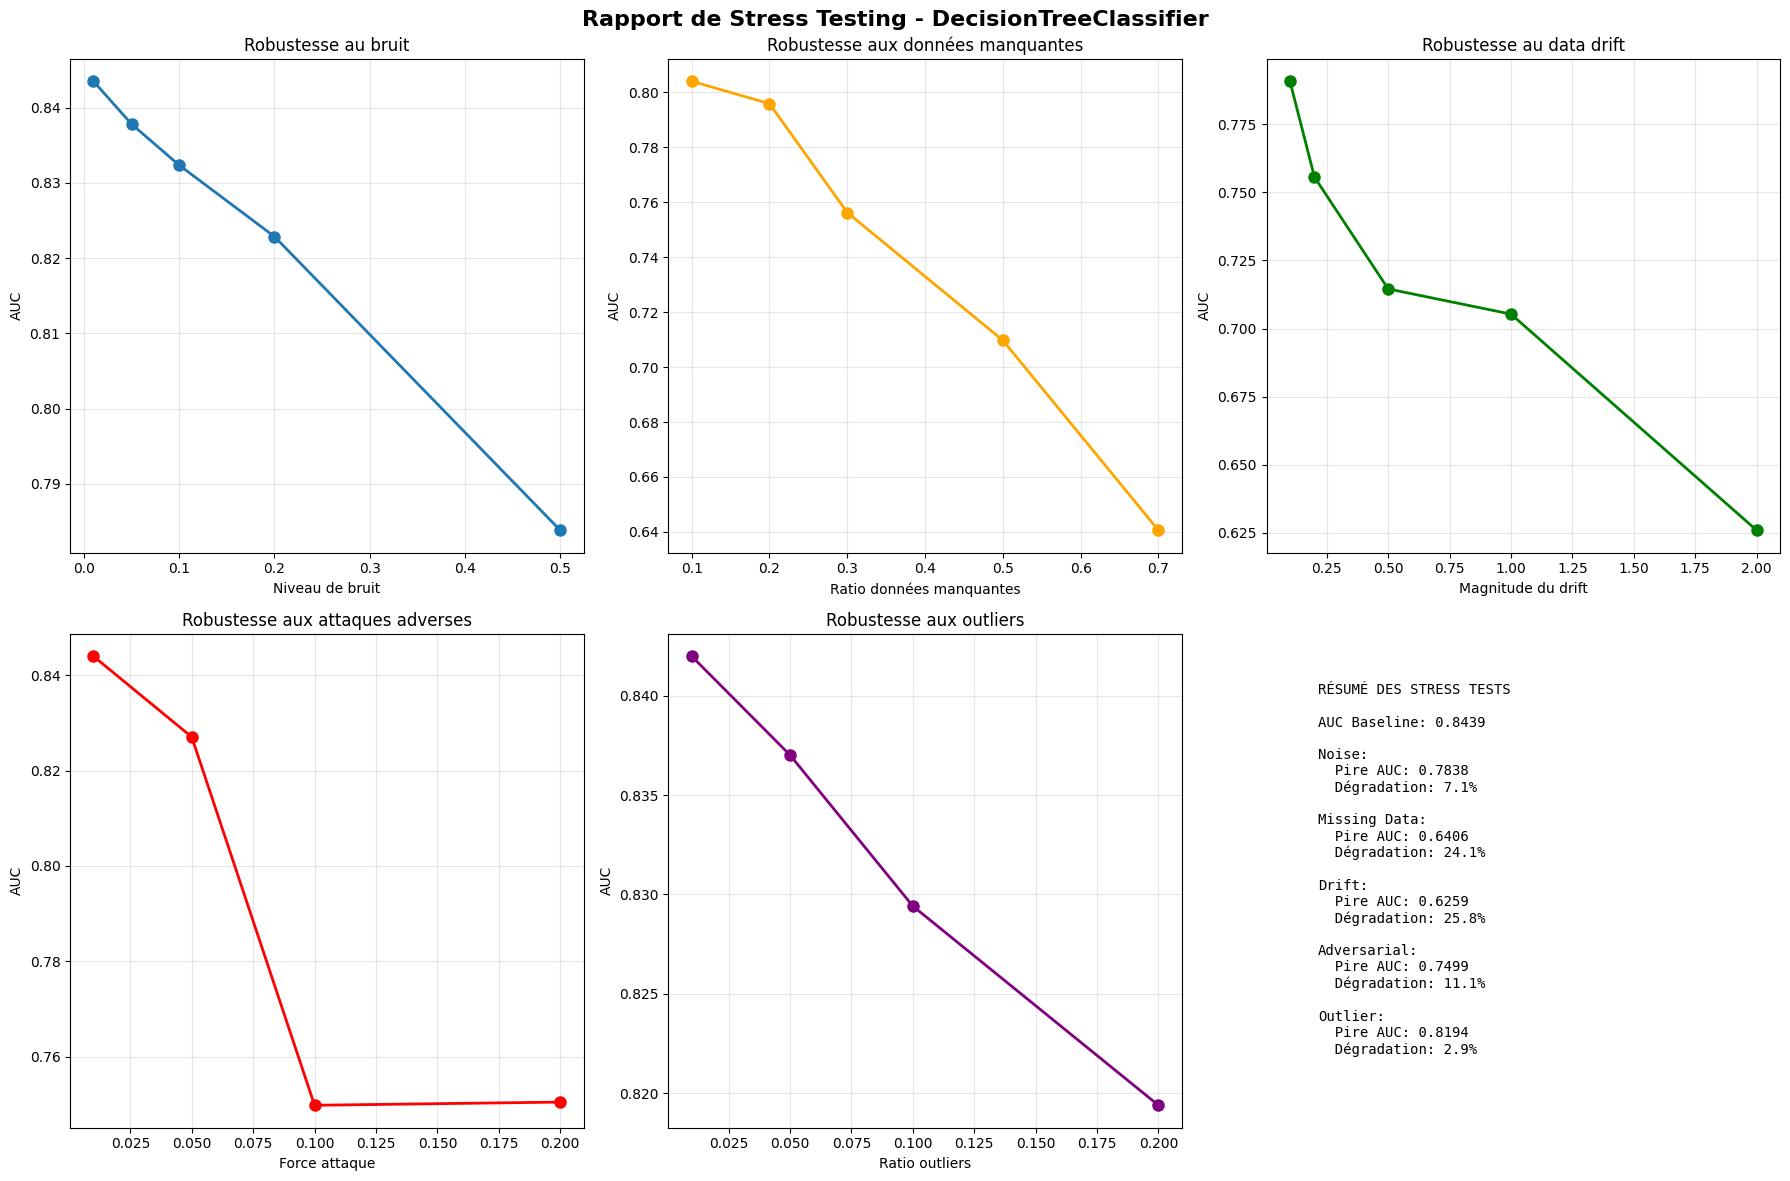


TEST DE BRUIT DÉTAILLÉ
STRESS TEST: BRUIT DANS LES FEATURES
AUC baseline (sans bruit): 0.8439
Bruit 0.1% - AUC: 0.8439 (Dégradation: 0.0%)
Bruit 1.0% - AUC: 0.8443 (Dégradation: -0.0%)
Bruit 10.0% - AUC: 0.8339 (Dégradation: 1.2%)
Bruit 50.0% - AUC: 0.7836 (Dégradation: 7.1%)
Bruit 100.0% - AUC: 0.7052 (Dégradation: 16.4%)


In [ ]:
tester = quick_stress_test(best_dt, X_test_processed, y_test)

# test bruit détaillé supplémentaire
print("\n" + "=" * 80)
print("TEST DE BRUIT DÉTAILLÉ")
print("=" * 80)
noise_results = tester.noise_stress_test(noise_levels=[0.001, 0.01, 0.1, 0.5, 1.0])

De manière générale, le stress test associé à l'arbre de décision touche à plusieurs aspects pour expérimenter la performance du modèle. Parmi ces épreuves de stress test, nous comptons la robustesse aux outliers, aux attaques adverses, au data drift, aux données manquantes et au bruit. D'après les graphiques ci-dessus, la robustesse de l'arbre de décision demeure tout de même relativement satisfaisante sur les différentes épreuves. En effet, le coefficient AUC le plus bas est atteint à 0.64.

STRESS TEST COMPLET - RandomForestClassifier
STRESS TEST: BRUIT DANS LES FEATURES
AUC baseline (sans bruit): 0.8612
Bruit 1.0% - AUC: 0.8610 (Dégradation: 0.0%)
Bruit 5.0% - AUC: 0.8552 (Dégradation: 0.7%)
Bruit 10.0% - AUC: 0.8476 (Dégradation: 1.6%)
Bruit 20.0% - AUC: 0.8423 (Dégradation: 2.2%)
Bruit 50.0% - AUC: 0.8177 (Dégradation: 5.1%)

STRESS TEST: DONNÉES MANQUANTES
AUC baseline (données complètes): 0.8612
Données manquantes 10% - AUC: 0.8327 (Dégradation: 3.3%)
Données manquantes 20% - AUC: 0.8298 (Dégradation: 3.6%)
Données manquantes 30% - AUC: 0.7881 (Dégradation: 8.5%)
Données manquantes 50% - AUC: 0.7281 (Dégradation: 15.5%)
Données manquantes 70% - AUC: 0.6823 (Dégradation: 20.8%)

STRESS TEST: DATA DRIFT
AUC baseline (sans drift): 0.8612
Drift magnitude 0.1 - AUC: 0.8607 (Dégradation: 0.1%)
Drift magnitude 0.2 - AUC: 0.8477 (Dégradation: 1.6%)
Drift magnitude 0.5 - AUC: 0.8243 (Dégradation: 4.3%)
Drift magnitude 1.0 - AUC: 0.7744 (Dégradation: 10.1%)
Drift magnitude 2.0

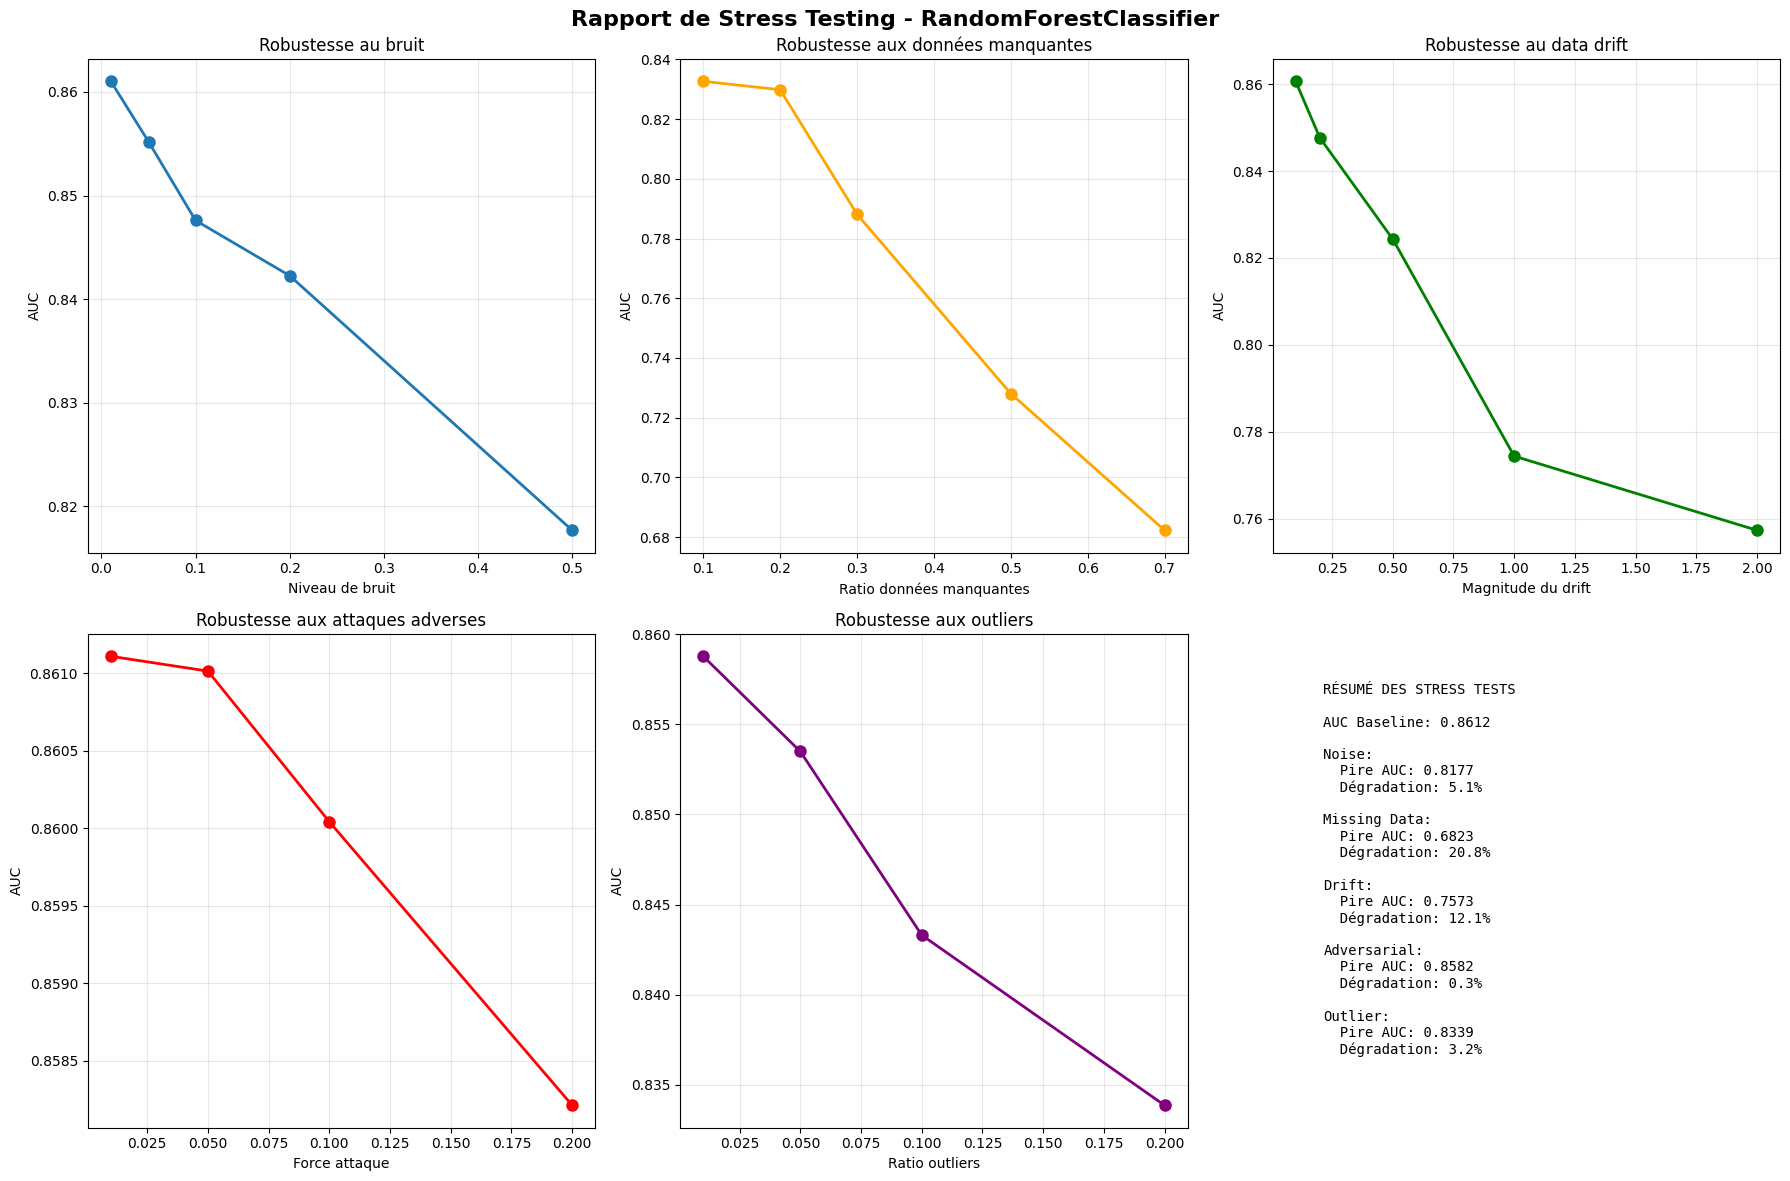


TEST DE BRUIT DÉTAILLÉ
STRESS TEST: BRUIT DANS LES FEATURES
AUC baseline (sans bruit): 0.8612
Bruit 0.1% - AUC: 0.8613 (Dégradation: -0.0%)
Bruit 1.0% - AUC: 0.8602 (Dégradation: 0.1%)
Bruit 10.0% - AUC: 0.8462 (Dégradation: 1.7%)
Bruit 50.0% - AUC: 0.8199 (Dégradation: 4.8%)
Bruit 100.0% - AUC: 0.7448 (Dégradation: 13.5%)


In [ ]:
tester = quick_stress_test(best_rf, X_test_processed, y_test)

# test supplémentaire
print("\n" + "=" * 80)
print("TEST DE BRUIT DÉTAILLÉ")
print("=" * 80)
noise_results = tester.noise_stress_test(noise_levels=[0.001, 0.01, 0.1, 0.5, 1.0])

Pour le random forest, nous retrouvons également une performance du modèle relativement satisfaisante selon les différentes épreuves. Les mêmes épreuves sont faites que précédemment dans l'arbre de décision. Le random forest admet un coefficient AUC le plus bas de 0.68 lors de l'épreuve de robustesse aux données manquantes.

STRESS TEST COMPLET - BinaryResultsWrapper
STRESS TEST: BRUIT DANS LES FEATURES
AUC baseline (sans bruit): 0.8351
Bruit 1.0% - AUC: 0.8349 (Dégradation: 0.0%)
Bruit 5.0% - AUC: 0.8337 (Dégradation: 0.2%)
Bruit 10.0% - AUC: 0.8280 (Dégradation: 0.9%)
Bruit 20.0% - AUC: 0.8108 (Dégradation: 2.9%)
Bruit 50.0% - AUC: 0.7420 (Dégradation: 11.2%)

STRESS TEST: DONNÉES MANQUANTES
AUC baseline (données complètes): 0.8351
Données manquantes 10% - AUC: 0.8186 (Dégradation: 2.0%)
Données manquantes 20% - AUC: 0.7986 (Dégradation: 4.4%)
Données manquantes 30% - AUC: 0.7911 (Dégradation: 5.3%)
Données manquantes 50% - AUC: 0.7573 (Dégradation: 9.3%)
Données manquantes 70% - AUC: 0.6943 (Dégradation: 16.9%)

STRESS TEST: DATA DRIFT
AUC baseline (sans drift): 0.8351
Drift magnitude 0.1 - AUC: 0.8351 (Dégradation: 0.0%)
Drift magnitude 0.2 - AUC: 0.8351 (Dégradation: 0.0%)
Drift magnitude 0.5 - AUC: 0.8351 (Dégradation: 0.0%)
Drift magnitude 1.0 - AUC: 0.8351 (Dégradation: 0.0%)
Drift magnitude 2.0 - 

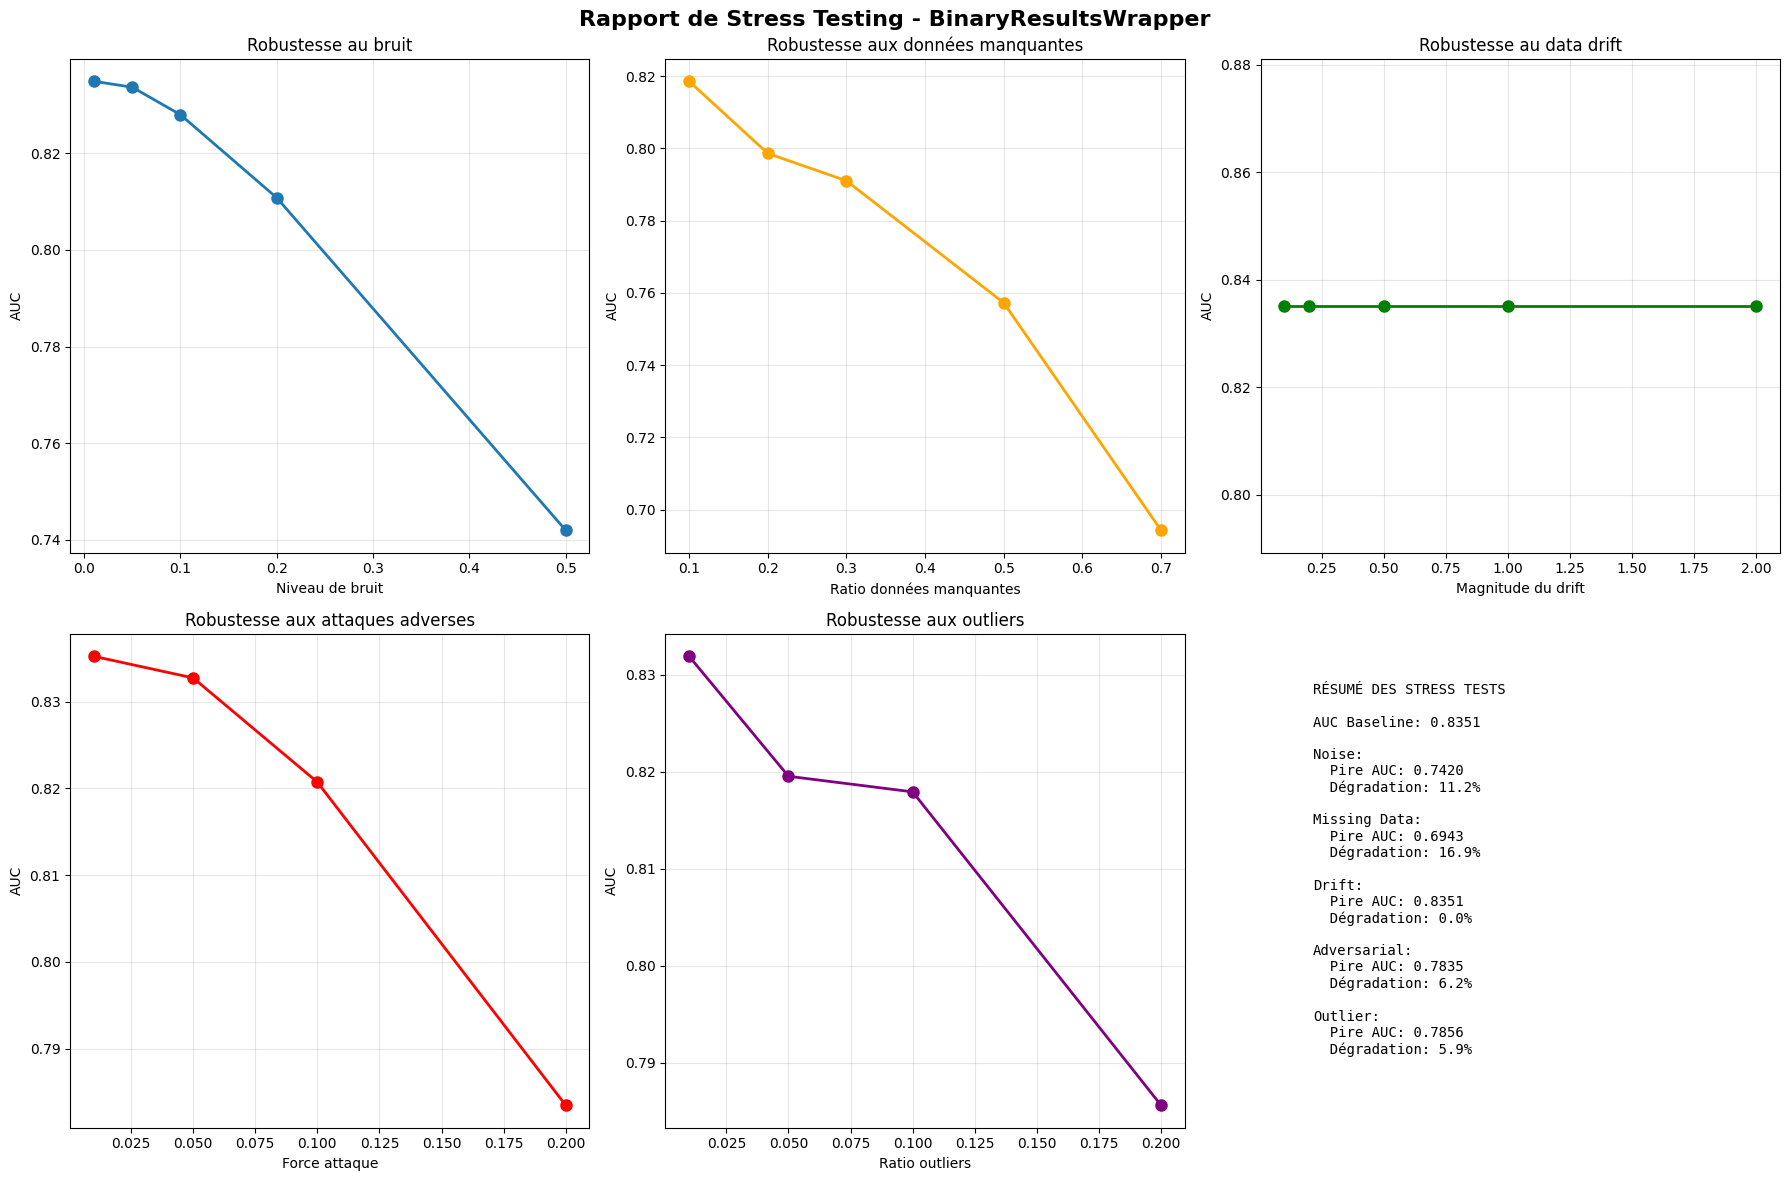


TEST DE BRUIT DÉTAILLÉ
STRESS TEST: BRUIT DANS LES FEATURES
AUC baseline (sans bruit): 0.8351
Bruit 0.1% - AUC: 0.8351 (Dégradation: 0.0%)
Bruit 1.0% - AUC: 0.8350 (Dégradation: 0.0%)
Bruit 10.0% - AUC: 0.8287 (Dégradation: 0.8%)
Bruit 50.0% - AUC: 0.7410 (Dégradation: 11.3%)
Bruit 100.0% - AUC: 0.6469 (Dégradation: 22.5%)


In [ ]:
Logit_ = Implementation_model(sm.Logit, X_train_sm, y_train)

tester = quick_stress_test(Logit_, X_test_sm, y_test)

# test supplémentaire
print("\n" + "=" * 80)
print("TEST DE BRUIT DÉTAILLÉ")
print("=" * 80)
noise_results = tester.noise_stress_test(noise_levels=[0.001, 0.01, 0.1, 0.5, 1.0])

Enfin, la régression logistique est également performante selon les différentes épreuves. Son coefficient AUC le plus bas est atteint pour 0.70 pour les données manquantes.